<a id="home"></a>
# IEEE Fraud Detection transactions columns reference

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import HTML
import warnings
warnings.filterwarnings("ignore")

INPUT_DIR = '../input/'
COLS_TO_SHOW = 150

def h(content):
    display(HTML(content))

def timehist1(col):
    N = 8000 if col in ['TransactionAmt'] else 9999999999999999 # clip trans amount for better view
    tr[tr['isFraud'] == 0].set_index('TransactionDT')[col].clip(0, N).plot(style='.', title='Hist ' + col, figsize=(15, 3))
    tr[tr['isFraud'] == 1].set_index('TransactionDT')[col].clip(0, N).plot(style='.', title='Hist ' + col, figsize=(15, 3))
    te.set_index('TransactionDT')[col].clip(0, N).plot(style='.', title=col + ' values over time (blue=no-fraud, orange=fraud, green=test)', figsize=(15, 3))
    plt.show()
    
def _desc(data, col, label):
    d0 = data.describe().reset_index()
    d0.columns = [col, label]
    return d0.append({col:'unique values', label:data.unique().shape[0]}, ignore_index=True) \
             .append({col:'NaNs', label:data.isnull().sum()}, ignore_index=True) \
             .append({col:'NaNs share', label:np.round(data.isnull().sum() / data.shape[0], 4)}, ignore_index=True) \
    
def desc1(col):
    d0 = _desc(tr[col], col, 'Train')
    d1 = _desc(tr.loc[tr['isFraud'] == 1, col], col, 'Train fraud')
    d2 = _desc(tr.loc[tr['isFraud'] == 0, col], col, 'Train Not fraud')
    d3 = _desc(te[col], col, 'Test')
    n_public = int(te.shape[0] * 0.2)
    d4 = _desc(te.loc[:n_public, col], col, 'Test public')
    d5 = _desc(te.loc[n_public:, col], col, 'Test private')
    dd = d0.merge(d1).merge(d2).merge(d3).merge(d4).merge(d5)
    display(dd)
    
    if col not in ['TransactionID']:
        h('<b>Most popular values (NaN = -999):</b>')
        N = 10
        d0 = tr[['isFraud',col]].fillna(-999).groupby(col)['isFraud'].agg(['size','mean','sum']).reset_index().sort_values('size', ascending=False).reset_index(drop=True)
        d1 = te[['TransactionID',col]].fillna(-999).groupby(col)['TransactionID'].count().reset_index()
        dd = d0.merge(d1, how='left', on=col).head(N)
        dd = dd.rename({'size':'Count in train (desc)','mean':'Mean target','sum':'Sum target','TransactionID':'Count in test'}, axis=1)
        display(dd)

        h('<b>Biggest fraud sum values in train (NaN = -999):</b>')
        dd = d0.sort_values('sum', ascending=False).reset_index(drop=True).head(N).merge(d1, how='left', on=col)
        dd = dd.rename({'size':'Count in train','mean':'Mean target','sum':'Sum target (desc)','TransactionID':'Count in test'}, axis=1)
        display(dd)

def hist1(col):
    plt.figure(figsize=(15, 3))
    plt.subplot(121)
    plt.hist(tr[col], bins=70);
    plt.title('Train histogram: ' + col);
    plt.subplot(122)
    plt.hist(te[col], bins=70);
    plt.title('Test histogram: ' + col);
    plt.show()

def corr1(col):
    N = None #10000
    num_vars = [f for f in tr.columns if tr[f].dtype != 'object']
    trx = tr.head(N) if N is not None else tr.copy()
    corrs = trx[num_vars].corrwith(trx[col]).reset_index().sort_values(0, ascending=False).reset_index(drop=True).rename({'index':'Column',0:'Correlation with ' + col}, axis=1)
    h('<b>Most correlated values with ' + col + ':</b>')
    trx = pd.concat([corrs.head(6), corrs.dropna().tail(5)])
    def linkx(val):
        return '<a href="#c_{}">{}</a>'.format(val, val) if val in included_cols else val
    trx['Column'] = trx['Column'].apply(linkx)
    h(trx.to_html(escape=False))
    
def numeric(col):
    timehist1(col)
    hist1(col)
    desc1(col)
    corr1(col) 
    
def categorical(col):
    desc1(col)

def proc(col):
    if col not in ['isFraud','TransactionDT']:
        h('<h3 id="c_' + col + '">' + col + '</h3>' + '<a style="font-size:11px" href="#home">(Jump to top)</a>')
        categorical(col) if tr[col].dtype == 'object' else numeric(col)
        
tr = pd.read_csv(INPUT_DIR + 'train_transaction.csv')
te = pd.read_csv(INPUT_DIR + 'test_transaction.csv')
trid = pd.read_csv(INPUT_DIR + 'train_identity.csv')
teid = pd.read_csv(INPUT_DIR + 'test_identity.csv')

included_cols = list(tr.columns.values[:COLS_TO_SHOW])
split_on = ['TransactionID','card1','addr1','C1','D1','M1','V1']
h('<b>Links to column info:</b> ' + ', '.join([('<li>' if col in split_on else '') + '<a href="#c_' + col + '">' + col + '</a>' for col in included_cols]))
h('Train transactions shape: <b>' + str(tr.shape) + '</b>, identity <b>' + str(trid.shape) + '</b>' + 
  '<br>Test transactions shape: <b>' + str(te.shape) + '</b>, identity <b>' + str(teid.shape) + '</b>')
h('Train transactions preview:')
display(tr.head(10))

TransactionID  isFraud  TransactionDT  ...   V337 V338  V339
0        2987000        0          86400  ...    NaN  NaN   NaN
1        2987001        0          86401  ...    NaN  NaN   NaN
2        2987002        0          86469  ...    NaN  NaN   NaN
3        2987003        0          86499  ...    NaN  NaN   NaN
4        2987004        0          86506  ...    0.0  0.0   0.0
5        2987005        0          86510  ...    NaN  NaN   NaN
6        2987006        0          86522  ...    NaN  NaN   NaN
7        2987007        0          86529  ...    NaN  NaN   NaN
8        2987008        0          86535  ...    0.0  0.0   0.0
9        2987009        0          86536  ...    NaN  NaN   NaN

[10 rows x 394 columns]

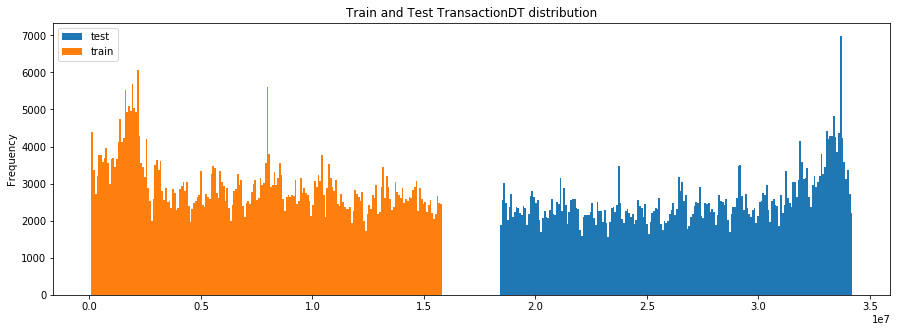

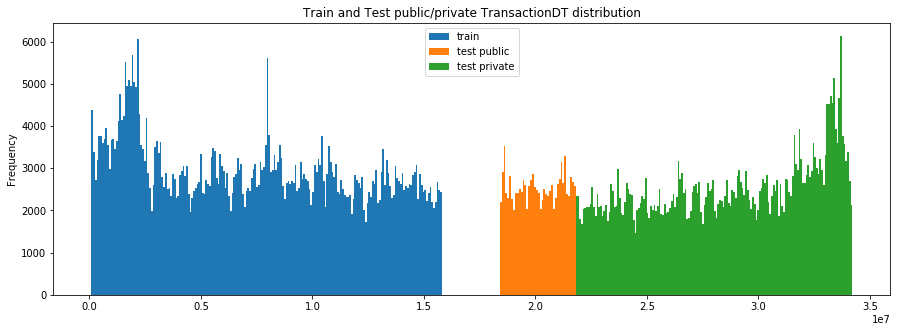

In [2]:
COL = 'TransactionDT'
h('<h2 id="c_' + COL + '">' + COL + '</h2>' + '<a style="font-size:11px" href="#home">(Jump to top)</a>')

te['TransactionDT'].plot(kind='hist', figsize=(15, 5), label='test', bins=200, title='Train and Test TransactionDT distribution')
tr['TransactionDT'].plot(kind='hist', label='train', bins=200)
plt.legend()
plt.show()
tr['TransactionDT'].plot(kind='hist', figsize=(15, 5), label='train', bins=200, title='Train and Test public/private TransactionDT distribution')
n_public = int(te.shape[0] * 0.2)
te.loc[:n_public, 'TransactionDT'].plot(kind='hist', label='test public', bins=40)
te.loc[n_public:, 'TransactionDT'].plot(kind='hist', label='test private', bins=160)
plt.legend()
plt.show()
corr1(COL)

In [3]:
COL = 'isFraud'
h('<h2 id="c_' + COL + '">' + COL + '</h2>' + '<a style="font-size:11px" href="#home">(Jump to top)</a>')
h('This is target column.')
trx = tr['isFraud'].value_counts().reset_index().rename({'index':'Value','isFraud':'Count'}, axis=1)
trx['Share'] = np.round(trx['Count'] / trx['Count'].sum(), 6)
display(trx)
corr1(COL)

Value   Count    Share
0      0  569877  0.96501
1      1   20663  0.03499

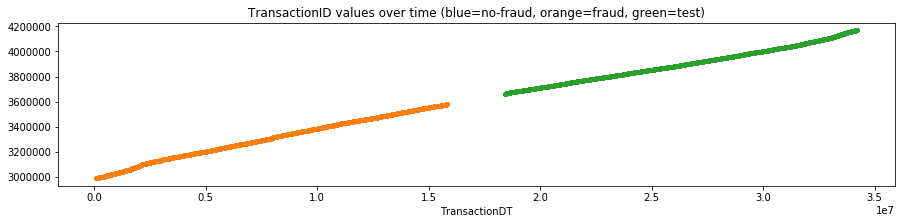

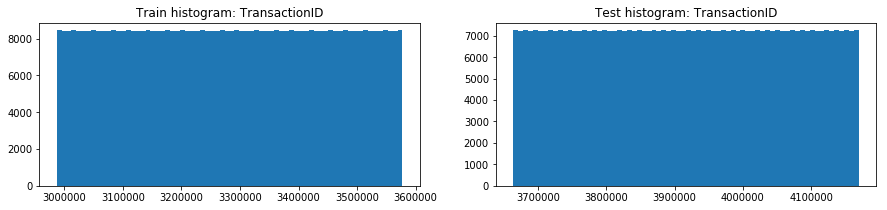

TransactionID         Train      ...        Test public  Test private
0           count  5.905400e+05      ...       1.013390e+05  4.053530e+05
1            mean  3.282270e+06      ...       3.714218e+06  3.967563e+06
2             std  1.704744e+05      ...       2.925419e+04  1.170155e+05
3             min  2.987000e+06      ...       3.663549e+06  3.764887e+06
4             25%  3.134635e+06      ...       3.688884e+06  3.866225e+06
5             50%  3.282270e+06      ...       3.714218e+06  3.967563e+06
6             75%  3.429904e+06      ...       3.739552e+06  4.068901e+06
7             max  3.577539e+06      ...       3.764887e+06  4.170239e+06
8   unique values  5.905400e+05      ...       1.013390e+05  4.053530e+05
9            NaNs  0.000000e+00      ...       0.000000e+00  0.000000e+00
10     NaNs share  0.000000e+00      ...       0.000000e+00  0.000000e+00

[11 rows x 7 columns]

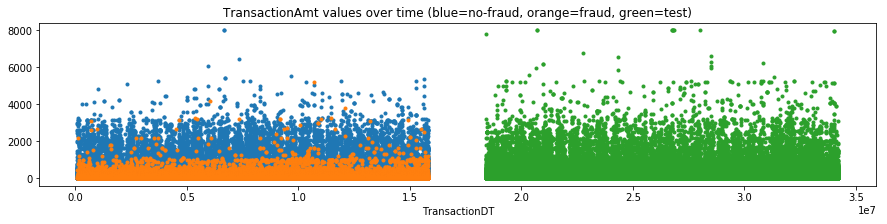

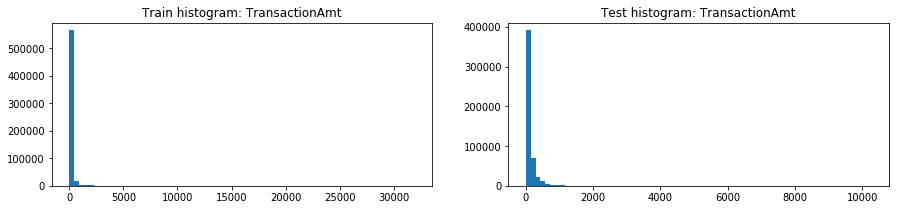

TransactionAmt          Train      ...          Test public   Test private
0           count  590540.000000      ...        101339.000000  405353.000000
1            mean     135.027176      ...           141.732271     132.973690
2             std     239.162522      ...           257.473804     242.736757
3             min       0.251000      ...             0.018000       0.140000
4             25%      43.321000      ...            45.950000      39.000000
5             50%      68.769000      ...            72.950000      67.950000
6             75%     125.000000      ...           134.950000     120.950000
7             max   31937.391000      ...          9154.460000   10270.000000
8   unique values   20902.000000      ...          5144.000000   12117.000000
9            NaNs       0.000000      ...             0.000000       0.000000
10     NaNs share       0.000000      ...             0.000000       0.000000

[11 rows x 7 columns]

TransactionAmt      ...        Count in test
0           59.00      ...              27365.0
1          117.00      ...              25798.0
2          107.95      ...              20243.0
3           57.95      ...              20063.0
4          100.00      ...              17565.0
5           50.00      ...              14469.0
6           49.00      ...              14231.0
7          226.00      ...              11084.0
8           39.00      ...               9926.0
9           29.00      ...               9019.0

[10 rows x 5 columns]

TransactionAmt      ...        Count in test
0           117.0      ...                25798
1            59.0      ...                27365
2           150.0      ...                 7426
3           100.0      ...                17565
4            49.0      ...                14231
5           200.0      ...                 6115
6           226.0      ...                11084
7           300.0      ...                 2104
8            50.0      ...                14469
9           171.0      ...                 7233

[10 rows x 5 columns]

ProductCD   Train     ...      Test public Test private
0          count  590540     ...           101339       405353
1         unique       5     ...                5            5
2            top       W     ...                W            W
3           freq  439670     ...            82563       278425
4  unique values       5     ...                5            5
5           NaNs       0     ...                0            0
6     NaNs share       0     ...                0            0

[7 rows x 7 columns]

ProductCD  Count in train (desc)      ...        Sum target  Count in test
0         W                 439670      ...              8969         360987
1         C                  68519      ...              8008          69266
2         R                  37699      ...              1426          35647
3         H                  33024      ...              1574          29373
4         S                  11628      ...               686          11418

[5 rows x 5 columns]

ProductCD  Count in train      ...        Sum target (desc)  Count in test
0         W          439670      ...                     8969         360987
1         C           68519      ...                     8008          69266
2         H           33024      ...                     1574          29373
3         R           37699      ...                     1426          35647
4         S           11628      ...                      686          11418

[5 rows x 5 columns]

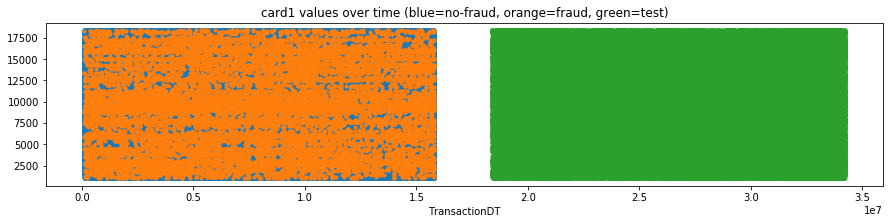

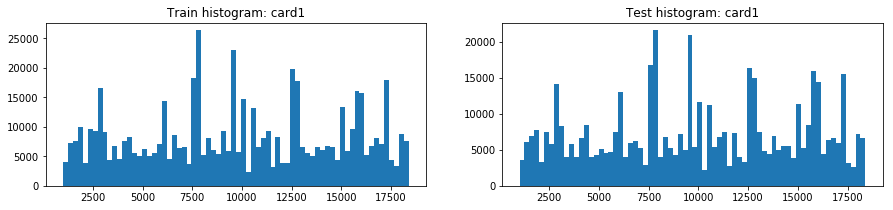

card1          Train      ...          Test public   Test private
0           count  590540.000000      ...        101339.000000  405353.000000
1            mean    9898.734658      ...          9907.330406    9969.701591
2             std    4901.170153      ...          4854.917514    4892.365179
3             min    1000.000000      ...          1006.000000    1001.000000
4             25%    6019.000000      ...          6053.000000    6019.000000
5             50%    9678.000000      ...          9653.000000    9803.000000
6             75%   14184.000000      ...         14052.000000   14290.000000
7             max   18396.000000      ...         18396.000000   18397.000000
8   unique values   13553.000000      ...          6935.000000   12300.000000
9            NaNs       0.000000      ...             0.000000       0.000000
10     NaNs share       0.000000      ...             0.000000       0.000000

[11 rows x 7 columns]

card1  Count in train (desc)      ...        Sum target  Count in test
0   7919                  14932      ...               112        13083.0
1   9500                  14162      ...               528        12081.0
2  15885                  10361      ...               444        12330.0
3  17188                  10344      ...               278         9262.0
4  15066                   7945      ...               313         6661.0
5  12695                   7091      ...               201         5641.0
6  12544                   6773      ...               146         5921.0
7   6019                   6771      ...               294         6497.0
8   2803                   6141      ...                73         4902.0
9   7585                   5334      ...               263         4763.0

[10 rows x 5 columns]

card1  Count in train      ...        Sum target (desc)  Count in test
0   9633            4158      ...                      742           4751
1   9500           14162      ...                      528          12081
2  15885           10361      ...                      444          12330
3   9026            2076      ...                      397            894
4  15063            2522      ...                      319           2060
5   5812            2818      ...                      314           3879
6   2616            4410      ...                      314           1786
7  15066            7945      ...                      313           6661
8   9917             919      ...                      306            920
9   6019            6771      ...                      294           6497

[10 rows x 5 columns]

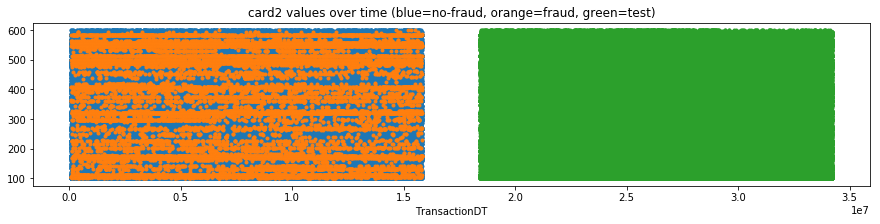

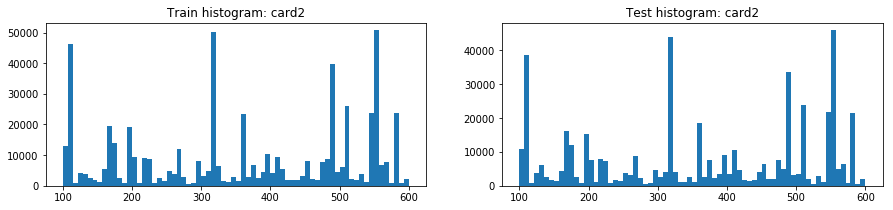

card2          Train      ...         Test public   Test private
0           count  581607.000000      ...        99008.000000  399030.000000
1            mean     362.555488      ...          358.809076     364.957595
2             std     157.793246      ...          157.772855     158.891431
3             min     100.000000      ...          100.000000     100.000000
4             25%     214.000000      ...          204.000000     214.000000
5             50%     361.000000      ...          360.000000     375.000000
6             75%     512.000000      ...          512.000000     514.000000
7             max     600.000000      ...          600.000000     600.000000
8   unique values     501.000000      ...          497.000000     497.000000
9            NaNs    8933.000000      ...         2331.000000    6323.000000
10     NaNs share       0.015100      ...            0.023000       0.015600

[11 rows x 7 columns]

card2  Count in train (desc)      ...        Sum target  Count in test
0  321.0                  48935      ...              1396        42796.0
1  111.0                  45191      ...               978        37346.0
2  555.0                  41995      ...               959        38409.0
3  490.0                  38145      ...               916        32351.0
4  583.0                  21803      ...               899        19700.0
5  170.0                  18214      ...               570        15197.0
6  194.0                  16938      ...               130        14573.0
7  545.0                  16355      ...              1420        15539.0
8  360.0                  15190      ...               158        11342.0
9  514.0                  14541      ...               672        12684.0

[10 rows x 5 columns]

card2  Count in train      ...        Sum target (desc)  Count in test
0  545.0           16355      ...                     1420          15539
1  321.0           48935      ...                     1396          42796
2  111.0           45191      ...                      978          37346
3  555.0           41995      ...                      959          38409
4  490.0           38145      ...                      916          32351
5  500.0            5045      ...                      911           2430
6  583.0           21803      ...                      899          19700
7  408.0            8012      ...                      673           9148
8  514.0           14541      ...                      672          12684
9  130.0            2746      ...                      657           5395

[10 rows x 5 columns]

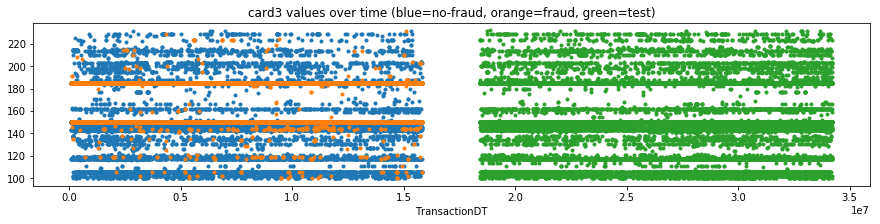

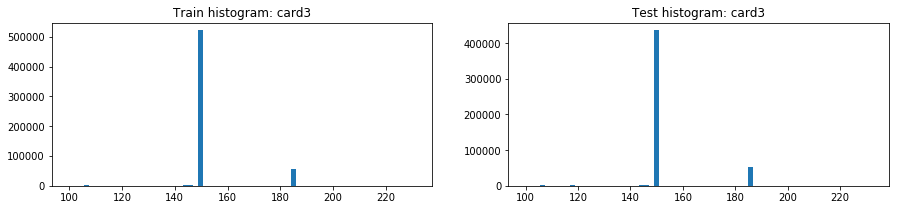

card3          Train      ...          Test public   Test private
0           count  588975.000000      ...        100033.000000  403657.000000
1            mean     153.194925      ...           152.127938     153.894177
2             std      11.336444      ...            10.591923      12.836503
3             min     100.000000      ...           100.000000     100.000000
4             25%     150.000000      ...           150.000000     150.000000
5             50%     150.000000      ...           150.000000     150.000000
6             75%     150.000000      ...           150.000000     150.000000
7             max     231.000000      ...           232.000000     231.000000
8   unique values     115.000000      ...            75.000000     111.000000
9            NaNs    1565.000000      ...          1306.000000    1696.000000
10     NaNs share       0.002700      ...             0.012900       0.004200

[11 rows x 7 columns]

card3  Count in train (desc)      ...        Sum target  Count in test
0  150.0                 521287      ...             12807       435558.0
1  185.0                  56346      ...              7362        53614.0
2  106.0                   1571      ...                24         1972.0
3 -999.0                   1565      ...                39         3002.0
4  146.0                   1252      ...                25         1218.0
5  144.0                   1252      ...               112         1381.0
6  117.0                    962      ...                18         1879.0
7  143.0                    899      ...                28          771.0
8  119.0                    750      ...                70          341.0
9  102.0                    460      ...                11          738.0

[10 rows x 5 columns]

card3  Count in train      ...        Sum target (desc)  Count in test
0  150.0          521287      ...                    12807         435558
1  185.0           56346      ...                     7362          53614
2  144.0            1252      ...                      112           1381
3  119.0             750      ...                       70            341
4 -999.0            1565      ...                       39           3002
5  143.0             899      ...                       28            771
6  146.0            1252      ...                       25           1218
7  106.0            1571      ...                       24           1972
8  117.0             962      ...                       18           1879
9  223.0              55      ...                       14            126

[10 rows x 5 columns]

card4   Train     ...      Test public Test private
0          count  588963     ...            99996       403610
1         unique       4     ...                4            4
2            top    visa     ...             visa         visa
3           freq  384767     ...            66078       268805
4  unique values       5     ...                5            5
5           NaNs    1577     ...             1343         1743
6     NaNs share  0.0027     ...           0.0133       0.0043

[7 rows x 7 columns]

card4      ...        Count in test
0              visa      ...               334882
1        mastercard      ...               158169
2  american express      ...                 7681
3          discover      ...                 2873
4              -999      ...                 3086

[5 rows x 5 columns]

card4      ...        Count in test
0              visa      ...               334882
1        mastercard      ...               158169
2          discover      ...                 2873
3  american express      ...                 7681
4              -999      ...                 3086

[5 rows x 5 columns]

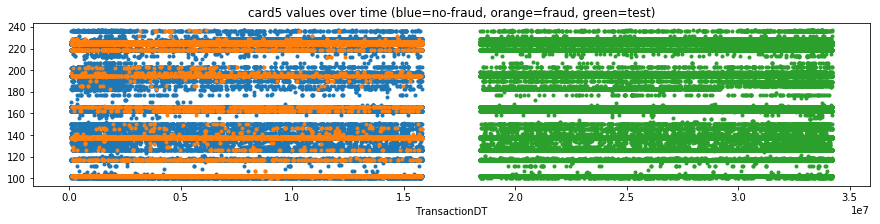

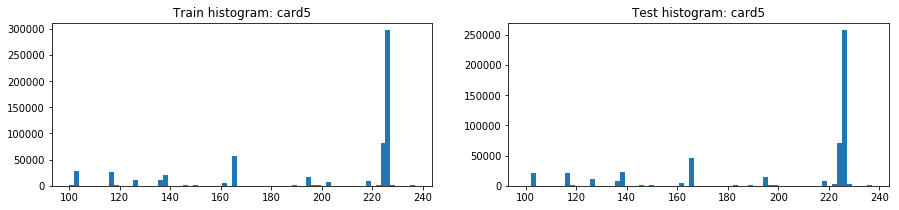

card5          Train      ...         Test public   Test private
0           count  586281.000000      ...        99816.000000  402329.000000
1            mean     199.278897      ...          200.406638     200.102588
2             std      41.244453      ...           40.584474      40.556792
3             min     100.000000      ...          100.000000     100.000000
4             25%     166.000000      ...          166.000000     166.000000
5             50%     226.000000      ...          226.000000     226.000000
6             75%     226.000000      ...          226.000000     226.000000
7             max     237.000000      ...          237.000000     237.000000
8   unique values     120.000000      ...           70.000000      97.000000
9            NaNs    4259.000000      ...         1523.000000    3024.000000
10     NaNs share       0.007200      ...            0.015000       0.007500

[11 rows x 7 columns]

card5  Count in train (desc)      ...        Sum target  Count in test
0  226.0                 296546      ...              8753       256991.0
1  224.0                  81513      ...              3152        71596.0
2  166.0                  57140      ...               630        45790.0
3  102.0                  29105      ...              1832        20386.0
4  117.0                  25941      ...               354        21120.0
5  138.0                  19737      ...              1682        22102.0
6  195.0                  16945      ...               681        14951.0
7  137.0                  11720      ...              1725         7730.0
8  126.0                  10298      ...               105        11439.0
9  219.0                   9924      ...               571         8402.0

[10 rows x 5 columns]

card5  Count in train      ...        Sum target (desc)  Count in test
0  226.0          296546      ...                     8753         256991
1  224.0           81513      ...                     3152          71596
2  102.0           29105      ...                     1832          20386
3  137.0           11720      ...                     1725           7730
4  138.0           19737      ...                     1682          22102
5  195.0           16945      ...                      681          14951
6  166.0           57140      ...                      630          45790
7  219.0            9924      ...                      571           8402
8  117.0           25941      ...                      354          21120
9  162.0            4524      ...                      301           4512

[10 rows x 5 columns]

card6   Train     ...      Test public Test private
0          count  588969     ...           100033       403652
1         unique       4     ...                2            3
2            top   debit     ...            debit        debit
3           freq  439938     ...            78402       306620
4  unique values       5     ...                3            4
5           NaNs    1571     ...             1306         1701
6     NaNs share  0.0027     ...           0.0129       0.0042

[7 rows x 7 columns]

card6      ...        Count in test
0            debit      ...             385021.0
1           credit      ...             118662.0
2             -999      ...               3007.0
3  debit or credit      ...                  NaN
4      charge card      ...                  1.0

[5 rows x 5 columns]

card6      ...        Count in test
0            debit      ...             385021.0
1           credit      ...             118662.0
2             -999      ...               3007.0
3  debit or credit      ...                  NaN
4      charge card      ...                  1.0

[5 rows x 5 columns]

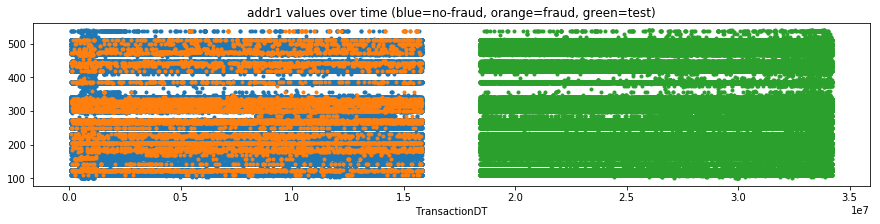

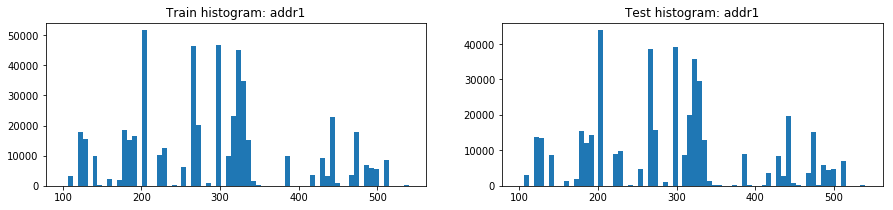

addr1          Train      ...         Test public   Test private
0           count  524834.000000      ...        91556.000000  349527.000000
1            mean     290.733794      ...          290.515029     292.194978
2             std     101.741072      ...          101.350107     102.245872
3             min     100.000000      ...          110.000000     100.000000
4             25%     204.000000      ...          204.000000     204.000000
5             50%     299.000000      ...          299.000000     299.000000
6             75%     330.000000      ...          330.000000     330.000000
7             max     540.000000      ...          536.000000     540.000000
8   unique values     333.000000      ...           83.000000     289.000000
9            NaNs   65706.000000      ...         9783.000000   55826.000000
10     NaNs share       0.111300      ...            0.096500       0.137700

[11 rows x 7 columns]

addr1  Count in train (desc)      ...        Sum target  Count in test
0 -999.0                  65706      ...              7741        65609.0
1  299.0                  46335      ...               985        38710.0
2  325.0                  42751      ...              1087        34151.0
3  204.0                  42020      ...              1120        35049.0
4  264.0                  39870      ...               728        32710.0
5  330.0                  26287      ...               840        22100.0
6  315.0                  23078      ...               411        19957.0
7  441.0                  20827      ...               533        18063.0
8  272.0                  20141      ...               576        15788.0
9  123.0                  16105      ...               398        12595.0

[10 rows x 5 columns]

addr1  Count in train      ...        Sum target (desc)  Count in test
0 -999.0           65706      ...                     7741          65609
1  204.0           42020      ...                     1120          35049
2  325.0           42751      ...                     1087          34151
3  299.0           46335      ...                      985          38710
4  330.0           26287      ...                      840          22100
5  264.0           39870      ...                      728          32710
6  272.0           20141      ...                      576          15788
7  441.0           20827      ...                      533          18063
8  337.0           15149      ...                      439          12932
9  315.0           23078      ...                      411          19957

[10 rows x 5 columns]

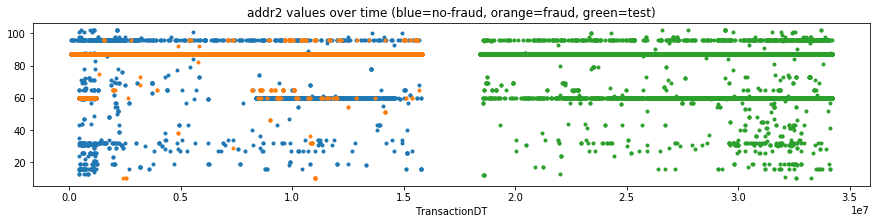

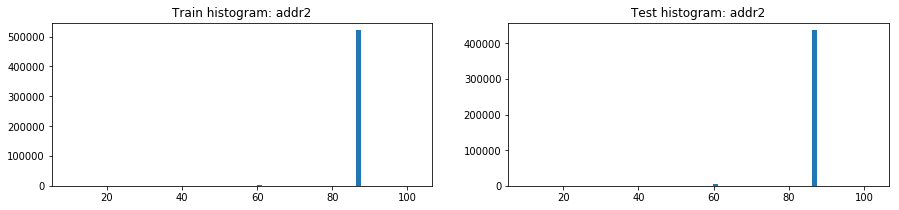

addr2          Train      ...         Test public   Test private
0           count  524834.000000      ...        91556.000000  349527.000000
1            mean      86.800630      ...           86.964372      86.660295
2             std       2.690623      ...            1.217604       3.294569
3             min      10.000000      ...           12.000000      10.000000
4             25%      87.000000      ...           87.000000      87.000000
5             50%      87.000000      ...           87.000000      87.000000
6             75%      87.000000      ...           87.000000      87.000000
7             max     102.000000      ...           96.000000     102.000000
8   unique values      75.000000      ...           18.000000      72.000000
9            NaNs   65706.000000      ...         9783.000000   55826.000000
10     NaNs share       0.111300      ...            0.096500       0.137700

[11 rows x 7 columns]

addr2  Count in train (desc)      ...        Sum target  Count in test
0   87.0                 520481      ...             12477       435934.0
1 -999.0                  65706      ...              7741        65609.0
2   60.0                   3084      ...               279         4041.0
3   96.0                    638      ...                89          608.0
4   32.0                     91      ...                 6           61.0
5   65.0                     82      ...                44           49.0
6   16.0                     55      ...                 0           22.0
7   31.0                     47      ...                 0           36.0
8   19.0                     33      ...                 0           23.0
9   26.0                     25      ...                 0            7.0

[10 rows x 5 columns]

addr2  Count in train      ...        Sum target (desc)  Count in test
0   87.0          520481      ...                    12477         435934
1 -999.0           65706      ...                     7741          65609
2   60.0            3084      ...                      279           4041
3   96.0             638      ...                       89            608
4   65.0              82      ...                       44             49
5   10.0               8      ...                        8              3
6   32.0              91      ...                        6             61
7   51.0               4      ...                        4              1
8   46.0               3      ...                        3              1
9   54.0               6      ...                        2             10

[10 rows x 5 columns]

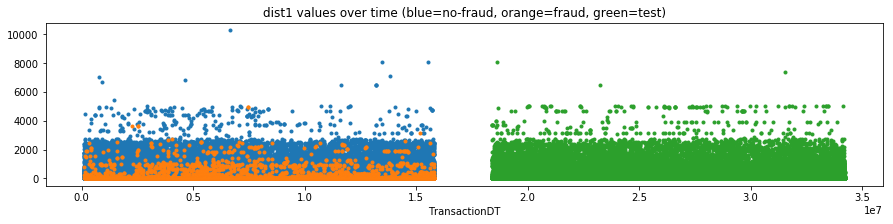

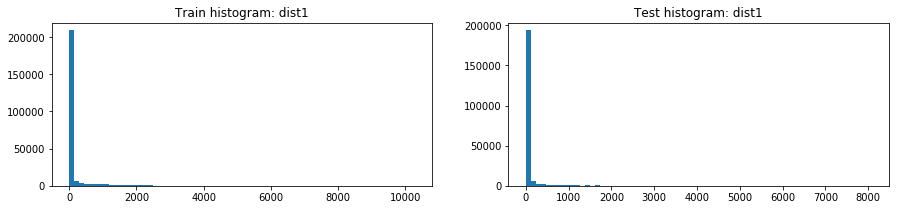

dist1          Train      ...         Test public   Test private
0           count  238269.000000      ...        47587.000000  167888.000000
1            mean     118.502180      ...           92.930464      85.404353
2             std     371.872026      ...          332.382991     308.742753
3             min       0.000000      ...            0.000000       0.000000
4             25%       3.000000      ...            3.000000       3.000000
5             50%       8.000000      ...            8.000000       8.000000
6             75%      24.000000      ...           20.000000      20.000000
7             max   10286.000000      ...         8081.000000    7385.000000
8   unique values    2652.000000      ...         1347.000000    1843.000000
9            NaNs  352271.000000      ...        53752.000000  237465.000000
10     NaNs share       0.596500      ...            0.530400       0.585800

[11 rows x 7 columns]

dist1  Count in train (desc)      ...        Sum target  Count in test
0 -999.0                 352271      ...             15908       291217.0
1    0.0                  19824      ...               380        19278.0
2    1.0                  18330      ...               512        18025.0
3    2.0                  17028      ...               200        15687.0
4    4.0                  13067      ...               215        12137.0
5    3.0                  12808      ...               150        12333.0
6    5.0                  12004      ...               267        11238.0
7    6.0                   9843      ...               144         8775.0
8    7.0                   9340      ...               137         9210.0
9    8.0                   7731      ...               117         7333.0

[10 rows x 5 columns]

dist1  Count in train      ...        Sum target (desc)  Count in test
0 -999.0          352271      ...                    15908         291217
1    1.0           18330      ...                      512          18025
2    0.0           19824      ...                      380          19278
3    5.0           12004      ...                      267          11238
4    4.0           13067      ...                      215          12137
5    2.0           17028      ...                      200          15687
6    3.0           12808      ...                      150          12333
7    9.0            7728      ...                      146           7608
8    6.0            9843      ...                      144           8775
9    7.0            9340      ...                      137           9210

[10 rows x 5 columns]

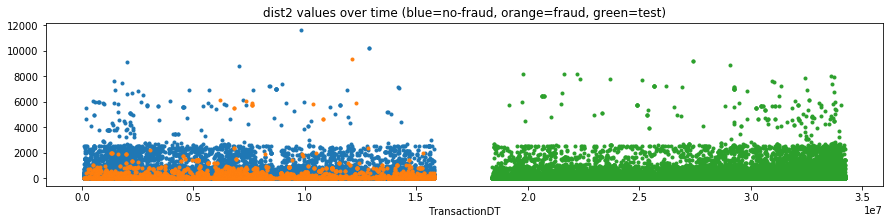

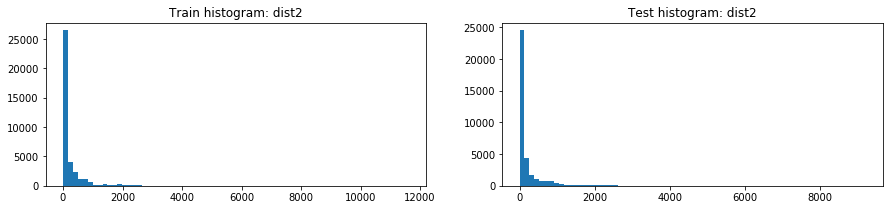

dist2          Train      ...         Test public   Test private
0           count   37627.000000      ...         4716.000000   31720.000000
1            mean     231.855423      ...          233.553223     237.713525
2             std     529.053494      ...          555.365698     556.618714
3             min       0.000000      ...            0.000000       0.000000
4             25%       7.000000      ...            7.000000       7.000000
5             50%      37.000000      ...           50.000000      42.000000
6             75%     206.000000      ...          190.000000     196.000000
7             max   11623.000000      ...         8169.000000    9213.000000
8   unique values    1752.000000      ...          611.000000    1730.000000
9            NaNs  552913.000000      ...        96623.000000  373633.000000
10     NaNs share       0.936300      ...            0.953500       0.921700

[11 rows x 7 columns]

dist2  Count in train (desc)      ...        Sum target  Count in test
0 -999.0                 552913      ...             16932       470255.0
1    7.0                   5687      ...               496         2660.0
2    0.0                   3519      ...               540         2821.0
3    1.0                   1374      ...               192         1565.0
4    9.0                    742      ...               110          993.0
5    4.0                    659      ...                47          557.0
6    2.0                    556      ...                20          805.0
7    3.0                    490      ...                38          606.0
8   68.0                    485      ...                47          342.0
9    6.0                    412      ...                10          497.0

[10 rows x 5 columns]

dist2  Count in train      ...        Sum target (desc)  Count in test
0 -999.0          552913      ...                    16932         470255
1    0.0            3519      ...                      540           2821
2    7.0            5687      ...                      496           2660
3    1.0            1374      ...                      192           1565
4    9.0             742      ...                      110            993
5   17.0             257      ...                       71            367
6  199.0             362      ...                       70            138
7   49.0             110      ...                       56             74
8  478.0             102      ...                       55             25
9  150.0             215      ...                       51             43

[10 rows x 5 columns]

P_emaildomain      Train     ...      Test public Test private
0          count     496084     ...            85891       351609
1         unique         59     ...               59           60
2            top  gmail.com     ...        gmail.com    gmail.com
3           freq     228355     ...            41104       166345
4  unique values         60     ...               60           61
5           NaNs      94456     ...            15448        53744
6     NaNs share     0.1599     ...           0.1524       0.1326

[7 rows x 7 columns]

P_emaildomain      ...        Count in test
0      gmail.com      ...               207448
1      yahoo.com      ...                81850
2           -999      ...                69192
3    hotmail.com      ...                40399
4  anonymous.com      ...                34064
5        aol.com      ...                24048
6    comcast.net      ...                 6586
7     icloud.com      ...                 6049
8    outlook.com      ...                 4838
9        msn.com      ...                 3388

[10 rows x 5 columns]

P_emaildomain      ...        Count in test
0      gmail.com      ...               207448
1           -999      ...                69192
2    hotmail.com      ...                40399
3      yahoo.com      ...                81850
4  anonymous.com      ...                34064
5        aol.com      ...                24048
6    outlook.com      ...                 4838
7    comcast.net      ...                 6586
8     icloud.com      ...                 6049
9       mail.com      ...                  597

[10 rows x 5 columns]

R_emaildomain      Train     ...      Test public Test private
0          count     137291     ...            18223       117647
1         unique         60     ...               57           60
2            top  gmail.com     ...        gmail.com    gmail.com
3           freq      57147     ...             8588        53150
4  unique values         61     ...               58           61
5           NaNs     453249     ...            83116       287706
6     NaNs share     0.7675     ...           0.8202       0.7098

[7 rows x 7 columns]

R_emaildomain      ...        Count in test
0           -999      ...               370821
1      gmail.com      ...                61738
2    hotmail.com      ...                25657
3  anonymous.com      ...                19115
4      yahoo.com      ...                 9563
5        aol.com      ...                 3538
6    outlook.com      ...                 2504
7    comcast.net      ...                 1701
8   yahoo.com.mx      ...                 1235
9     icloud.com      ...                 1422

[10 rows x 5 columns]

R_emaildomain      ...        Count in test
0           -999      ...               370821
1      gmail.com      ...                61738
2    hotmail.com      ...                25657
3      yahoo.com      ...                 9563
4  anonymous.com      ...                19115
5    outlook.com      ...                 2504
6     icloud.com      ...                 1422
7        aol.com      ...                 3538
8     outlook.es      ...                  420
9       mail.com      ...                  219

[10 rows x 5 columns]

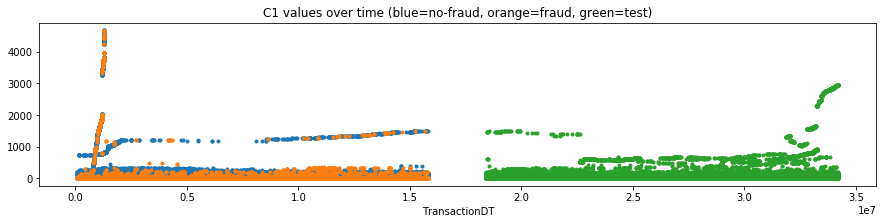

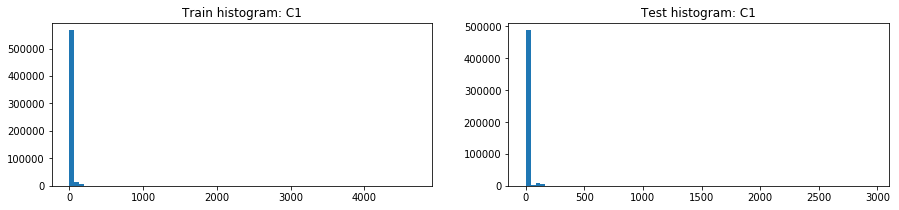

C1          Train      ...          Test public   Test private
0           count  590540.000000      ...        101339.000000  405350.000000
1            mean      14.092458      ...             8.408707      10.514326
2             std     133.569018      ...            40.872210      86.307573
3             min       0.000000      ...             0.000000       0.000000
4             25%       1.000000      ...             1.000000       1.000000
5             50%       1.000000      ...             2.000000       1.000000
6             75%       3.000000      ...             3.000000       3.000000
7             max    4685.000000      ...          1501.000000    2950.000000
8   unique values    1657.000000      ...           344.000000    1118.000000
9            NaNs       0.000000      ...             0.000000       3.000000
10     NaNs share       0.000000      ...             0.000000       0.000000

[11 rows x 7 columns]

C1  Count in train (desc)      ...        Sum target  Count in test
0   1.0                 316791      ...              7676       269951.0
1   2.0                 105071      ...              3182        92449.0
2   3.0                  51315      ...              1841        45254.0
3   4.0                  28845      ...              1171        24949.0
4   5.0                  17922      ...               971        14929.0
5   6.0                  10567      ...               567         9207.0
6   7.0                   7263      ...               423         5721.0
7   8.0                   5072      ...               336         3996.0
8   9.0                   3612      ...               289         2771.0
9  10.0                   2904      ...               267         1969.0

[10 rows x 5 columns]

C1  Count in train      ...        Sum target (desc)  Count in test
0   1.0          316791      ...                     7676         269951
1   2.0          105071      ...                     3182          92449
2   3.0           51315      ...                     1841          45254
3   4.0           28845      ...                     1171          24949
4   5.0           17922      ...                      971          14929
5   6.0           10567      ...                      567           9207
6   7.0            7263      ...                      423           5721
7   8.0            5072      ...                      336           3996
8   9.0            3612      ...                      289           2771
9  10.0            2904      ...                      267           1969

[10 rows x 5 columns]

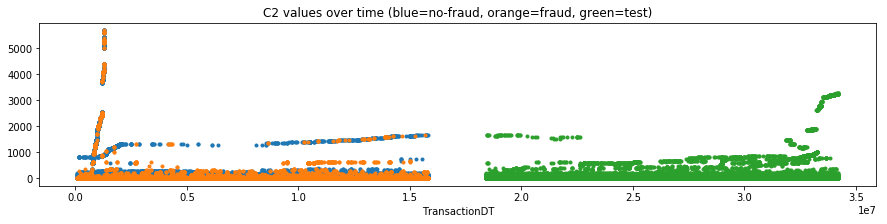

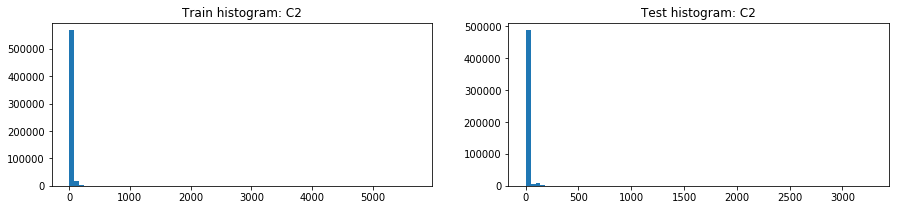

C2          Train      ...          Test public   Test private
0           count  590540.000000      ...        101339.000000  405350.000000
1            mean      15.269734      ...             8.606923      11.241549
2             std     154.668899      ...            44.375338      96.874447
3             min       0.000000      ...             0.000000       0.000000
4             25%       1.000000      ...             1.000000       1.000000
5             50%       1.000000      ...             2.000000       1.000000
6             75%       3.000000      ...             3.000000       3.000000
7             max    5691.000000      ...          1672.000000    3275.000000
8   unique values    1216.000000      ...           370.000000    1054.000000
9            NaNs       0.000000      ...             0.000000       3.000000
10     NaNs share       0.000000      ...             0.000000       0.000000

[11 rows x 7 columns]

C2  Count in train (desc)      ...        Sum target  Count in test
0   1.0                 316261      ...              7297       265435.0
1   2.0                 103948      ...              3324        93084.0
2   3.0                  51770      ...              1872        44267.0
3   4.0                  28251      ...              1423        24329.0
4   5.0                  16971      ...               840        14711.0
5   6.0                  10682      ...               534         9662.0
6   7.0                   7382      ...               449         6097.0
7   8.0                   5105      ...               273         4387.0
8   9.0                   3750      ...               221         3364.0
9  10.0                   2797      ...               239         2432.0

[10 rows x 5 columns]

C2  Count in train      ...        Sum target (desc)  Count in test
0   1.0          316261      ...                     7297         265435
1   2.0          103948      ...                     3324          93084
2   3.0           51770      ...                     1872          44267
3   4.0           28251      ...                     1423          24329
4   5.0           16971      ...                      840          14711
5   6.0           10682      ...                      534           9662
6   7.0            7382      ...                      449           6097
7   8.0            5105      ...                      273           4387
8  10.0            2797      ...                      239           2432
9   9.0            3750      ...                      221           3364

[10 rows x 5 columns]

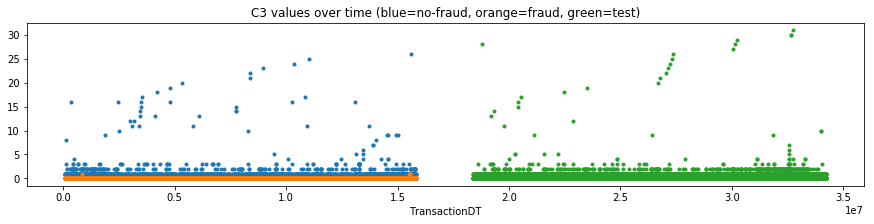

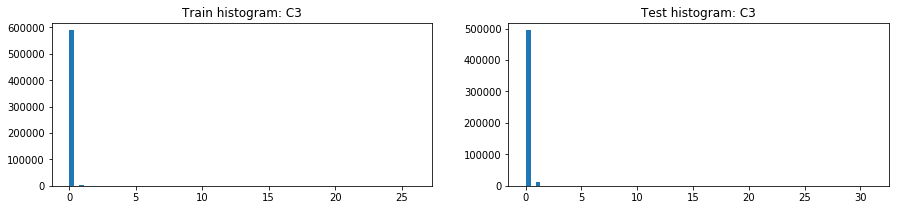

C3          Train      ...          Test public   Test private
0           count  590540.000000      ...        101339.000000  405350.000000
1            mean       0.005644      ...             0.009365       0.031913
2             std       0.150536      ...             0.176030       0.238727
3             min       0.000000      ...             0.000000       0.000000
4             25%       0.000000      ...             0.000000       0.000000
5             50%       0.000000      ...             0.000000       0.000000
6             75%       0.000000      ...             0.000000       0.000000
7             max      26.000000      ...            28.000000      31.000000
8   unique values      27.000000      ...            14.000000      26.000000
9            NaNs       0.000000      ...             0.000000       3.000000
10     NaNs share       0.000000      ...             0.000000       0.000000

[11 rows x 7 columns]

C3  Count in train (desc)      ...        Sum target  Count in test
0   0.0                 588111      ...             20658       493779.0
1   1.0                   2137      ...                 5        12506.0
2   2.0                    180      ...                 0          320.0
3   3.0                     58      ...                 0           37.0
4   4.0                      7      ...                 0           11.0
5  16.0                      6      ...                 0            1.0
6   9.0                      5      ...                 0            3.0
7  11.0                      5      ...                 0            1.0
8  14.0                      3      ...                 0            1.0
9  13.0                      3      ...                 0            1.0

[10 rows x 5 columns]

C3  Count in train      ...        Sum target (desc)  Count in test
0   0.0          588111      ...                    20658         493779
1   1.0            2137      ...                        5          12506
2  15.0               2      ...                        0              1
3   6.0               1      ...                        0              1
4  19.0               1      ...                        0              1
5  20.0               1      ...                        0              1
6  21.0               1      ...                        0              1
7  18.0               1      ...                        0              1
8  23.0               1      ...                        0              1
9  24.0               1      ...                        0              1

[10 rows x 5 columns]

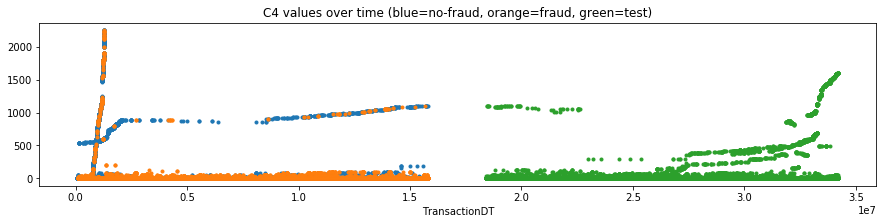

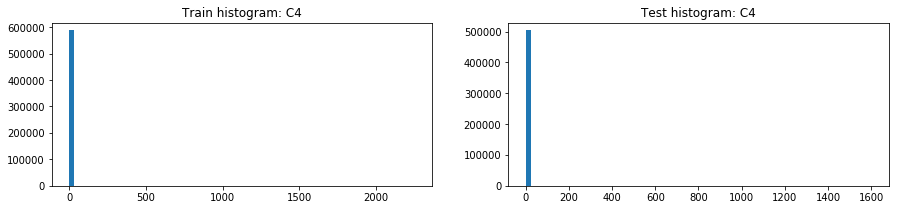

C4          Train      ...          Test public   Test private
0           count  590540.000000      ...        101339.000000  405350.000000
1            mean       4.092185      ...             0.985040       2.736082
2             std      68.848459      ...            23.116076      45.440263
3             min       0.000000      ...             0.000000       0.000000
4             25%       0.000000      ...             0.000000       0.000000
5             50%       0.000000      ...             0.000000       0.000000
6             75%       0.000000      ...             0.000000       1.000000
7             max    2253.000000      ...          1100.000000    1601.000000
8   unique values    1260.000000      ...            99.000000     698.000000
9            NaNs       0.000000      ...             0.000000       3.000000
10     NaNs share       0.000000      ...             0.000000       0.000000

[11 rows x 7 columns]

C4  Count in train (desc)      ...        Sum target  Count in test
0   0.0                 451883      ...              9212       371571.0
1   1.0                 111817      ...              5736       107826.0
2   2.0                  12994      ...              1669        13702.0
3   3.0                   4949      ...               713         4307.0
4   4.0                   1902      ...               581         1759.0
5   5.0                    851      ...               344         1159.0
6   6.0                    597      ...               240          713.0
7   7.0                    372      ...               121          482.0
8   9.0                    273      ...               149          298.0
9  10.0                    233      ...               159          305.0

[10 rows x 5 columns]

C4  Count in train      ...        Sum target (desc)  Count in test
0   0.0          451883      ...                     9212         371571
1   1.0          111817      ...                     5736         107826
2   2.0           12994      ...                     1669          13702
3   3.0            4949      ...                      713           4307
4   4.0            1902      ...                      581           1759
5   5.0             851      ...                      344           1159
6   6.0             597      ...                      240            713
7  10.0             233      ...                      159            305
8   9.0             273      ...                      149            298
9   7.0             372      ...                      121            482

[10 rows x 5 columns]

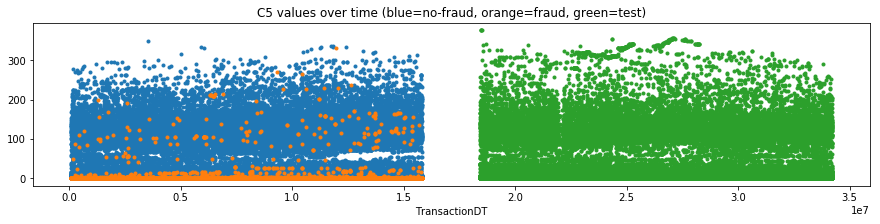

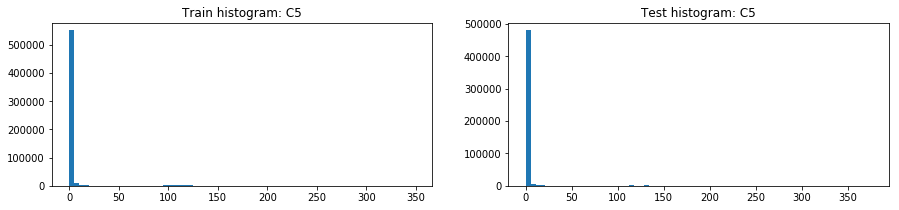

C5          Train      ...          Test public   Test private
0           count  590540.000000      ...        101339.000000  405350.000000
1            mean       5.571526      ...             5.711493       4.775493
2             std      25.786976      ...            26.488371      25.195644
3             min       0.000000      ...             0.000000       0.000000
4             25%       0.000000      ...             0.000000       0.000000
5             50%       0.000000      ...             0.000000       0.000000
6             75%       1.000000      ...             1.000000       1.000000
7             max     349.000000      ...           376.000000     355.000000
8   unique values     319.000000      ...           300.000000     353.000000
9            NaNs       0.000000      ...             0.000000       3.000000
10     NaNs share       0.000000      ...             0.000000       0.000000

[11 rows x 7 columns]

C5  Count in train (desc)      ...        Sum target  Count in test
0  0.0                 372435      ...             18759         334573
1  1.0                 122883      ...               929          96588
2  2.0                  34776      ...               381          29363
3  3.0                  13189      ...               158          10699
4  4.0                   6828      ...                45           5446
5  5.0                   3763      ...                16           2832
6  6.0                   2837      ...                12           1938
7  7.0                   1906      ...                 7           1369
8  8.0                   1443      ...                13            991
9  9.0                   1076      ...                10            905

[10 rows x 5 columns]

C5  Count in train      ...        Sum target (desc)  Count in test
0   0.0          372435      ...                    18759         334573
1   1.0          122883      ...                      929          96588
2   2.0           34776      ...                      381          29363
3   3.0           13189      ...                      158          10699
4   4.0            6828      ...                       45           5446
5  26.0             203      ...                       23            119
6  14.0             420      ...                       23            450
7  13.0             583      ...                       17            546
8   5.0            3763      ...                       16           2832
9   8.0            1443      ...                       13            991

[10 rows x 5 columns]

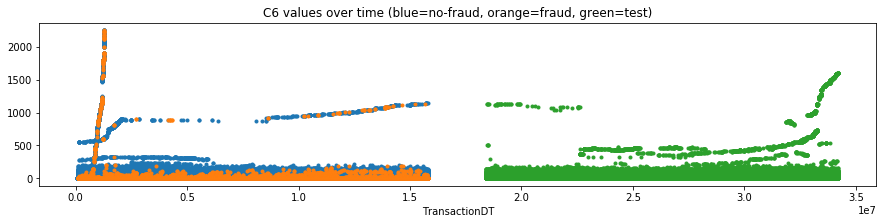

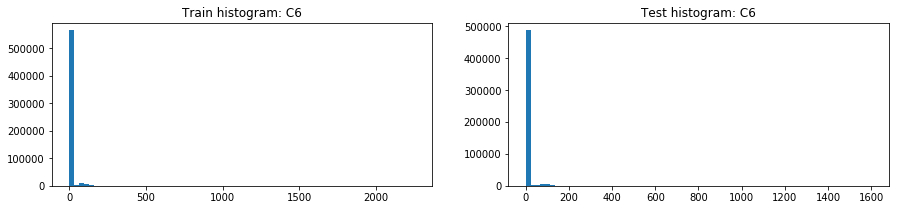

C6          Train      ...          Test public   Test private
0           count  590540.000000      ...        101339.000000  405350.000000
1            mean       9.071082      ...             5.905969       7.092244
2             std      71.508467      ...            29.791262      50.136998
3             min       0.000000      ...             0.000000       0.000000
4             25%       1.000000      ...             1.000000       1.000000
5             50%       1.000000      ...             1.000000       1.000000
6             75%       2.000000      ...             2.000000       2.000000
7             max    2253.000000      ...          1138.000000    1601.000000
8   unique values    1328.000000      ...           201.000000     820.000000
9            NaNs       0.000000      ...             0.000000       3.000000
10     NaNs share       0.000000      ...             0.000000       0.000000

[11 rows x 7 columns]

C6  Count in train (desc)      ...        Sum target  Count in test
0  1.0                 341552      ...              9483       289685.0
1  2.0                  86103      ...              3259        75316.0
2  0.0                  49066      ...              1536        45707.0
3  3.0                  35490      ...              1511        31815.0
4  4.0                  17805      ...               949        16420.0
5  5.0                  10187      ...               610         8914.0
6  6.0                   6048      ...               472         5293.0
7  7.0                   3934      ...               215         3366.0
8  8.0                   3048      ...               175         2105.0
9  9.0                   2335      ...               229         1563.0

[10 rows x 5 columns]

C6  Count in train      ...        Sum target (desc)  Count in test
0   1.0          341552      ...                     9483         289685
1   2.0           86103      ...                     3259          75316
2   0.0           49066      ...                     1536          45707
3   3.0           35490      ...                     1511          31815
4   4.0           17805      ...                      949          16420
5   5.0           10187      ...                      610           8914
6   6.0            6048      ...                      472           5293
7  10.0            1817      ...                      233           1267
8   9.0            2335      ...                      229           1563
9   7.0            3934      ...                      215           3366

[10 rows x 5 columns]

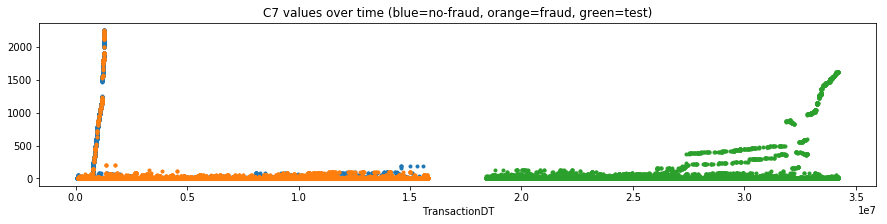

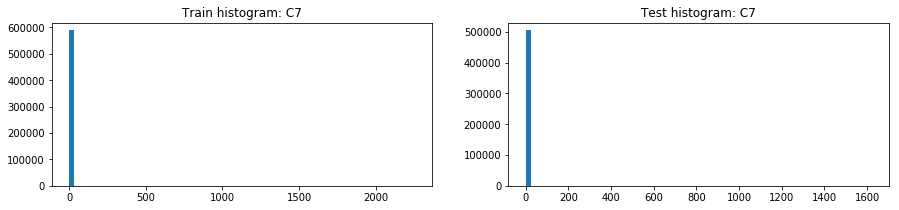

C7          Train      ...          Test public   Test private
0           count  590540.000000      ...        101339.000000  405350.000000
1            mean       2.848478      ...             0.377999       2.003217
2             std      61.727304      ...             3.769156      42.297173
3             min       0.000000      ...             0.000000       0.000000
4             25%       0.000000      ...             0.000000       0.000000
5             50%       0.000000      ...             0.000000       0.000000
6             75%       0.000000      ...             0.000000       0.000000
7             max    2255.000000      ...           130.000000    1621.000000
8   unique values    1103.000000      ...            74.000000     512.000000
9            NaNs       0.000000      ...             0.000000       3.000000
10     NaNs share       0.000000      ...             0.000000       0.000000

[11 rows x 7 columns]

C7  Count in train (desc)      ...        Sum target  Count in test
0   0.0                 523142      ...             12752       438095.0
1   1.0                  51966      ...              3497        50141.0
2   2.0                   7314      ...              1035         8712.0
3   3.0                   2033      ...               473         2734.0
4   4.0                   1109      ...               478         1344.0
5   5.0                    481      ...               279          691.0
6   6.0                    409      ...               201          478.0
7   7.0                    267      ...               118          369.0
8   9.0                    233      ...               146          216.0
9  10.0                    175      ...               137          199.0

[10 rows x 5 columns]

C7  Count in train      ...        Sum target (desc)  Count in test
0   0.0          523142      ...                    12752         438095
1   1.0           51966      ...                     3497          50141
2   2.0            7314      ...                     1035           8712
3   4.0            1109      ...                      478           1344
4   3.0            2033      ...                      473           2734
5   5.0             481      ...                      279            691
6   6.0             409      ...                      201            478
7   9.0             233      ...                      146            216
8  10.0             175      ...                      137            199
9   7.0             267      ...                      118            369

[10 rows x 5 columns]

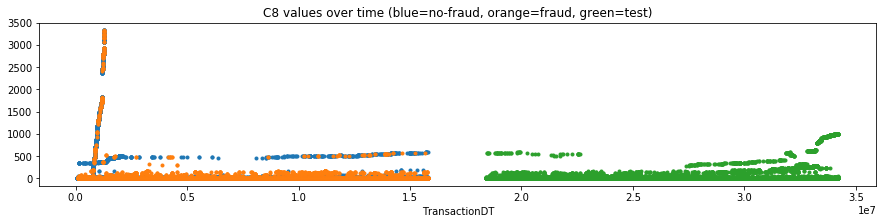

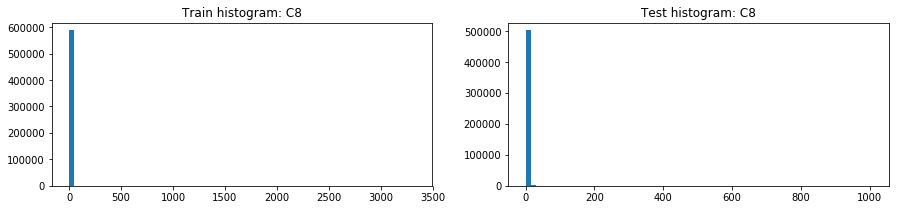

C8          Train      ...          Test public   Test private
0           count  590540.000000      ...        101339.000000  405350.000000
1            mean       5.144574      ...             1.030146       2.109954
2             std      95.378574      ...            13.587585      29.140063
3             min       0.000000      ...             0.000000       0.000000
4             25%       0.000000      ...             0.000000       0.000000
5             50%       0.000000      ...             0.000000       0.000000
6             75%       0.000000      ...             0.000000       1.000000
7             max    3331.000000      ...           584.000000    1005.000000
8   unique values    1253.000000      ...           120.000000     422.000000
9            NaNs       0.000000      ...             0.000000       3.000000
10     NaNs share       0.000000      ...             0.000000       0.000000

[11 rows x 7 columns]

C8  Count in train (desc)      ...        Sum target  Count in test
0  0.0                 447667      ...              9356       368637.0
1  1.0                 104994      ...              4661        97332.0
2  2.0                  15927      ...              1555        18261.0
3  3.0                   5493      ...               754         6801.0
4  4.0                   2817      ...               514         3172.0
5  8.0                   1790      ...               202          810.0
6  6.0                   1774      ...               362         1386.0
7  5.0                   1721      ...               383         2035.0
8  7.0                    988      ...               235         1015.0
9  9.0                    718      ...               221          660.0

[10 rows x 5 columns]

C8  Count in train      ...        Sum target (desc)  Count in test
0  0.0          447667      ...                     9356         368637
1  1.0          104994      ...                     4661          97332
2  2.0           15927      ...                     1555          18261
3  3.0            5493      ...                      754           6801
4  4.0            2817      ...                      514           3172
5  5.0            1721      ...                      383           2035
6  6.0            1774      ...                      362           1386
7  7.0             988      ...                      235           1015
8  9.0             718      ...                      221            660
9  8.0            1790      ...                      202            810

[10 rows x 5 columns]

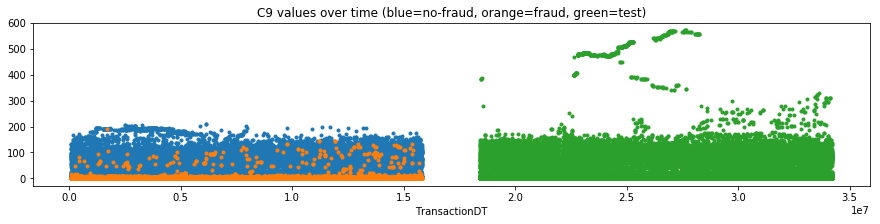

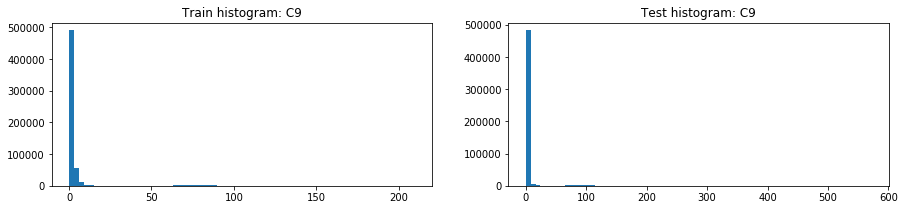

C9          Train      ...          Test public   Test private
0           count  590540.000000      ...        101339.000000  405350.000000
1            mean       4.480240      ...             5.117645       4.485509
2             std      16.674897      ...            18.153293      21.993710
3             min       0.000000      ...             0.000000       0.000000
4             25%       0.000000      ...             1.000000       0.000000
5             50%       1.000000      ...             1.000000       1.000000
6             75%       2.000000      ...             2.000000       2.000000
7             max     210.000000      ...           386.000000     572.000000
8   unique values     205.000000      ...           175.000000     352.000000
9            NaNs       0.000000      ...             0.000000       3.000000
10     NaNs share       0.000000      ...             0.000000       0.000000

[11 rows x 7 columns]

C9  Count in train (desc)      ...        Sum target  Count in test
0  1.0                 228938      ...              4364       191416.0
1  0.0                 183795      ...             12256       157766.0
2  2.0                  77829      ...              1686        68814.0
3  3.0                  32505      ...               852        31510.0
4  4.0                  16196      ...               321        15476.0
5  5.0                   8648      ...               301         7835.0
6  6.0                   5760      ...               170         4910.0
7  7.0                   3529      ...                94         2970.0
8  8.0                   2548      ...                76         2164.0
9  9.0                   1871      ...               146         1480.0

[10 rows x 5 columns]

C9  Count in train      ...        Sum target (desc)  Count in test
0  0.0          183795      ...                    12256         157766
1  1.0          228938      ...                     4364         191416
2  2.0           77829      ...                     1686          68814
3  3.0           32505      ...                      852          31510
4  4.0           16196      ...                      321          15476
5  5.0            8648      ...                      301           7835
6  6.0            5760      ...                      170           4910
7  9.0            1871      ...                      146           1480
8  7.0            3529      ...                       94           2970
9  8.0            2548      ...                       76           2164

[10 rows x 5 columns]

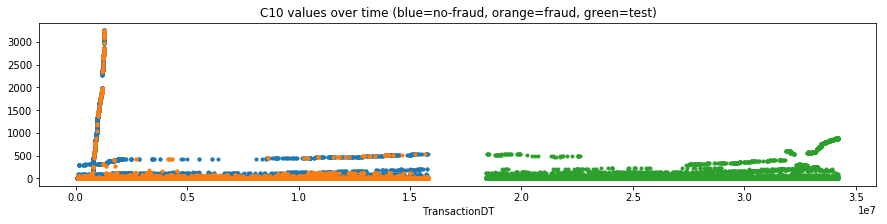

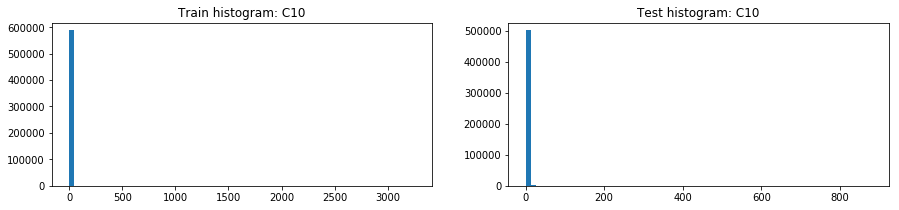

C10          Train      ...          Test public   Test private
0           count  590540.000000      ...        101339.000000  405350.000000
1            mean       5.240343      ...             0.869409       2.045334
2             std      95.581443      ...            11.906035      25.805962
3             min       0.000000      ...             0.000000       0.000000
4             25%       0.000000      ...             0.000000       0.000000
5             50%       0.000000      ...             0.000000       0.000000
6             75%       0.000000      ...             0.000000       1.000000
7             max    3257.000000      ...           530.000000     881.000000
8   unique values    1231.000000      ...           111.000000     439.000000
9            NaNs       0.000000      ...             0.000000       3.000000
10     NaNs share       0.000000      ...             0.000000       0.000000

[11 rows x 7 columns]

C10  Count in train (desc)      ...        Sum target  Count in test
0  0.0                 453442      ...              9646       370978.0
1  1.0                 100231      ...              4641        92343.0
2  2.0                  14938      ...              1635        17752.0
3  3.0                   6417      ...               861         6869.0
4  4.0                   2836      ...               560         4002.0
5  5.0                   1806      ...               379         2550.0
6  6.0                   1286      ...               269         1858.0
7  7.0                    817      ...               205         1235.0
8  8.0                    627      ...               176          999.0
9  9.0                    553      ...               126          782.0

[10 rows x 5 columns]

C10  Count in train      ...        Sum target (desc)  Count in test
0   0.0          453442      ...                     9646         370978
1   1.0          100231      ...                     4641          92343
2   2.0           14938      ...                     1635          17752
3   3.0            6417      ...                      861           6869
4   4.0            2836      ...                      560           4002
5   5.0            1806      ...                      379           2550
6   6.0            1286      ...                      269           1858
7   7.0             817      ...                      205           1235
8   8.0             627      ...                      176            999
9  10.0             420      ...                      157            705

[10 rows x 5 columns]

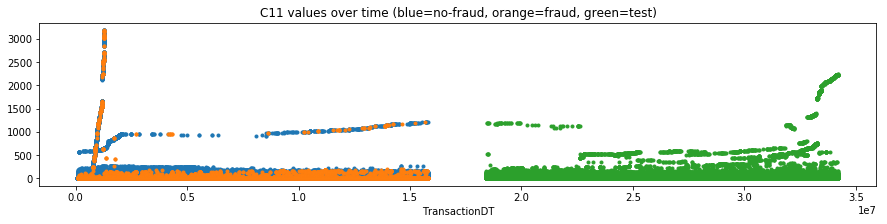

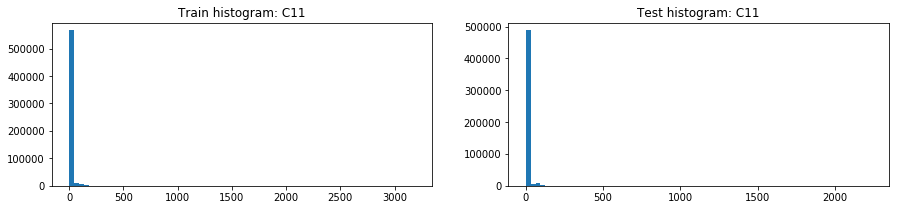

C11          Train      ...          Test public   Test private
0           count  590540.000000      ...        101339.000000  405350.000000
1            mean      10.241521      ...             6.042649       7.845072
2             std      94.336292      ...            31.477895      66.724831
3             min       0.000000      ...             0.000000       0.000000
4             25%       1.000000      ...             1.000000       1.000000
5             50%       1.000000      ...             1.000000       1.000000
6             75%       2.000000      ...             2.000000       2.000000
7             max    3188.000000      ...          1196.000000    2234.000000
8   unique values    1476.000000      ...           246.000000     913.000000
9            NaNs       0.000000      ...             0.000000       3.000000
10     NaNs share       0.000000      ...             0.000000       0.000000

[11 rows x 7 columns]

C11  Count in train (desc)      ...        Sum target  Count in test
0  1.0                 389692      ...              9877       342100.0
1  2.0                  89677      ...              3621        79103.0
2  3.0                  34463      ...              1626        27179.0
3  4.0                  16051      ...              1006        12427.0
4  5.0                   9972      ...               613         6394.0
5  6.0                   5966      ...               422         3686.0
6  7.0                   3663      ...               251         2466.0
7  8.0                   2892      ...               231         1799.0
8  0.0                   1864      ...               127         4909.0
9  9.0                   1805      ...               139         1147.0

[10 rows x 5 columns]

C11  Count in train      ...        Sum target (desc)  Count in test
0   1.0          389692      ...                     9877         342100
1   2.0           89677      ...                     3621          79103
2   3.0           34463      ...                     1626          27179
3   4.0           16051      ...                     1006          12427
4   5.0            9972      ...                      613           6394
5   6.0            5966      ...                      422           3686
6   7.0            3663      ...                      251           2466
7   8.0            2892      ...                      231           1799
8  10.0            1634      ...                      149            934
9   9.0            1805      ...                      139           1147

[10 rows x 5 columns]

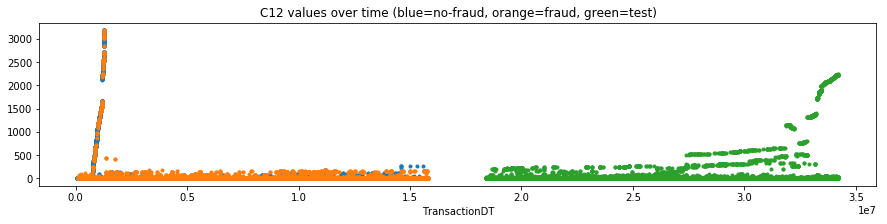

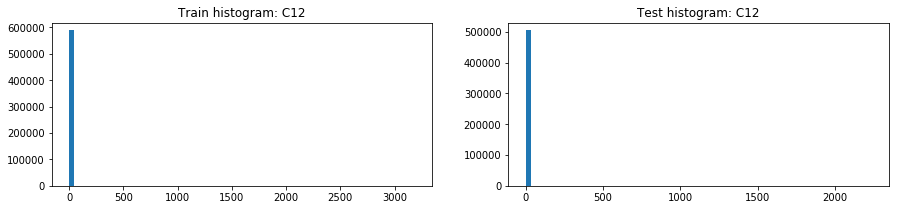

C12          Train      ...         Test public  Test private
0           count  590540.000000      ...       101339.000000  405350.00000
1            mean       4.076227      ...            0.870711       3.09418
2             std      86.666218      ...            9.524789      60.14732
3             min       0.000000      ...            0.000000       0.00000
4             25%       0.000000      ...            0.000000       0.00000
5             50%       0.000000      ...            0.000000       0.00000
6             75%       0.000000      ...            0.000000       1.00000
7             max    3188.000000      ...          240.000000    2234.00000
8   unique values    1199.000000      ...          129.000000     628.00000
9            NaNs       0.000000      ...            0.000000       3.00000
10     NaNs share       0.000000      ...            0.000000       0.00000

[11 rows x 7 columns]

C12  Count in train (desc)      ...        Sum target  Count in test
0  0.0                 489199      ...             11201       366881.0
1  1.0                  76661      ...              4089       108347.0
2  2.0                  12242      ...              1303        17804.0
3  3.0                   4185      ...               684         4980.0
4  4.0                   1716      ...               422         2064.0
5  5.0                   1085      ...               291          997.0
6  6.0                    629      ...               222          876.0
7  7.0                    393      ...               138          432.0
8  8.0                    262      ...               115          349.0
9  9.0                    177      ...                70          227.0

[10 rows x 5 columns]

C12  Count in train      ...        Sum target (desc)  Count in test
0   0.0          489199      ...                    11201         366881
1   1.0           76661      ...                     4089         108347
2   2.0           12242      ...                     1303          17804
3   3.0            4185      ...                      684           4980
4   4.0            1716      ...                      422           2064
5   5.0            1085      ...                      291            997
6   6.0             629      ...                      222            876
7   7.0             393      ...                      138            432
8   8.0             262      ...                      115            349
9  10.0             176      ...                       84            185

[10 rows x 5 columns]

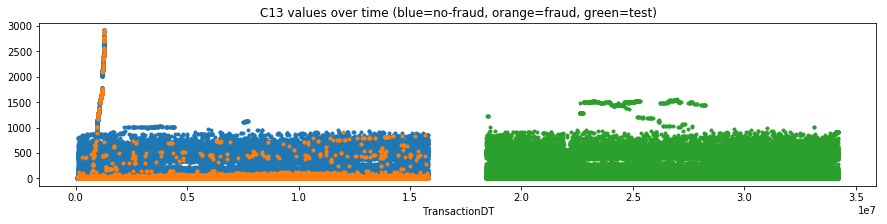

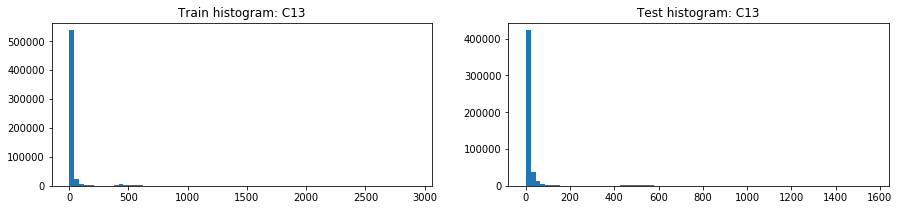

C13          Train      ...          Test public   Test private
0           count  590540.000000      ...        101339.000000  400605.000000
1            mean      32.539918      ...            30.227395      27.205996
2             std     129.364844      ...            99.669624     101.467080
3             min       0.000000      ...             0.000000       0.000000
4             25%       1.000000      ...             1.000000       1.000000
5             50%       3.000000      ...             4.000000       2.000000
6             75%      12.000000      ...            15.000000      12.000000
7             max    2918.000000      ...          1230.000000    1562.000000
8   unique values    1597.000000      ...           797.000000    1062.000000
9            NaNs       0.000000      ...             0.000000    4748.000000
10     NaNs share       0.000000      ...             0.000000       0.011700

[11 rows x 7 columns]

C13  Count in train (desc)      ...        Sum target  Count in test
0  1.0                 199337      ...              5642       168280.0
1  2.0                  57616      ...              2263        49947.0
2  0.0                  35460      ...              5001        29778.0
3  3.0                  33033      ...              1092        27602.0
4  4.0                  23704      ...               852        19240.0
5  5.0                  18355      ...               586        15076.0
6  6.0                  15127      ...               478        12659.0
7  7.0                  13001      ...               384        10885.0
8  8.0                  11424      ...               368         9603.0
9  9.0                  10189      ...               189         8972.0

[10 rows x 5 columns]

C13  Count in train      ...        Sum target (desc)  Count in test
0   1.0          199337      ...                     5642         168280
1   0.0           35460      ...                     5001          29778
2   2.0           57616      ...                     2263          49947
3   3.0           33033      ...                     1092          27602
4   4.0           23704      ...                      852          19240
5   5.0           18355      ...                      586          15076
6   6.0           15127      ...                      478          12659
7   7.0           13001      ...                      384          10885
8   8.0           11424      ...                      368           9603
9  13.0            8032      ...                      247           6945

[10 rows x 5 columns]

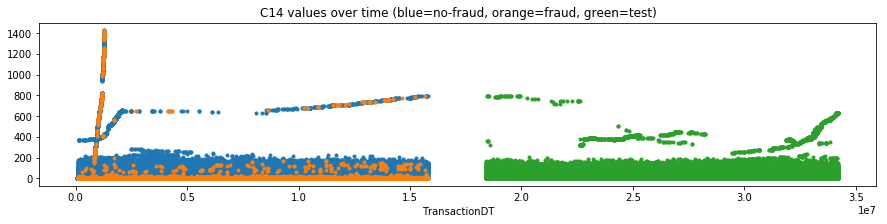

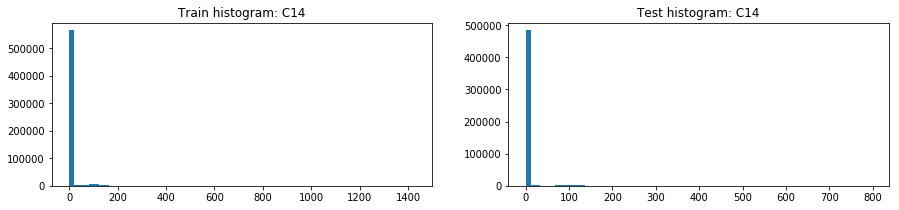

C14          Train      ...          Test public   Test private
0           count  590540.000000      ...        101339.000000  405350.000000
1            mean       8.295215      ...             6.089058       6.082590
2             std      49.544262      ...            25.507991      28.975051
3             min       0.000000      ...             0.000000       0.000000
4             25%       1.000000      ...             1.000000       1.000000
5             50%       1.000000      ...             1.000000       1.000000
6             75%       2.000000      ...             3.000000       2.000000
7             max    1429.000000      ...           797.000000     748.000000
8   unique values    1108.000000      ...           204.000000     548.000000
9            NaNs       0.000000      ...             0.000000       3.000000
10     NaNs share       0.000000      ...             0.000000       0.000000

[11 rows x 7 columns]

C14  Count in train (desc)      ...        Sum target  Count in test
0  1.0                 320189      ...              8600       278331.0
1  2.0                  93843      ...              2596        81914.0
2  3.0                  44471      ...              1198        38444.0
3  0.0                  35947      ...              5214        34564.0
4  4.0                  25390      ...               768        21074.0
5  5.0                  15655      ...               420        11757.0
6  6.0                   8563      ...               282         6781.0
7  7.0                   5030      ...               156         3987.0
8  8.0                   3471      ...               167         2583.0
9  9.0                   2651      ...               172         2203.0

[10 rows x 5 columns]

C14  Count in train      ...        Sum target (desc)  Count in test
0  1.0          320189      ...                     8600         278331
1  0.0           35947      ...                     5214          34564
2  2.0           93843      ...                     2596          81914
3  3.0           44471      ...                     1198          38444
4  4.0           25390      ...                      768          21074
5  5.0           15655      ...                      420          11757
6  6.0            8563      ...                      282           6781
7  9.0            2651      ...                      172           2203
8  8.0            3471      ...                      167           2583
9  7.0            5030      ...                      156           3987

[10 rows x 5 columns]

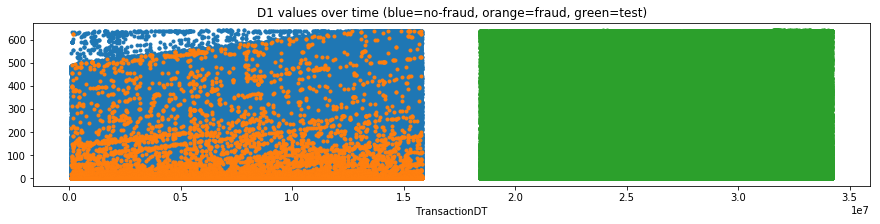

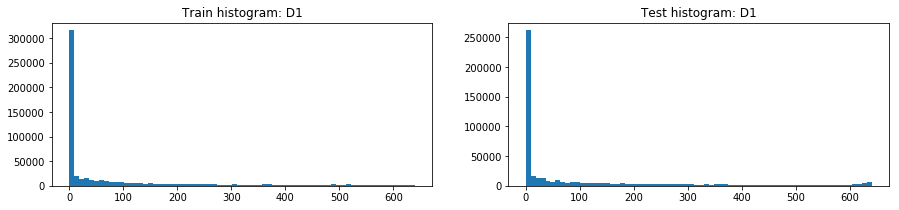

D1          Train      ...          Test public   Test private
0           count  589271.000000      ...        100922.000000  399739.000000
1            mean      94.347568      ...           116.985543     105.991247
2             std     157.660387      ...           180.117849     176.090322
3             min       0.000000      ...             0.000000       0.000000
4             25%       0.000000      ...             0.000000       0.000000
5             50%       3.000000      ...            16.000000       3.000000
6             75%     122.000000      ...           167.000000     142.000000
7             max     640.000000      ...           638.000000     641.000000
8   unique values     642.000000      ...           640.000000     643.000000
9            NaNs    1269.000000      ...           417.000000    5614.000000
10     NaNs share       0.002100      ...             0.004100       0.013800

[11 rows x 7 columns]

D1  Count in train (desc)      ...        Sum target  Count in test
0   0.0                 280130      ...             11789         227724
1   1.0                   8634      ...              1040           8253
2   2.0                   4969      ...               567           5005
3   3.0                   3954      ...               390           4084
4   4.0                   3570      ...               269           3395
5   7.0                   3455      ...               152           3317
6   6.0                   3164      ...               240           2867
7   5.0                   3076      ...               236           2873
8  14.0                   2979      ...               105           2569
9   8.0                   2637      ...               150           2275

[10 rows x 5 columns]

D1  Count in train      ...        Sum target (desc)  Count in test
0  0.0          280130      ...                    11789         227724
1  1.0            8634      ...                     1040           8253
2  2.0            4969      ...                      567           5005
3  3.0            3954      ...                      390           4084
4  4.0            3570      ...                      269           3395
5  6.0            3164      ...                      240           2867
6  5.0            3076      ...                      236           2873
7  9.0            2387      ...                      161           1939
8  7.0            3455      ...                      152           3317
9  8.0            2637      ...                      150           2275

[10 rows x 5 columns]

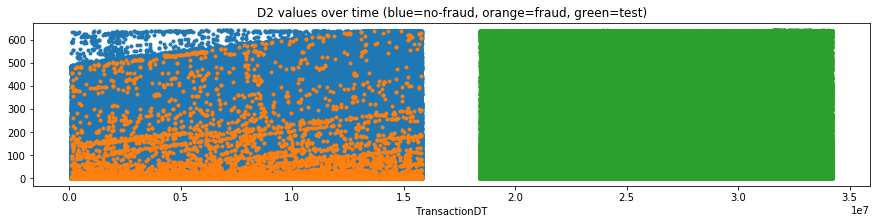

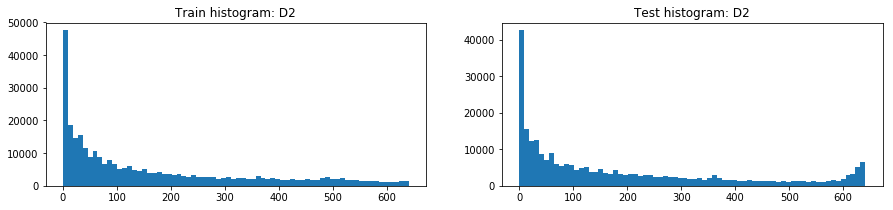

D2          Train      ...         Test public   Test private
0           count  309743.000000      ...        58869.000000  213054.000000
1            mean     169.563231      ...          190.231582     188.233701
2             std     177.315865      ...          195.973461     197.407591
3             min       0.000000      ...            0.000000       0.000000
4             25%      26.000000      ...           29.000000      24.000000
5             50%      97.000000      ...          118.000000     111.000000
6             75%     276.000000      ...          301.000000     307.000000
7             max     640.000000      ...          638.000000     641.000000
8   unique values     642.000000      ...          640.000000     643.000000
9            NaNs  280797.000000      ...        42470.000000  192299.000000
10     NaNs share       0.475500      ...            0.419100       0.474400

[11 rows x 7 columns]

D2  Count in train (desc)      ...        Sum target  Count in test
0 -999.0                 280797      ...             12793         234769
1    0.0                  15124      ...               935          11944
2    1.0                   6654      ...               765           6467
3    2.0                   4454      ...               443           4445
4    3.0                   3677      ...               326           3829
5    4.0                   3344      ...               212           3162
6    7.0                   3331      ...               121           3198
7    6.0                   3068      ...               207           2771
8    5.0                   2972      ...               197           2752
9   14.0                   2919      ...                87           2477

[10 rows x 5 columns]

D2  Count in train      ...        Sum target (desc)  Count in test
0 -999.0          280797      ...                    12793         234769
1    0.0           15124      ...                      935          11944
2    1.0            6654      ...                      765           6467
3    2.0            4454      ...                      443           4445
4    3.0            3677      ...                      326           3829
5    4.0            3344      ...                      212           3162
6    6.0            3068      ...                      207           2771
7    5.0            2972      ...                      197           2752
8    7.0            3331      ...                      121           3198
9    8.0            2593      ...                      110           2140

[10 rows x 5 columns]

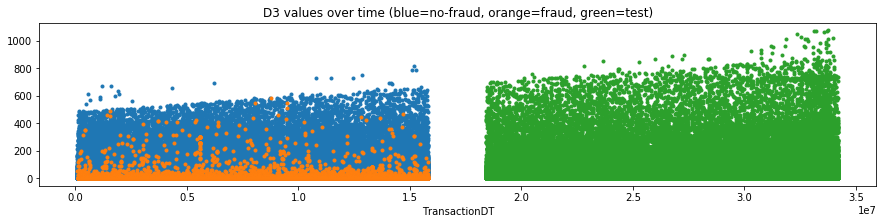

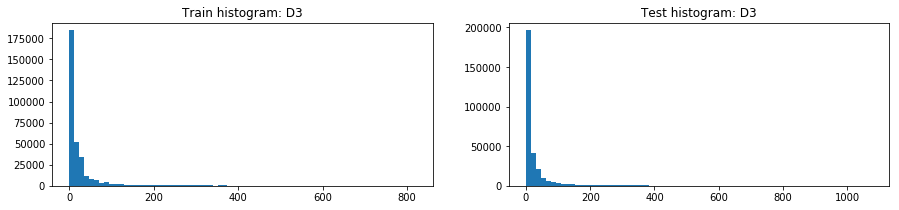

D3          Train      ...         Test public   Test private
0           count  327662.000000      ...        63607.000000  239943.000000
1            mean      28.343348      ...           29.559294      34.411381
2             std      62.384721      ...           68.249815      85.924044
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       8.000000      ...            8.000000       7.000000
6             75%      27.000000      ...           28.000000      28.000000
7             max     819.000000      ...          754.000000    1076.000000
8   unique values     650.000000      ...          654.000000     888.000000
9            NaNs  262878.000000      ...        37732.000000  165410.000000
10     NaNs share       0.445100      ...            0.372300       0.408100

[11 rows x 7 columns]

D3  Count in train (desc)      ...        Sum target  Count in test
0 -999.0                 262878      ...             11044       203142.0
1    0.0                  73094      ...              4404        73232.0
2    1.0                  21258      ...              1475        20276.0
3    2.0                  13789      ...               645        13103.0
4    7.0                  13320      ...               200        11442.0
5    3.0                  10786      ...               345        10226.0
6    4.0                   9552      ...               249         8664.0
7   14.0                   9547      ...               108         8060.0
8    6.0                   9245      ...               187         8093.0
9    5.0                   8800      ...               197         7722.0

[10 rows x 5 columns]

D3  Count in train      ...        Sum target (desc)  Count in test
0 -999.0          262878      ...                    11044         203142
1    0.0           73094      ...                     4404          73232
2    1.0           21258      ...                     1475          20276
3    2.0           13789      ...                      645          13103
4    3.0           10786      ...                      345          10226
5    4.0            9552      ...                      249           8664
6    7.0           13320      ...                      200          11442
7    5.0            8800      ...                      197           7722
8    6.0            9245      ...                      187           8093
9    8.0            8092      ...                      131           6859

[10 rows x 5 columns]

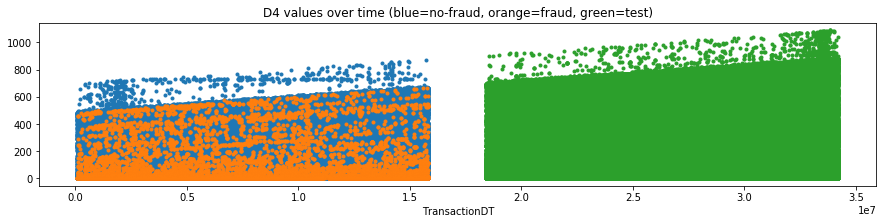

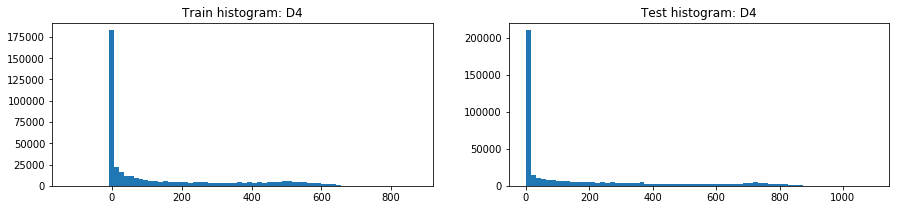

D4          Train      ...         Test public   Test private
0           count  421618.000000      ...        80248.000000  349593.000000
1            mean     140.002441      ...          180.750735     173.754323
2             std     191.096774      ...          233.899500     254.039684
3             min    -122.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%      26.000000      ...           54.000000      14.000000
6             75%     253.000000      ...          313.000000     284.000000
7             max     869.000000      ...          924.000000    1091.000000
8   unique values     809.000000      ...          779.000000    1056.000000
9            NaNs  168922.000000      ...        21091.000000   55760.000000
10     NaNs share       0.286000      ...            0.208100       0.137600

[11 rows x 7 columns]

D4  Count in train (desc)      ...        Sum target  Count in test
0 -999.0                 168922      ...              6096        76851.0
1    0.0                 166571      ...              6603       178278.0
2    1.0                   5315      ...               770         5750.0
3    2.0                   3385      ...               427         3502.0
4    3.0                   2572      ...               279         2871.0
5    4.0                   2354      ...               200         2459.0
6    7.0                   2317      ...               141         2165.0
7    5.0                   2172      ...               219         2125.0
8   14.0                   2117      ...                70         1644.0
9    6.0                   2038      ...               151         2093.0

[10 rows x 5 columns]

D4  Count in train      ...        Sum target (desc)  Count in test
0    0.0          166571      ...                     6603         178278
1 -999.0          168922      ...                     6096          76851
2    1.0            5315      ...                      770           5750
3    2.0            3385      ...                      427           3502
4    3.0            2572      ...                      279           2871
5    5.0            2172      ...                      219           2125
6    4.0            2354      ...                      200           2459
7    6.0            2038      ...                      151           2093
8    7.0            2317      ...                      141           2165
9    9.0            1548      ...                      125           1241

[10 rows x 5 columns]

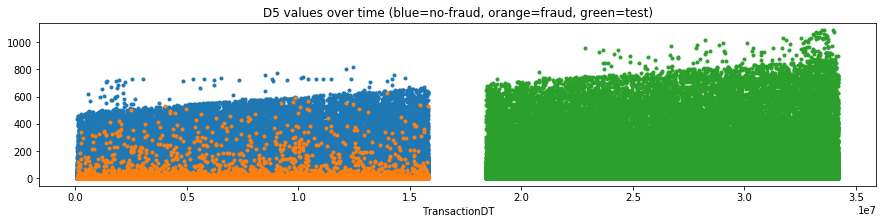

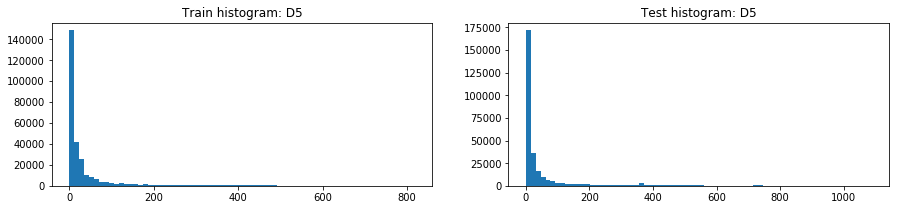

D5          Train      ...         Test public   Test private
0           count  280699.000000      ...        58085.000000  224232.000000
1            mean      42.335965      ...           42.060222      53.287649
2             std      89.000144      ...           94.246337     121.893591
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       0.000000
5             50%      10.000000      ...            9.000000       8.000000
6             75%      32.000000      ...           32.000000      34.000000
7             max     819.000000      ...          779.000000    1088.000000
8   unique values     689.000000      ...          711.000000     962.000000
9            NaNs  309841.000000      ...        43254.000000  181121.000000
10     NaNs share       0.524700      ...            0.426800       0.446800

[11 rows x 7 columns]

D5  Count in train (desc)      ...        Sum target  Count in test
0 -999.0                 309841      ...              9783         224375
1    0.0                  65377      ...              6638          73887
2    1.0                  15282      ...              1006          15642
3    2.0                  10244      ...               451          10188
4    7.0                   9734      ...               149           9103
5    3.0                   7987      ...               270           7977
6   14.0                   7340      ...                61           6557
7    4.0                   7176      ...               198           6755
8    6.0                   6907      ...               141           6521
9    5.0                   6696      ...               168           6196

[10 rows x 5 columns]

D5  Count in train      ...        Sum target (desc)  Count in test
0 -999.0          309841      ...                     9783         224375
1    0.0           65377      ...                     6638          73887
2    1.0           15282      ...                     1006          15642
3    2.0           10244      ...                      451          10188
4    3.0            7987      ...                      270           7977
5    4.0            7176      ...                      198           6755
6    5.0            6696      ...                      168           6196
7    7.0            9734      ...                      149           9103
8    6.0            6907      ...                      141           6521
9    8.0            6140      ...                      114           5549

[10 rows x 5 columns]

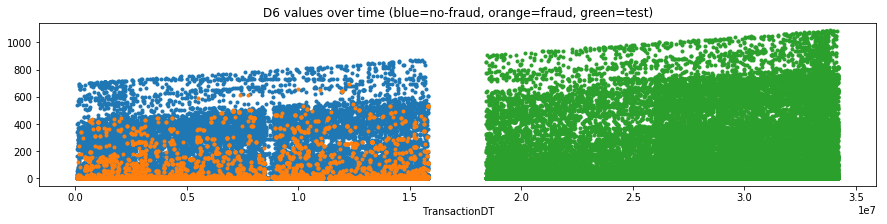

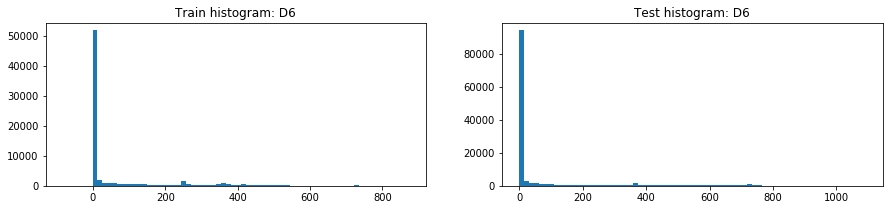

D6          Train      ...         Test public   Test private
0           count   73187.000000      ...        11194.000000  113589.000000
1            mean      69.805717      ...           89.538503      81.743910
2             std     143.669253      ...          178.595333     194.204124
3             min     -83.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%      40.000000      ...           68.750000      10.000000
7             max     873.000000      ...          939.000000    1091.000000
8   unique values     830.000000      ...          726.000000    1072.000000
9            NaNs  517353.000000      ...        90145.000000  291764.000000
10     NaNs share       0.876100      ...            0.889500       0.719800

[11 rows x 7 columns]

D6  Count in train (desc)      ...        Sum target  Count in test
0 -999.0                 517353      ...             12945       381908.0
1    0.0                  45782      ...              4253        83120.0
2    1.0                   1588      ...               415         2475.0
3  256.0                    895      ...                11           22.0
4    2.0                    855      ...               184         1482.0
5    3.0                    642      ...               134         1192.0
6    4.0                    579      ...                83          927.0
7    5.0                    436      ...               103          783.0
8    7.0                    380      ...                70          717.0
9    6.0                    353      ...                50          710.0

[10 rows x 5 columns]

D6  Count in train      ...        Sum target (desc)  Count in test
0 -999.0          517353      ...                    12945         381908
1    0.0           45782      ...                     4253          83120
2    1.0            1588      ...                      415           2475
3    2.0             855      ...                      184           1482
4    3.0             642      ...                      134           1192
5    5.0             436      ...                      103            783
6    4.0             579      ...                       83            927
7    7.0             380      ...                       70            717
8    9.0             258      ...                       55            352
9    8.0             288      ...                       52            474

[10 rows x 5 columns]

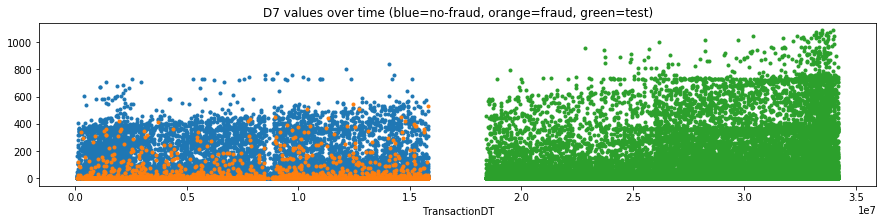

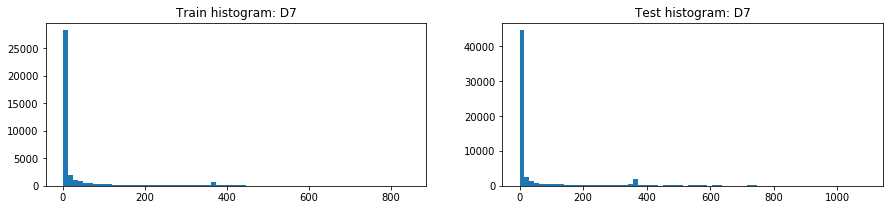

D7          Train      ...         Test public   Test private
0           count   38917.000000      ...         7160.000000   52973.000000
1            mean      41.638950      ...           33.610615      65.627924
2             std      99.743264      ...           94.096670     155.963738
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%      17.000000      ...            9.000000      20.000000
7             max     843.000000      ...          798.000000    1088.000000
8   unique values     598.000000      ...          440.000000     904.000000
9            NaNs  551623.000000      ...        94179.000000  352380.000000
10     NaNs share       0.934100      ...            0.929300       0.869300

[11 rows x 7 columns]

D7  Count in train (desc)      ...        Sum target  Count in test
0 -999.0                 551623      ...             14873       446558.0
1    0.0                  21135      ...              4472        31939.0
2    1.0                   1717      ...               243         2868.0
3    2.0                    998      ...               108         1850.0
4    3.0                    791      ...                68         1296.0
5    7.0                    606      ...                36          886.0
6    4.0                    601      ...                56         1004.0
7    5.0                    513      ...                50          852.0
8    6.0                    435      ...                32          792.0
9    8.0                    387      ...                31          567.0

[10 rows x 5 columns]

D7  Count in train      ...        Sum target (desc)  Count in test
0 -999.0          551623      ...                    14873         446558
1    0.0           21135      ...                     4472          31939
2    1.0            1717      ...                      243           2868
3    2.0             998      ...                      108           1850
4    3.0             791      ...                       68           1296
5    4.0             601      ...                       56           1004
6    5.0             513      ...                       50            852
7    7.0             606      ...                       36            886
8    6.0             435      ...                       32            792
9    8.0             387      ...                       31            567

[10 rows x 5 columns]

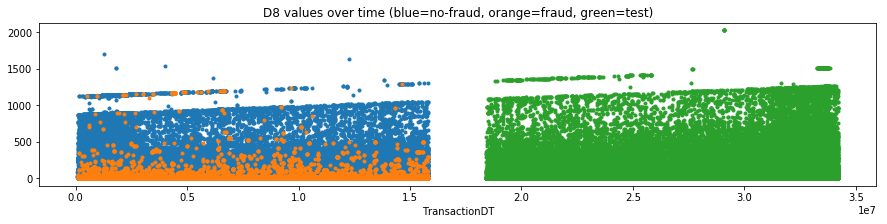

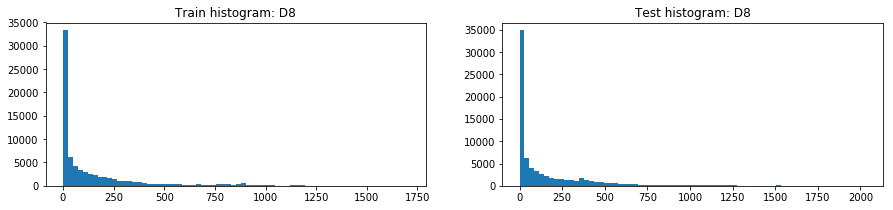

D8          Train      ...         Test public   Test private
0           count   74926.000000      ...        10200.000000   64138.000000
1            mean     146.058108      ...          146.638799     163.092053
2             std     231.663840      ...          249.691565     258.077466
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.958333      ...            0.916666       1.208333
5             50%      37.875000      ...           30.916666      38.875000
6             75%     187.958328      ...          182.875000     227.750000
7             max    1707.791626      ...         1373.041626    2029.583374
8   unique values   12354.000000      ...         3683.000000   12457.000000
9            NaNs  515614.000000      ...        91139.000000  341215.000000
10     NaNs share       0.873100      ...            0.899300       0.841800

[11 rows x 7 columns]

D8  Count in train (desc)      ...        Sum target  Count in test
0 -999.000000                 515614      ...             12836       432353.0
1    0.791666                   1351      ...               242         1263.0
2    0.833333                   1327      ...               210         1282.0
3    0.875000                   1304      ...               260         1299.0
4    0.958333                   1300      ...               257         1180.0
5    0.916666                   1259      ...               228         1132.0
6    0.750000                   1248      ...               217         1107.0
7    0.708333                   1175      ...               144         1038.0
8    0.083333                   1118      ...               187         1083.0
9    0.666666                   1097      ...               133         1075.0

[10 rows x 5 columns]

D8  Count in train      ...        Sum target (desc)  Count in test
0 -999.000000          515614      ...                    12836         432353
1    0.875000            1304      ...                      260           1299
2    0.958333            1300      ...                      257           1180
3    0.791666            1351      ...                      242           1263
4    0.916666            1259      ...                      228           1132
5    0.750000            1248      ...                      217           1107
6    0.833333            1327      ...                      210           1282
7    0.083333            1118      ...                      187           1083
8    0.000000             835      ...                      170            763
9    0.125000            1028      ...                      167           1052

[10 rows x 5 columns]

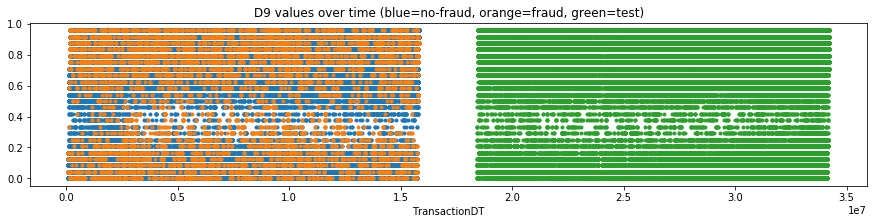

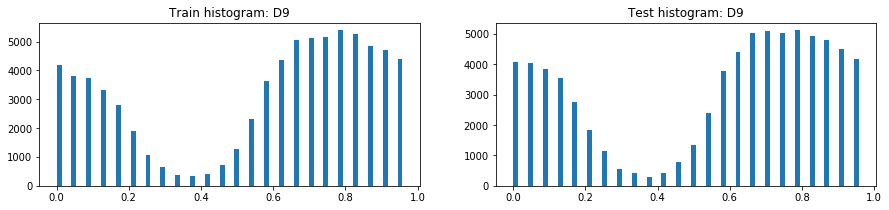

D9          Train      ...         Test public   Test private
0           count   74926.000000      ...        10200.000000   64138.000000
1            mean       0.561057      ...            0.554093       0.553963
2             std       0.316880      ...            0.314076       0.317843
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.208333      ...            0.208333       0.208333
5             50%       0.666666      ...            0.666666       0.666666
6             75%       0.833333      ...            0.791666       0.791666
7             max       0.958333      ...            0.958333       0.958333
8   unique values      25.000000      ...           25.000000      25.000000
9            NaNs  515614.000000      ...        91139.000000  341215.000000
10     NaNs share       0.873100      ...            0.899300       0.841800

[11 rows x 7 columns]

D9  Count in train (desc)      ...        Sum target  Count in test
0 -999.000000                 515614      ...             12836         432353
1    0.791666                   5388      ...               516           5111
2    0.833333                   5273      ...               502           4939
3    0.750000                   5147      ...               473           5033
4    0.708333                   5132      ...               414           5106
5    0.666666                   5069      ...               380           5021
6    0.875000                   4857      ...               517           4805
7    0.916666                   4694      ...               499           4503
8    0.958333                   4411      ...               533           4179
9    0.625000                   4380      ...               262           4415

[10 rows x 5 columns]

D9  Count in train      ...        Sum target (desc)  Count in test
0 -999.000000          515614      ...                    12836         432353
1    0.958333            4411      ...                      533           4179
2    0.875000            4857      ...                      517           4805
3    0.791666            5388      ...                      516           5111
4    0.833333            5273      ...                      502           4939
5    0.916666            4694      ...                      499           4503
6    0.750000            5147      ...                      473           5033
7    0.083333            3726      ...                      461           3841
8    0.000000            4190      ...                      454           4062
9    0.166666            2786      ...                      421           2760

[10 rows x 5 columns]

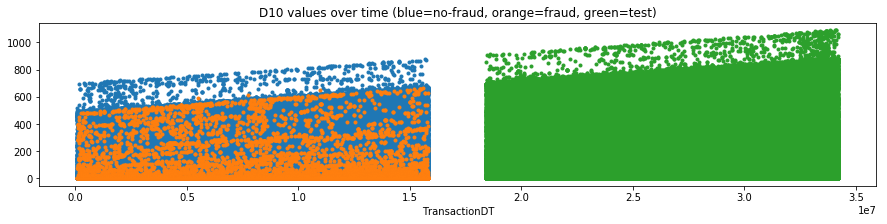

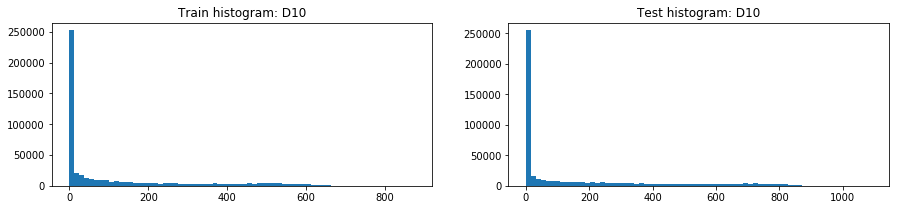

D10          Train      ...         Test public   Test private
0           count  514518.000000      ...        93904.000000  400243.000000
1            mean     123.982137      ...          166.648183     158.206127
2             std     182.615225      ...          226.360455     243.751914
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%      15.000000      ...           42.000000       4.000000
6             75%     197.000000      ...          266.000000     246.000000
7             max     876.000000      ...          947.000000    1091.000000
8   unique values     819.000000      ...          820.000000    1076.000000
9            NaNs   76022.000000      ...         7435.000000    5110.000000
10     NaNs share       0.128700      ...            0.073400       0.012600

[11 rows x 7 columns]

D10  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 221930      ...             10541         227999
1 -999.0                  76022      ...              3886          12545
2    1.0                   5186      ...               542           4298
3    2.0                   3482      ...               339           2782
4    3.0                   2756      ...               189           2169
5    7.0                   2740      ...               115           1817
6   14.0                   2512      ...                61           1698
7    5.0                   2377      ...               125           1670
8   28.0                   2346      ...                38           1453
9    4.0                   2344      ...               147           1945

[10 rows x 5 columns]

D10  Count in train      ...        Sum target (desc)  Count in test
0    0.0          221930      ...                    10541         227999
1 -999.0           76022      ...                     3886          12545
2    1.0            5186      ...                      542           4298
3    2.0            3482      ...                      339           2782
4    3.0            2756      ...                      189           2169
5    4.0            2344      ...                      147           1945
6    5.0            2377      ...                      125           1670
7    7.0            2740      ...                      115           1817
8    6.0            2303      ...                      103           1688
9    9.0            1769      ...                       88           1132

[10 rows x 5 columns]

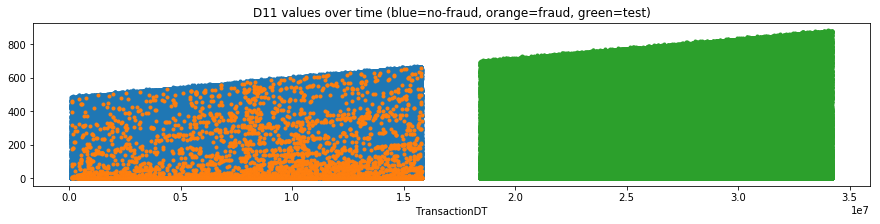

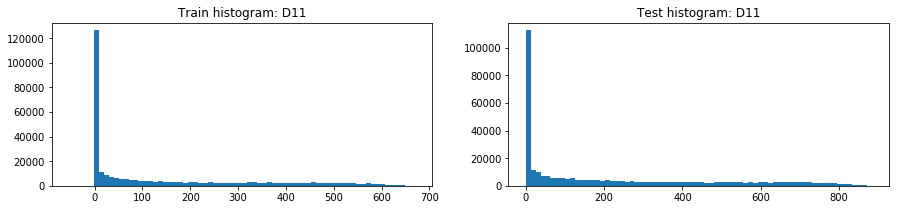

D11          Train      ...         Test public   Test private
0           count  311253.000000      ...        74232.000000  255942.000000
1            mean     146.621465      ...          197.138943     224.585117
2             std     186.042622      ...          227.897598     259.616540
3             min     -53.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%      43.000000      ...           93.000000     106.000000
6             75%     274.000000      ...          366.000000     412.000000
7             max     670.000000      ...          742.000000     883.000000
8   unique values     677.000000      ...          739.000000     881.000000
9            NaNs  279287.000000      ...        27107.000000  149411.000000
10     NaNs share       0.472900      ...            0.267500       0.368600

[11 rows x 7 columns]

D11  Count in train (desc)      ...        Sum target  Count in test
0 -999.0                 279287      ...             14557       176518.0
1    0.0                 112281      ...              2192        93125.0
2    1.0                   3165      ...               278         3812.0
3    2.0                   2020      ...               168         2334.0
4    3.0                   1642      ...               128         1889.0
5    7.0                   1639      ...                70         1564.0
6   14.0                   1496      ...                31         1403.0
7    4.0                   1449      ...               112         1709.0
8    6.0                   1440      ...                90         1553.0
9    5.0                   1424      ...                75         1414.0

[10 rows x 5 columns]

D11  Count in train      ...        Sum target (desc)  Count in test
0 -999.0          279287      ...                    14557         176518
1    0.0          112281      ...                     2192          93125
2    1.0            3165      ...                      278           3812
3    2.0            2020      ...                      168           2334
4    3.0            1642      ...                      128           1889
5    4.0            1449      ...                      112           1709
6    6.0            1440      ...                       90           1553
7    5.0            1424      ...                       75           1414
8    7.0            1639      ...                       70           1564
9   11.0            1011      ...                       56            993

[10 rows x 5 columns]

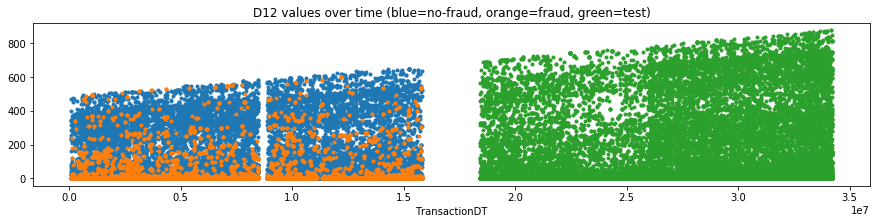

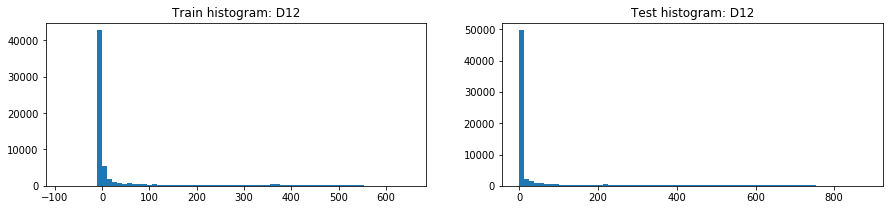

D12          Train      ...         Test public   Test private
0           count   64717.000000      ...         9801.000000   59453.000000
1            mean      54.037533      ...           69.285787      78.742519
2             std     124.274558      ...          154.518366     179.510165
3             min     -83.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%      13.000000      ...           24.000000      25.000000
7             max     648.000000      ...          728.000000     879.000000
8   unique values     636.000000      ...          602.000000     867.000000
9            NaNs  525823.000000      ...        91538.000000  345900.000000
10     NaNs share       0.890400      ...            0.903300       0.853300

[11 rows x 7 columns]

D12  Count in train (desc)      ...        Sum target  Count in test
0 -999.0                 525823      ...             13065       437437.0
1    0.0                  42756      ...              4219        40855.0
2    1.0                   1526      ...               420         2043.0
3    2.0                    818      ...               183         1272.0
4    3.0                    634      ...               139         1061.0
5    4.0                    564      ...                80          798.0
6    5.0                    418      ...               100          691.0
7    7.0                    373      ...                73          658.0
8    6.0                    341      ...                50          630.0
9    8.0                    273      ...                49          414.0

[10 rows x 5 columns]

D12  Count in train      ...        Sum target (desc)  Count in test
0 -999.0          525823      ...                    13065         437437
1    0.0           42756      ...                     4219          40855
2    1.0            1526      ...                      420           2043
3    2.0             818      ...                      183           1272
4    3.0             634      ...                      139           1061
5    5.0             418      ...                      100            691
6    4.0             564      ...                       80            798
7    7.0             373      ...                       73            658
8    9.0             249      ...                       54            309
9    6.0             341      ...                       50            630

[10 rows x 5 columns]

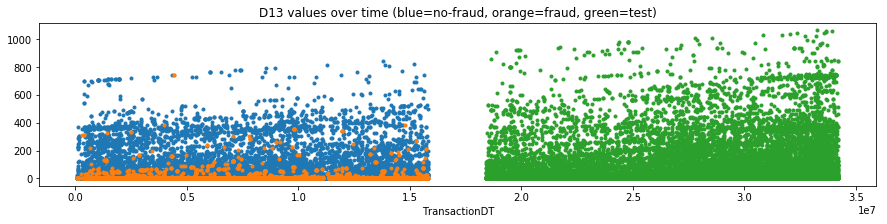

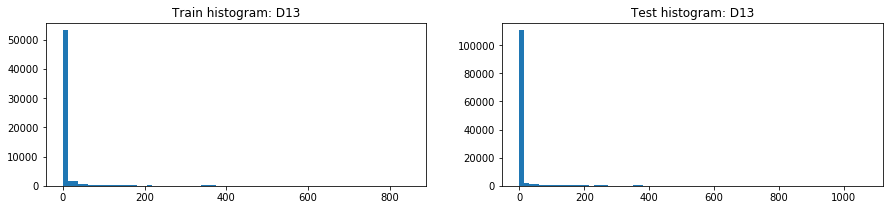

D13          Train      ...         Test public   Test private
0           count   61952.000000      ...        10039.000000  113345.000000
1            mean      17.901295      ...           24.144138      17.701787
2             std      67.614425      ...           82.980232      77.609589
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            1.000000       0.000000
7             max     847.000000      ...          946.000000    1066.000000
8   unique values     578.000000      ...          398.000000     790.000000
9            NaNs  528588.000000      ...        91300.000000  292008.000000
10     NaNs share       0.895100      ...            0.900900       0.720400

[11 rows x 7 columns]

D13  Count in train (desc)      ...        Sum target  Count in test
0 -999.0                 528588      ...             13826       383307.0
1    0.0                  48840      ...              5428       101387.0
2    1.0                   1097      ...               250         2103.0
3   26.0                    891      ...                 1          118.0
4    2.0                    623      ...               181         1294.0
5    3.0                    476      ...                94          898.0
6    4.0                    366      ...                64          702.0
7   19.0                    343      ...                 0          158.0
8    5.0                    316      ...                64          552.0
9    7.0                    303      ...                48          623.0

[10 rows x 5 columns]

D13  Count in train      ...        Sum target (desc)  Count in test
0 -999.0          528588      ...                    13826         383307
1    0.0           48840      ...                     5428         101387
2    1.0            1097      ...                      250           2103
3    2.0             623      ...                      181           1294
4    3.0             476      ...                       94            898
5    4.0             366      ...                       64            702
6    5.0             316      ...                       64            552
7    7.0             303      ...                       48            623
8    9.0             203      ...                       45            355
9    6.0             262      ...                       43            584

[10 rows x 5 columns]

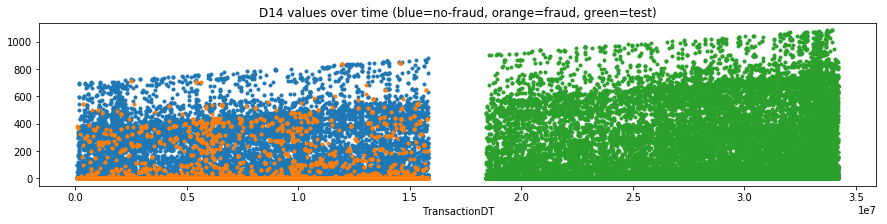

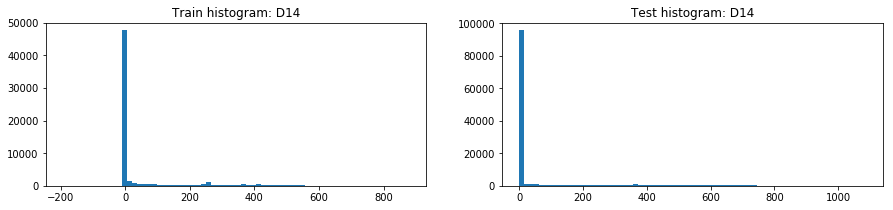

D14          Train      ...         Test public   Test private
0           count   62187.000000      ...         9735.000000  105459.000000
1            mean      57.724444      ...           76.289985      56.489887
2             std     136.312450      ...          168.656158     163.480027
3             min    -193.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       2.000000      ...           17.000000       0.000000
7             max     878.000000      ...          938.000000    1085.000000
8   unique values     803.000000      ...          648.000000    1029.000000
9            NaNs  528353.000000      ...        91604.000000  299894.000000
10     NaNs share       0.894700      ...            0.903900       0.739800

[11 rows x 7 columns]

D14  Count in train (desc)      ...        Sum target  Count in test
0 -999.0                 528353      ...             13450       391497.0
1    0.0                  45266      ...              4434        89500.0
2    1.0                   1105      ...               399         1744.0
3  256.0                    658      ...                 1           19.0
4    2.0                    495      ...               197          740.0
5    3.0                    307      ...                96          498.0
6  249.0                    284      ...                 0           15.0
7    4.0                    260      ...                61          531.0
8    7.0                    233      ...                44          363.0
9    5.0                    210      ...                46          478.0

[10 rows x 5 columns]

D14  Count in train      ...        Sum target (desc)  Count in test
0 -999.0          528353      ...                    13450         391497
1    0.0           45266      ...                     4434          89500
2    1.0            1105      ...                      399           1744
3    2.0             495      ...                      197            740
4    3.0             307      ...                       96            498
5    4.0             260      ...                       61            531
6    8.0             158      ...                       50            234
7    5.0             210      ...                       46            478
8    7.0             233      ...                       44            363
9    6.0             183      ...                       44            333

[10 rows x 5 columns]

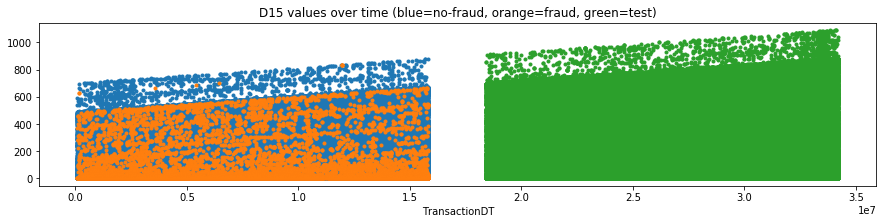

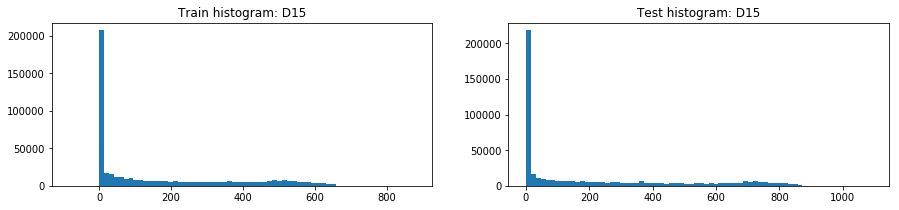

D15          Train      ...         Test public   Test private
0           count  501427.000000      ...        94029.000000  400594.000000
1            mean     163.744579      ...          216.941571     204.486061
2             std     202.726660      ...          250.887517     273.533320
3             min     -83.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%      52.000000      ...           99.000000      35.000000
6             75%     314.000000      ...          406.000000     365.000000
7             max     879.000000      ...          948.000000    1091.000000
8   unique values     860.000000      ...          850.000000    1079.000000
9            NaNs   89113.000000      ...         7310.000000    4759.000000
10     NaNs share       0.150900      ...            0.072100       0.011700

[11 rows x 7 columns]

D15  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 174246      ...              7886       183720.0
1 -999.0                  89113      ...              4276        12069.0
2    1.0                   5936      ...               716         6202.0
3    2.0                   3691      ...               440         3793.0
4    3.0                   2878      ...               265         3106.0
5    7.0                   2577      ...               134         2360.0
6    4.0                   2573      ...               184         2747.0
7    5.0                   2336      ...               178         2202.0
8    6.0                   2276      ...               137         2276.0
9   14.0                   2265      ...                89         1853.0

[10 rows x 5 columns]

D15  Count in train      ...        Sum target (desc)  Count in test
0    0.0          174246      ...                     7886         183720
1 -999.0           89113      ...                     4276          12069
2    1.0            5936      ...                      716           6202
3    2.0            3691      ...                      440           3793
4    3.0            2878      ...                      265           3106
5    4.0            2573      ...                      184           2747
6    5.0            2336      ...                      178           2202
7    6.0            2276      ...                      137           2276
8    7.0            2577      ...                      134           2360
9    8.0            1973      ...                      119           1674

[10 rows x 5 columns]

M1   Train     ...      Test public Test private
0          count  319440     ...            74212       255841
1         unique       2     ...                2            2
2            top       T     ...                T            T
3           freq  319415     ...            74202       255820
4  unique values       3     ...                3            3
5           NaNs  271100     ...            27127       149512
6     NaNs share  0.4591     ...           0.2677       0.3688

[7 rows x 7 columns]

M1  Count in train (desc)      ...        Sum target  Count in test
0     T                 319415      ...              6342         330021
1  -999                 271100      ...             14321         176639
2     F                     25      ...                 0             31

[3 rows x 5 columns]

M1  Count in train      ...        Sum target (desc)  Count in test
0  -999          271100      ...                    14321         176639
1     T          319415      ...                     6342         330021
2     F              25      ...                        0             31

[3 rows x 5 columns]

M2   Train     ...      Test public Test private
0          count  319440     ...            74212       255841
1         unique       2     ...                2            2
2            top       T     ...                T            T
3           freq  285468     ...            67868       234988
4  unique values       3     ...                3            3
5           NaNs  271100     ...            27127       149512
6     NaNs share  0.4591     ...           0.2677       0.3688

[7 rows x 7 columns]

M2  Count in train (desc)      ...        Sum target  Count in test
0     T                 285468      ...              5158         302855
1  -999                 271100      ...             14321         176639
2     F                  33972      ...              1184          27197

[3 rows x 5 columns]

M2  Count in train      ...        Sum target (desc)  Count in test
0  -999          271100      ...                    14321         176639
1     T          285468      ...                     5158         302855
2     F           33972      ...                     1184          27197

[3 rows x 5 columns]

M3   Train     ...      Test public Test private
0          count  319440     ...            74212       255841
1         unique       2     ...                2            2
2            top       T     ...                T            T
3           freq  251731     ...            59925       206589
4  unique values       3     ...                3            3
5           NaNs  271100     ...            27127       149512
6     NaNs share  0.4591     ...           0.2677       0.3688

[7 rows x 7 columns]

M3  Count in train (desc)      ...        Sum target  Count in test
0  -999                 271100      ...             14321         176639
1     T                 251731      ...              4293         266513
2     F                  67709      ...              2049          63539

[3 rows x 5 columns]

M3  Count in train      ...        Sum target (desc)  Count in test
0  -999          271100      ...                    14321         176639
1     T          251731      ...                     4293         266513
2     F           67709      ...                     2049          63539

[3 rows x 5 columns]

M4   Train     ...      Test public Test private
0          count  309096     ...            55401       213545
1         unique       3     ...                3            3
2            top      M0     ...               M0           M0
3           freq  196405     ...            35921       125463
4  unique values       4     ...                4            4
5           NaNs  281444     ...            45938       191808
6     NaNs share  0.4766     ...           0.4533       0.4732

[7 rows x 7 columns]

M4  Count in train (desc)      ...        Sum target  Count in test
0  -999                 281444      ...              5227         237745
1    M0                 196405      ...              7198         161384
2    M2                  59865      ...              6809          63082
3    M1                  52826      ...              1429          44480

[4 rows x 5 columns]

M4  Count in train      ...        Sum target (desc)  Count in test
0    M0          196405      ...                     7198         161384
1    M2           59865      ...                     6809          63082
2  -999          281444      ...                     5227         237745
3    M1           52826      ...                     1429          44480

[4 rows x 5 columns]

M5   Train     ...      Test public Test private
0          count  240058     ...            45022       152037
1         unique       2     ...                2            2
2            top       F     ...                F            F
3           freq  132491     ...            24466        83198
4  unique values       3     ...                3            3
5           NaNs  350482     ...            56317       253316
6     NaNs share  0.5935     ...           0.5557       0.6249

[7 rows x 7 columns]

M5  Count in train (desc)      ...        Sum target  Count in test
0  -999                 350482      ...             13094         309632
1     F                 132491      ...              3514         107664
2     T                 107567      ...              4055          89395

[3 rows x 5 columns]

M5  Count in train      ...        Sum target (desc)  Count in test
0  -999          350482      ...                    13094         309632
1     T          107567      ...                     4055          89395
2     F          132491      ...                     3514         107664

[3 rows x 5 columns]

M6   Train     ...      Test public Test private
0          count  421180     ...            79525       268228
1         unique       2     ...                2            2
2            top       F     ...                F            F
3           freq  227856     ...            43280       148298
4  unique values       3     ...                3            3
5           NaNs  169360     ...            21814       137125
6     NaNs share  0.2868     ...           0.2153       0.3383

[7 rows x 7 columns]

M6  Count in train (desc)      ...        Sum target  Count in test
0     F                 227856      ...              5397         191577
1     T                 193324      ...              3295         156175
2  -999                 169360      ...             11971         158939

[3 rows x 5 columns]

M6  Count in train      ...        Sum target (desc)  Count in test
0  -999          169360      ...                    11971         158939
1     F          227856      ...                     5397         191577
2     T          193324      ...                     3295         156175

[3 rows x 5 columns]

M7   Train     ...      Test public Test private
0          count  244275     ...            61993       209681
1         unique       2     ...                2            2
2            top       F     ...                F            F
3           freq  211374     ...            53284       179947
4  unique values       3     ...                3            3
5           NaNs  346265     ...            39346       195672
6     NaNs share  0.5864     ...           0.3883       0.4827

[7 rows x 7 columns]

M7  Count in train (desc)      ...        Sum target  Count in test
0  -999                 346265      ...             15846         235018
1     F                 211374      ...              4089         233230
2     T                  32901      ...               728          38443

[3 rows x 5 columns]

M7  Count in train      ...        Sum target (desc)  Count in test
0  -999          346265      ...                    15846         235018
1     F          211374      ...                     4089         233230
2     T           32901      ...                      728          38443

[3 rows x 5 columns]

M8   Train     ...      Test public Test private
0          count  244288     ...            61998       209690
1         unique       2     ...                2            2
2            top       F     ...                F            F
3           freq  155251     ...            38420       129980
4  unique values       3     ...                3            3
5           NaNs  346252     ...            39341       195663
6     NaNs share  0.5863     ...           0.3882       0.4827

[7 rows x 7 columns]

M8  Count in train (desc)      ...        Sum target  Count in test
0  -999                 346252      ...             15846         235004
1     F                 155251      ...              3373         168399
2     T                  89037      ...              1444         103288

[3 rows x 5 columns]

M8  Count in train      ...        Sum target (desc)  Count in test
0  -999          346252      ...                    15846         235004
1     F          155251      ...                     3373         168399
2     T           89037      ...                     1444         103288

[3 rows x 5 columns]

M9   Train     ...      Test public Test private
0          count  244288     ...            61998       209690
1         unique       2     ...                2            2
2            top       T     ...                T            T
3           freq  205656     ...            53776       182503
4  unique values       3     ...                3            3
5           NaNs  346252     ...            39341       195663
6     NaNs share  0.5863     ...           0.3882       0.4827

[7 rows x 7 columns]

M9  Count in train (desc)      ...        Sum target  Count in test
0  -999                 346252      ...             15846         235004
1     T                 205656      ...              3658         236279
2     F                  38632      ...              1159          35408

[3 rows x 5 columns]

M9  Count in train      ...        Sum target (desc)  Count in test
0  -999          346252      ...                    15846         235004
1     T          205656      ...                     3658         236279
2     F           38632      ...                     1159          35408

[3 rows x 5 columns]

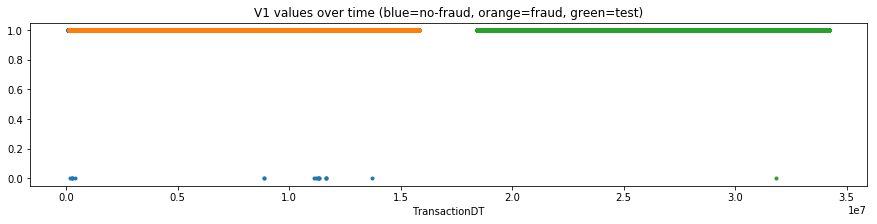

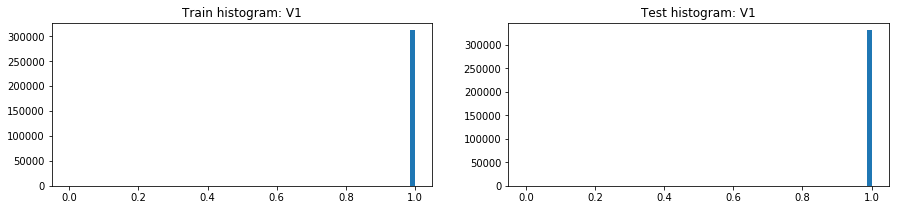

V1          Train      ...        Test public   Test private
0           count  311253.000000      ...         74232.0000  255942.000000
1            mean       0.999945      ...             1.0000       0.999996
2             std       0.007390      ...             0.0000       0.001977
3             min       0.000000      ...             1.0000       0.000000
4             25%       1.000000      ...             1.0000       1.000000
5             50%       1.000000      ...             1.0000       1.000000
6             75%       1.000000      ...             1.0000       1.000000
7             max       1.000000      ...             1.0000       1.000000
8   unique values       3.000000      ...             2.0000       3.000000
9            NaNs  279287.000000      ...         27107.0000  149411.000000
10     NaNs share       0.472900      ...             0.2675       0.368600

[11 rows x 7 columns]

V1  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 311236      ...              6106         330172
1 -999.0                 279287      ...             14557         176518
2    0.0                     17      ...                 0              1

[3 rows x 5 columns]

V1  Count in train      ...        Sum target (desc)  Count in test
0 -999.0          279287      ...                    14557         176518
1    1.0          311236      ...                     6106         330172
2    0.0              17      ...                        0              1

[3 rows x 5 columns]

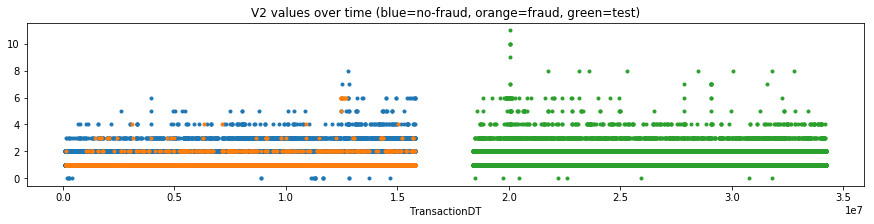

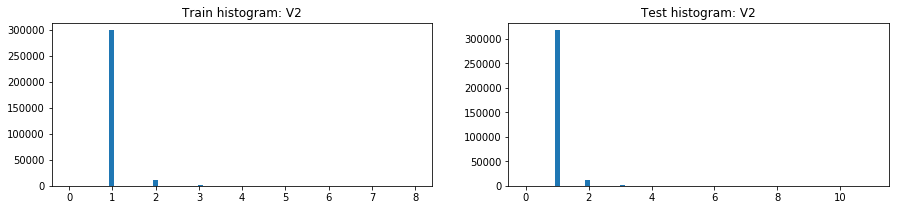

V2          Train      ...         Test public   Test private
0           count  311253.000000      ...        74232.000000  255942.000000
1            mean       1.045204      ...            1.051649       1.045182
2             std       0.240133      ...            0.284682       0.240125
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       8.000000      ...           11.000000       8.000000
8   unique values      10.000000      ...           13.000000      10.000000
9            NaNs  279287.000000      ...        27107.000000  149411.000000
10     NaNs share       0.472900      ...            0.267500       0.368600

[11 rows x 7 columns]

V2  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 298894      ...              5717         316786
1 -999.0                 279287      ...             14557         176518
2    2.0                  10926      ...               330          11933
3    3.0                   1181      ...                44           1099
4    4.0                    163      ...                 5            227
5    5.0                     36      ...                 1             51
6    6.0                     30      ...                 9             47
7    0.0                     20      ...                 0              8
8    7.0                      2      ...                 0              9
9    8.0                      1      ...                 0              8

[10 rows x 5 columns]

V2  Count in train      ...        Sum target (desc)  Count in test
0 -999.0          279287      ...                    14557         176518
1    1.0          298894      ...                     5717         316786
2    2.0           10926      ...                      330          11933
3    3.0            1181      ...                       44           1099
4    6.0              30      ...                        9             47
5    4.0             163      ...                        5            227
6    5.0              36      ...                        1             51
7    0.0              20      ...                        0              8
8    7.0               2      ...                        0              9
9    8.0               1      ...                        0              8

[10 rows x 5 columns]

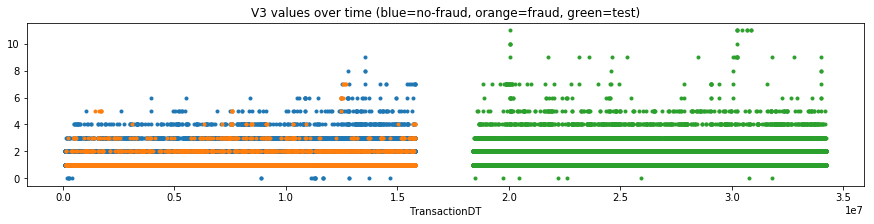

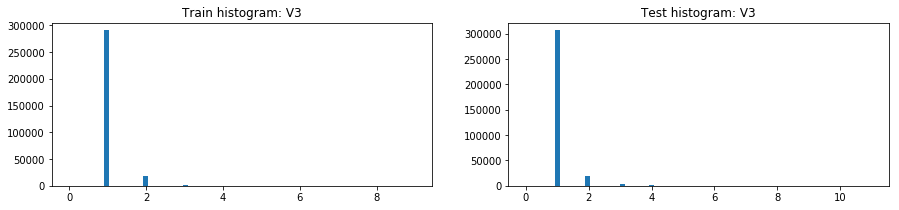

V3          Train      ...         Test public   Test private
0           count  311253.000000      ...        74232.000000  255942.000000
1            mean       1.078075      ...            1.089180       1.086930
2             std       0.320890      ...            0.372204       0.355121
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       9.000000      ...           11.000000      11.000000
8   unique values      11.000000      ...           12.000000      13.000000
9            NaNs  279287.000000      ...        27107.000000  149411.000000
10     NaNs share       0.472900      ...            0.267500       0.368600

[11 rows x 7 columns]

V3  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 290583      ...              5249         306610
1 -999.0                 279287      ...             14557         176518
2    2.0                  17763      ...               631          19796
3    3.0                   2335      ...               182           2797
4    4.0                    403      ...                25            644
5    5.0                     93      ...                10            200
6    6.0                     34      ...                 5             37
7    0.0                     20      ...                 0              8
8    7.0                     18      ...                 4             48
9    8.0                      3      ...                 0              4

[10 rows x 5 columns]

V3  Count in train      ...        Sum target (desc)  Count in test
0 -999.0          279287      ...                    14557         176518
1    1.0          290583      ...                     5249         306610
2    2.0           17763      ...                      631          19796
3    3.0            2335      ...                      182           2797
4    4.0             403      ...                       25            644
5    5.0              93      ...                       10            200
6    6.0              34      ...                        5             37
7    7.0              18      ...                        4             48
8    0.0              20      ...                        0              8
9    8.0               3      ...                        0              4

[10 rows x 5 columns]

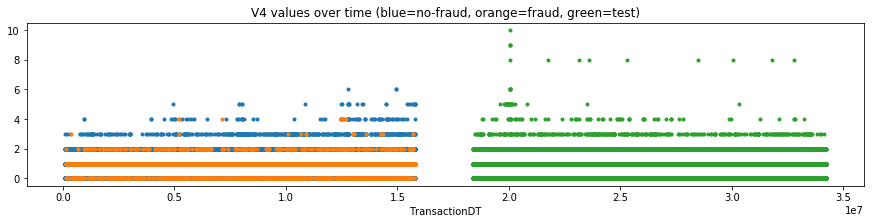

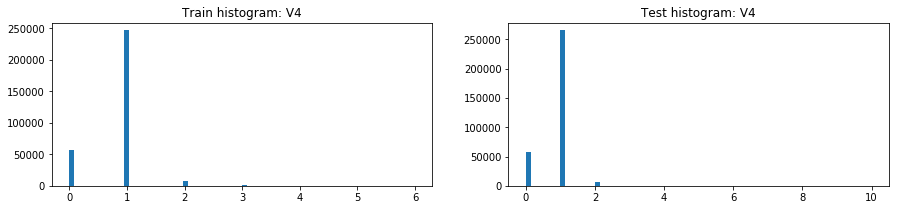

V4          Train      ...         Test public   Test private
0           count  311253.000000      ...        74232.000000  255942.000000
1            mean       0.846456      ...            0.849768       0.850794
2             std       0.440053      ...            0.448183       0.421885
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       6.000000      ...           10.000000       8.000000
8   unique values       8.000000      ...           11.000000       8.000000
9            NaNs  279287.000000      ...        27107.000000  149411.000000
10     NaNs share       0.472900      ...            0.267500       0.368600

[11 rows x 7 columns]

V4  Count in train (desc)      ...        Sum target  Count in test
0 -999.0                 279287      ...             14557         176518
1    1.0                 246500      ...              4620         265348
2    0.0                  56687      ...              1113          57449
3    2.0                   7385      ...               343           6851
4    3.0                    564      ...                18            412
5    4.0                     88      ...                12             67
6    5.0                     26      ...                 0             28
7    6.0                      3      ...                 0              5

[8 rows x 5 columns]

V4  Count in train      ...        Sum target (desc)  Count in test
0 -999.0          279287      ...                    14557         176518
1    1.0          246500      ...                     4620         265348
2    0.0           56687      ...                     1113          57449
3    2.0            7385      ...                      343           6851
4    3.0             564      ...                       18            412
5    4.0              88      ...                       12             67
6    5.0              26      ...                        0             28
7    6.0               3      ...                        0              5

[8 rows x 5 columns]

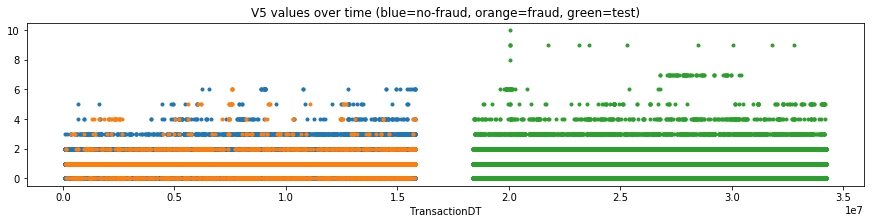

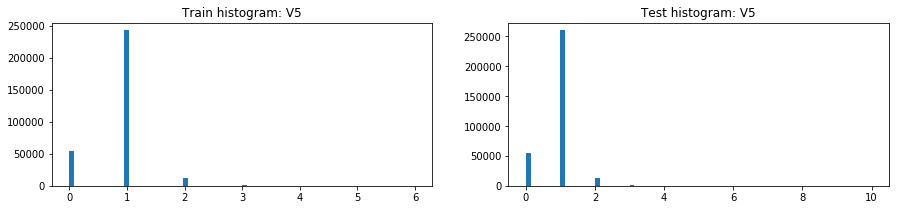

V5          Train      ...         Test public   Test private
0           count  311253.000000      ...        74232.000000  255942.000000
1            mean       0.876991      ...            0.879930       0.886080
2             std       0.475902      ...            0.488099       0.481887
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       6.000000      ...           10.000000       9.000000
8   unique values       8.000000      ...           11.000000      10.000000
9            NaNs  279287.000000      ...        27107.000000  149411.000000
10     NaNs share       0.472900      ...            0.267500       0.368600

[11 rows x 7 columns]

V5  Count in train (desc)      ...        Sum target  Count in test
0 -999.0                 279287      ...             14557         176518
1    1.0                 242883      ...              4465         259837
2    0.0                  54276      ...               947          55494
3    2.0                  12610      ...               541          13196
4    3.0                   1200      ...                76           1137
5    4.0                    193      ...                51            291
6    5.0                     55      ...                22            111
7    6.0                     36      ...                 4             31

[8 rows x 5 columns]

V5  Count in train      ...        Sum target (desc)  Count in test
0 -999.0          279287      ...                    14557         176518
1    1.0          242883      ...                     4465         259837
2    0.0           54276      ...                      947          55494
3    2.0           12610      ...                      541          13196
4    3.0            1200      ...                       76           1137
5    4.0             193      ...                       51            291
6    5.0              55      ...                       22            111
7    6.0              36      ...                        4             31

[8 rows x 5 columns]

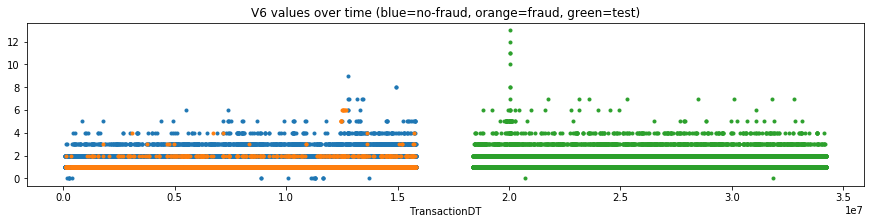

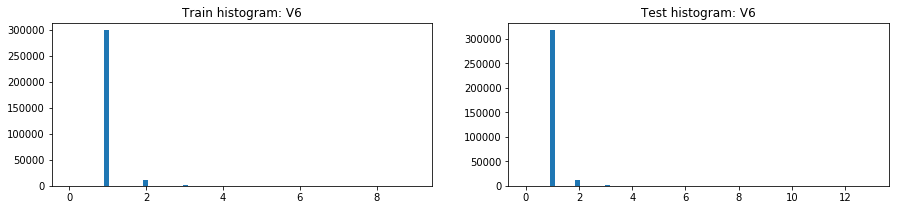

V6          Train      ...         Test public   Test private
0           count  311253.000000      ...        74232.000000  255942.000000
1            mean       1.045686      ...            1.049776       1.044827
2             std       0.239385      ...            0.272326       0.235285
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       9.000000      ...           13.000000       7.000000
8   unique values      11.000000      ...           14.000000       9.000000
9            NaNs  279287.000000      ...        27107.000000  149411.000000
10     NaNs share       0.472900      ...            0.267500       0.368600

[11 rows x 7 columns]

V6  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 298627      ...              5778       316806.0
1 -999.0                 279287      ...             14557       176518.0
2    2.0                  11319      ...               299        12027.0
3    3.0                   1044      ...                14         1023.0
4    4.0                    180      ...                 5          235.0
5    5.0                     46      ...                 4           48.0
6    0.0                     18      ...                 0            2.0
7    6.0                     11      ...                 6           16.0
8    7.0                      5      ...                 0            9.0
9    8.0                      2      ...                 0            2.0

[10 rows x 5 columns]

V6  Count in train      ...        Sum target (desc)  Count in test
0 -999.0          279287      ...                    14557         176518
1    1.0          298627      ...                     5778         316806
2    2.0           11319      ...                      299          12027
3    3.0            1044      ...                       14           1023
4    6.0              11      ...                        6             16
5    4.0             180      ...                        5            235
6    5.0              46      ...                        4             48
7    0.0              18      ...                        0              2
8    7.0               5      ...                        0              9
9    8.0               2      ...                        0              2

[10 rows x 5 columns]

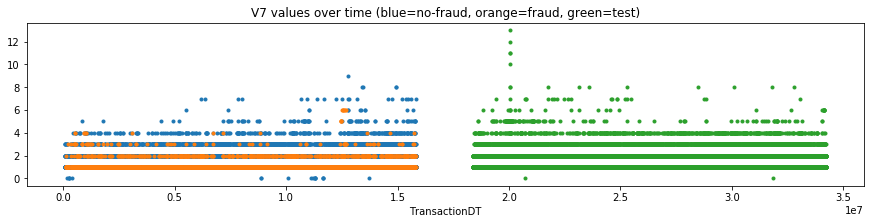

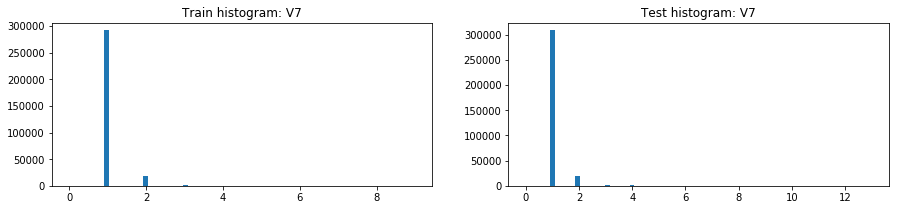

V7          Train      ...         Test public   Test private
0           count  311253.000000      ...        74232.000000  255942.000000
1            mean       1.072870      ...            1.081690       1.078487
2             std       0.304779      ...            0.354006       0.322814
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       9.000000      ...           13.000000       8.000000
8   unique values      11.000000      ...           14.000000      10.000000
9            NaNs  279287.000000      ...        27107.000000  149411.000000
10     NaNs share       0.472900      ...            0.267500       0.368600

[11 rows x 7 columns]

V7  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 291485      ...              5482       308215.0
1 -999.0                 279287      ...             14557       176518.0
2    2.0                  17464      ...               533        18901.0
3    3.0                   1823      ...                68         2243.0
4    4.0                    337      ...                13          613.0
5    5.0                     83      ...                 4          136.0
6    7.0                     20      ...                 0           22.0
7    0.0                     18      ...                 0            2.0
8    6.0                     18      ...                 6           26.0
9    8.0                      4      ...                 0           10.0

[10 rows x 5 columns]

V7  Count in train      ...        Sum target (desc)  Count in test
0 -999.0          279287      ...                    14557         176518
1    1.0          291485      ...                     5482         308215
2    2.0           17464      ...                      533          18901
3    3.0            1823      ...                       68           2243
4    4.0             337      ...                       13            613
5    6.0              18      ...                        6             26
6    5.0              83      ...                        4            136
7    7.0              20      ...                        0             22
8    0.0              18      ...                        0              2
9    8.0               4      ...                        0             10

[10 rows x 5 columns]

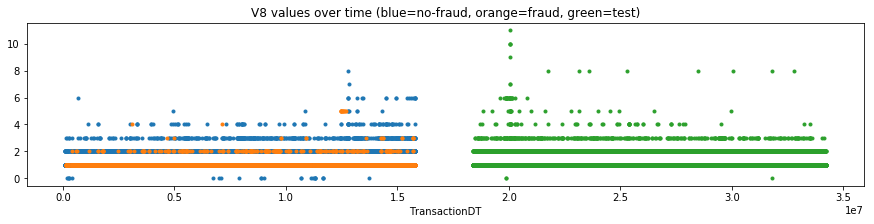

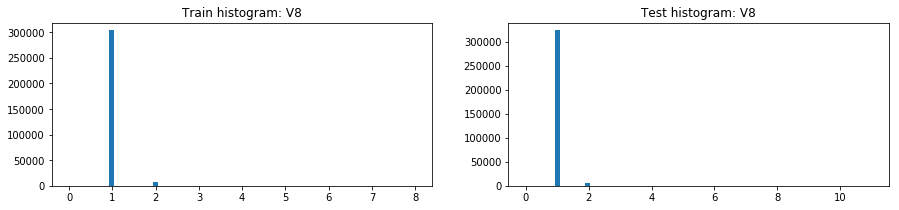

V8          Train      ...         Test public   Test private
0           count  311253.000000      ...        74232.000000  255942.000000
1            mean       1.027704      ...            1.028829       1.021024
2             std       0.186069      ...            0.221694       0.158205
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       8.000000      ...           11.000000       8.000000
8   unique values      10.000000      ...           13.000000       8.000000
9            NaNs  279287.000000      ...        27107.000000  149411.000000
10     NaNs share       0.472900      ...            0.267500       0.368600

[11 rows x 7 columns]

V8  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 303466      ...              5859         323436
1 -999.0                 279287      ...             14557         176518
2    2.0                   7076      ...               218           6206
3    3.0                    553      ...                17            408
4    4.0                     95      ...                 2             58
5    0.0                     24      ...                 0              3
6    6.0                     19      ...                 0             27
7    5.0                     18      ...                10             20
8    7.0                      1      ...                 0              2
9    8.0                      1      ...                 0              8

[10 rows x 5 columns]

V8  Count in train      ...        Sum target (desc)  Count in test
0 -999.0          279287      ...                    14557         176518
1    1.0          303466      ...                     5859         323436
2    2.0            7076      ...                      218           6206
3    3.0             553      ...                       17            408
4    5.0              18      ...                       10             20
5    4.0              95      ...                        2             58
6    0.0              24      ...                        0              3
7    6.0              19      ...                        0             27
8    7.0               1      ...                        0              2
9    8.0               1      ...                        0              8

[10 rows x 5 columns]

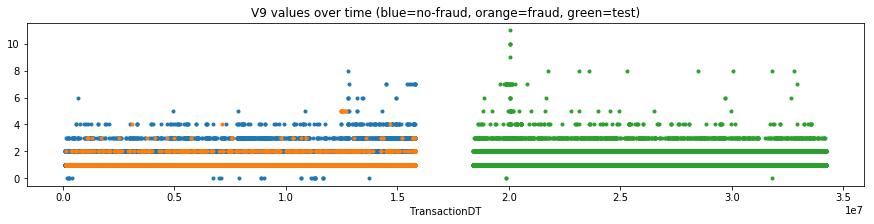

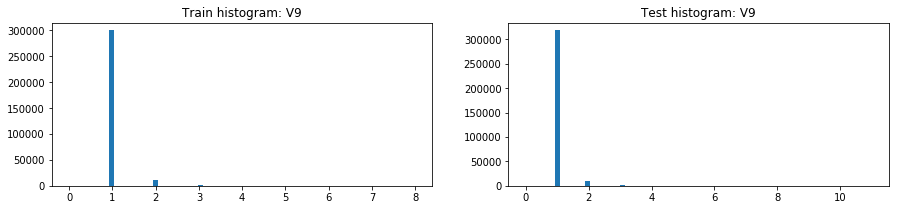

V9          Train      ...         Test public   Test private
0           count  311253.000000      ...        74232.000000  255942.000000
1            mean       1.041529      ...            1.045008       1.038388
2             std       0.226339      ...            0.271224       0.211306
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       8.000000      ...           11.000000       8.000000
8   unique values      10.000000      ...           13.000000      10.000000
9            NaNs  279287.000000      ...        27107.000000  149411.000000
10     NaNs share       0.472900      ...            0.267500       0.368600

[11 rows x 7 columns]

V9  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 299625      ...              5557         318347
1 -999.0                 279287      ...             14557         176518
2    2.0                  10544      ...               497          10859
3    3.0                    848      ...                39            765
4    4.0                    172      ...                 3            126
5    0.0                     24      ...                 0              3
6    5.0                     19      ...                10             25
7    7.0                     11      ...                 0             26
8    6.0                      9      ...                 0              9
9    8.0                      1      ...                 0              8

[10 rows x 5 columns]

V9  Count in train      ...        Sum target (desc)  Count in test
0 -999.0          279287      ...                    14557         176518
1    1.0          299625      ...                     5557         318347
2    2.0           10544      ...                      497          10859
3    3.0             848      ...                       39            765
4    5.0              19      ...                       10             25
5    4.0             172      ...                        3            126
6    0.0              24      ...                        0              3
7    7.0              11      ...                        0             26
8    6.0               9      ...                        0              9
9    8.0               1      ...                        0              8

[10 rows x 5 columns]

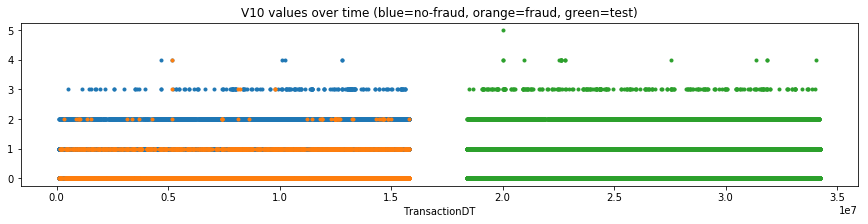

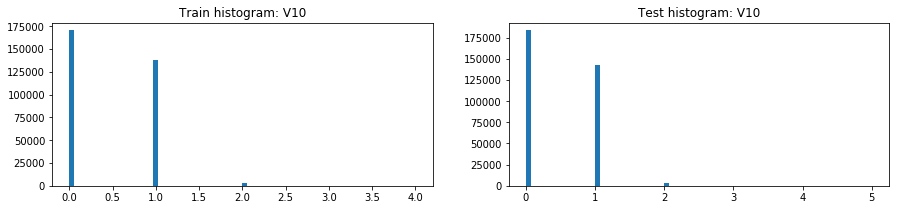

V10          Train      ...         Test public   Test private
0           count  311253.000000      ...        74232.000000  255942.000000
1            mean       0.463915      ...            0.458010       0.456217
2             std       0.521522      ...            0.525272       0.522864
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       4.000000      ...            5.000000       4.000000
8   unique values       6.000000      ...            7.000000       6.000000
9            NaNs  279287.000000      ...        27107.000000  149411.000000
10     NaNs share       0.472900      ...            0.267500       0.368600

[11 rows x 7 columns]

V10  Count in train (desc)      ...        Sum target  Count in test
0 -999.0                 279287      ...             14557         176518
1    0.0                 170281      ...              5020         183374
2    1.0                 137743      ...              1027         143115
3    2.0                   3042      ...                53           3421
4    3.0                    180      ...                 5            246
5    4.0                      7      ...                 1             16

[6 rows x 5 columns]

V10  Count in train      ...        Sum target (desc)  Count in test
0 -999.0          279287      ...                    14557         176518
1    0.0          170281      ...                     5020         183374
2    1.0          137743      ...                     1027         143115
3    2.0            3042      ...                       53           3421
4    3.0             180      ...                        5            246
5    4.0               7      ...                        1             16

[6 rows x 5 columns]

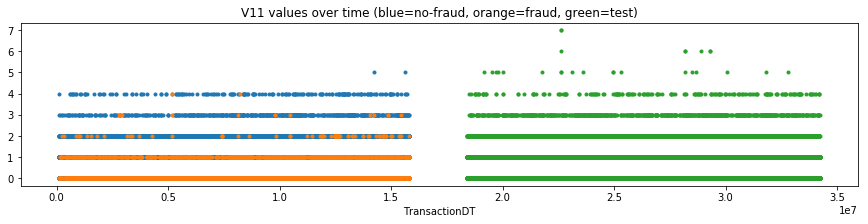

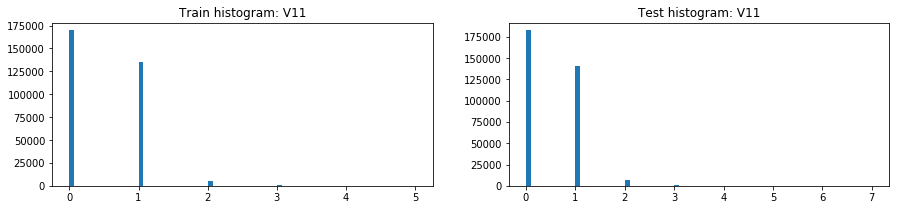

V11          Train      ...         Test public   Test private
0           count  311253.000000      ...        74232.000000  255942.000000
1            mean       0.478987      ...            0.473677       0.473928
2             std       0.552431      ...            0.556013       0.559548
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       5.000000      ...            5.000000       7.000000
8   unique values       7.000000      ...            7.000000       9.000000
9            NaNs  279287.000000      ...        27107.000000  149411.000000
10     NaNs share       0.472900      ...            0.267500       0.368600

[11 rows x 7 columns]

V11  Count in train (desc)      ...        Sum target  Count in test
0 -999.0                 279287      ...             14557         176518
1    0.0                 169633      ...              5006         182449
2    1.0                 135148      ...              1007         140332
3    2.0                   5672      ...                79           6301
4    3.0                    608      ...                12            875
5    4.0                    190      ...                 2            189
6    5.0                      2      ...                 0             19

[7 rows x 5 columns]

V11  Count in train      ...        Sum target (desc)  Count in test
0 -999.0          279287      ...                    14557         176518
1    0.0          169633      ...                     5006         182449
2    1.0          135148      ...                     1007         140332
3    2.0            5672      ...                       79           6301
4    3.0             608      ...                       12            875
5    4.0             190      ...                        2            189
6    5.0               2      ...                        0             19

[7 rows x 5 columns]

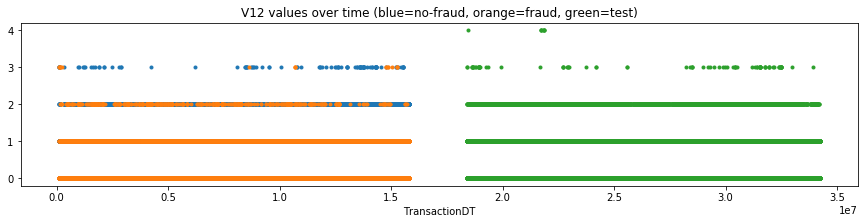

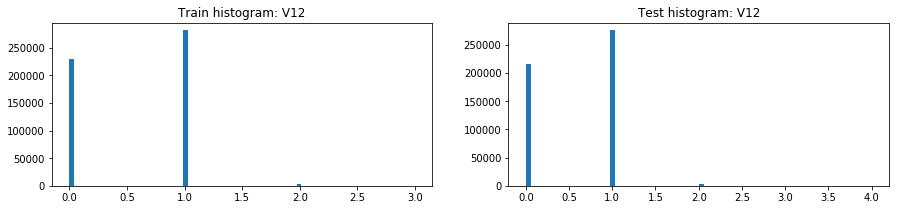

V12          Train      ...         Test public   Test private
0           count  514467.000000      ...        93884.000000  400219.000000
1            mean       0.559711      ...            0.664277       0.547655
2             std       0.510533      ...            0.489000       0.509998
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       3.000000      ...            4.000000       4.000000
8   unique values       5.000000      ...            6.000000       6.000000
9            NaNs   76073.000000      ...         7455.000000    5134.000000
10     NaNs share       0.128800      ...            0.073600       0.012700

[11 rows x 7 columns]

V12  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 281003      ...              6019         275401
1    0.0                 230049      ...             10303         215678
2 -999.0                  76073      ...              3887          12589
3    2.0                   3295      ...               436           2931
4    3.0                    120      ...                18             84

[5 rows x 5 columns]

V12  Count in train      ...        Sum target (desc)  Count in test
0    0.0          230049      ...                    10303         215678
1    1.0          281003      ...                     6019         275401
2 -999.0           76073      ...                     3887          12589
3    2.0            3295      ...                      436           2931
4    3.0             120      ...                       18             84

[5 rows x 5 columns]

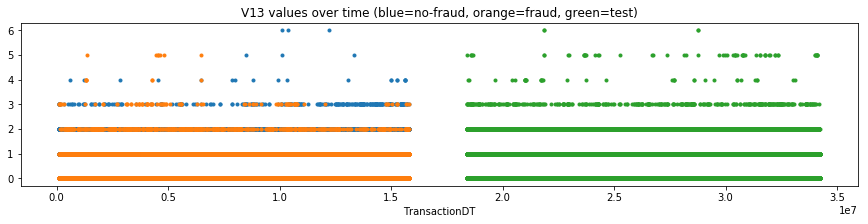

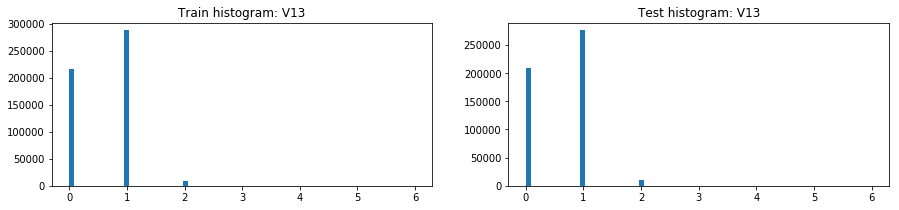

V13          Train      ...         Test public   Test private
0           count  514467.000000      ...        93884.000000  400219.000000
1            mean       0.599166      ...            0.701014       0.576839
2             std       0.532185      ...            0.513543       0.538759
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       6.000000      ...            5.000000       6.000000
8   unique values       8.000000      ...            7.000000       8.000000
9            NaNs   76073.000000      ...         7455.000000    5134.000000
10     NaNs share       0.128800      ...            0.073600       0.012700

[11 rows x 7 columns]

V13  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 287644      ...              6009         275677
1    0.0                 216752      ...              9923         208273
2 -999.0                  76073      ...              3887          12589
3    2.0                   9661      ...               733           9623
4    3.0                    371      ...                97            430
5    4.0                     26      ...                 7             36
6    5.0                     10      ...                 7             59
7    6.0                      3      ...                 0              4

[8 rows x 5 columns]

V13  Count in train      ...        Sum target (desc)  Count in test
0    0.0          216752      ...                     9923         208273
1    1.0          287644      ...                     6009         275677
2 -999.0           76073      ...                     3887          12589
3    2.0            9661      ...                      733           9623
4    3.0             371      ...                       97            430
5    4.0              26      ...                        7             36
6    5.0              10      ...                        7             59
7    6.0               3      ...                        0              4

[8 rows x 5 columns]

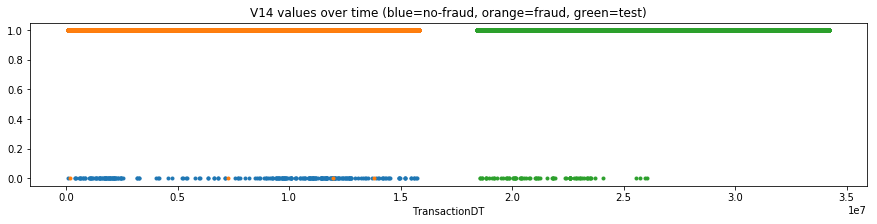

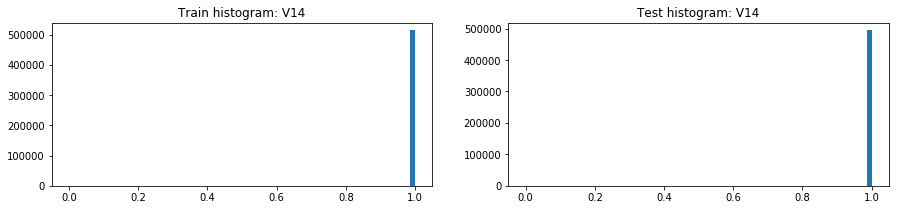

V14          Train      ...         Test public   Test private
0           count  514467.000000      ...        93884.000000  400219.000000
1            mean       0.999500      ...            0.999553       0.999915
2             std       0.022345      ...            0.021146       0.009217
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       1.000000      ...            1.000000       1.000000
8   unique values       3.000000      ...            3.000000       3.000000
9            NaNs   76073.000000      ...         7455.000000    5134.000000
10     NaNs share       0.128800      ...            0.073600       0.012700

[11 rows x 7 columns]

V14  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 514210      ...             16772         494026
1 -999.0                  76073      ...              3887          12589
2    0.0                    257      ...                 4             76

[3 rows x 5 columns]

V14  Count in train      ...        Sum target (desc)  Count in test
0    1.0          514210      ...                    16772         494026
1 -999.0           76073      ...                     3887          12589
2    0.0             257      ...                        4             76

[3 rows x 5 columns]

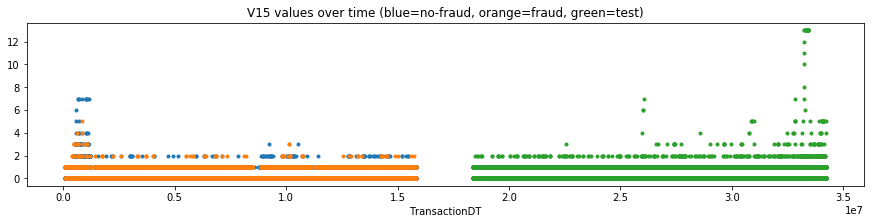

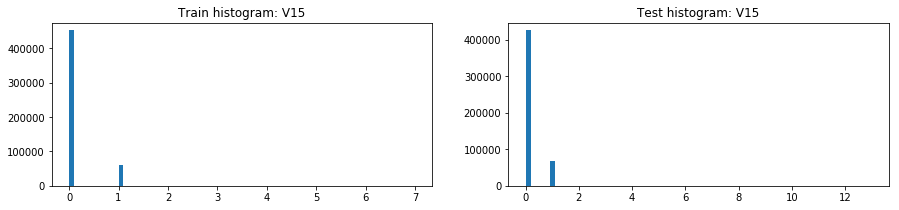

V15          Train      ...         Test public   Test private
0           count  514467.000000      ...        93884.000000  400219.000000
1            mean       0.122342      ...            0.104853       0.149433
2             std       0.332422      ...            0.307926       0.371890
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       0.000000
7             max       7.000000      ...            2.000000      13.000000
8   unique values       9.000000      ...            4.000000      14.000000
9            NaNs   76073.000000      ...         7455.000000    5134.000000
10     NaNs share       0.128800      ...            0.073600       0.012700

[11 rows x 7 columns]

V15  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 452075      ...              9442         425298
1 -999.0                  76073      ...              3887          12589
2    1.0                  61974      ...              7231          68326
3    2.0                    346      ...                86            365
4    3.0                     48      ...                14             53
5    4.0                     10      ...                 2             15
6    7.0                     10      ...                 0              3
7    5.0                      3      ...                 1             20
8    6.0                      1      ...                 0              3

[9 rows x 5 columns]

V15  Count in train      ...        Sum target (desc)  Count in test
0    0.0          452075      ...                     9442         425298
1    1.0           61974      ...                     7231          68326
2 -999.0           76073      ...                     3887          12589
3    2.0             346      ...                       86            365
4    3.0              48      ...                       14             53
5    4.0              10      ...                        2             15
6    5.0               3      ...                        1             20
7    7.0              10      ...                        0              3
8    6.0               1      ...                        0              3

[9 rows x 5 columns]

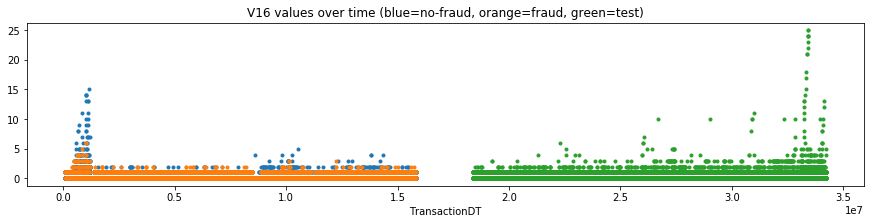

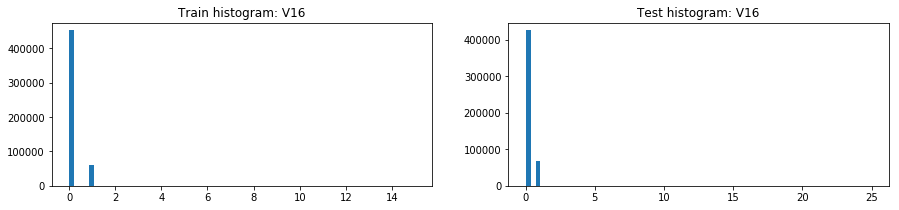

V16          Train      ...         Test public   Test private
0           count  514467.000000      ...        93884.000000  400219.000000
1            mean       0.123460      ...            0.104991       0.151072
2             std       0.342841      ...            0.308725       0.393472
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       0.000000
7             max      15.000000      ...            4.000000      25.000000
8   unique values      16.000000      ...            6.000000      24.000000
9            NaNs   76073.000000      ...         7455.000000    5134.000000
10     NaNs share       0.128800      ...            0.073600       0.012700

[11 rows x 7 columns]

V16  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 452052      ...              9442         425270
1 -999.0                  76073      ...              3887          12589
2    1.0                  61749      ...              7198          68099
3    2.0                    481      ...                96            476
4    3.0                    101      ...                23            156
5    4.0                     42      ...                14             37
6    5.0                     12      ...                 1             20
7    6.0                      7      ...                 2              7
8    7.0                      5      ...                 0              3
9    8.0                      4      ...                 0              4

[10 rows x 5 columns]

V16  Count in train      ...        Sum target (desc)  Count in test
0    0.0          452052      ...                     9442         425270
1    1.0           61749      ...                     7198          68099
2 -999.0           76073      ...                     3887          12589
3    2.0             481      ...                       96            476
4    3.0             101      ...                       23            156
5    4.0              42      ...                       14             37
6    6.0               7      ...                        2              7
7    5.0              12      ...                        1             20
8    7.0               5      ...                        0              3
9    8.0               4      ...                        0              4

[10 rows x 5 columns]

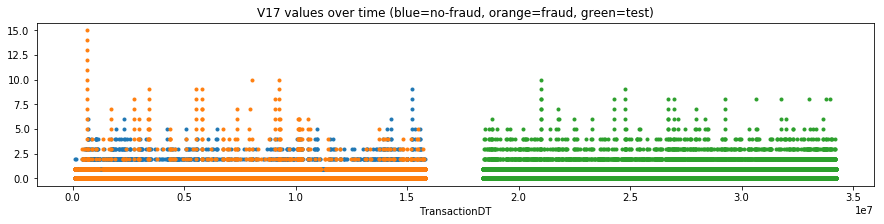

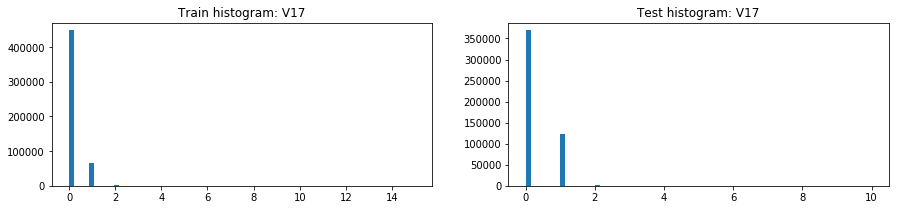

V17          Train      ...         Test public   Test private
0           count  514467.000000      ...        93884.000000  400219.000000
1            mean       0.134040      ...            0.121107       0.292307
2             std       0.364456      ...            0.357741       0.476318
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       1.000000
7             max      15.000000      ...           10.000000       9.000000
8   unique values      17.000000      ...           12.000000      11.000000
9            NaNs   76073.000000      ...         7455.000000    5134.000000
10     NaNs share       0.128800      ...            0.073600       0.012700

[11 rows x 7 columns]

V17  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 447823      ...              9443       369022.0
1 -999.0                  76073      ...              3887        12589.0
2    1.0                  65244      ...              6892       122807.0
3    2.0                    927      ...               220         1676.0
4    3.0                    274      ...                95          365.0
5    4.0                    104      ...                50          143.0
6    5.0                     40      ...                28           46.0
7    6.0                     21      ...                17           19.0
8    7.0                     12      ...                11            9.0
9    8.0                      8      ...                 7           12.0

[10 rows x 5 columns]

V17  Count in train      ...        Sum target (desc)  Count in test
0    0.0          447823      ...                     9443         369022
1    1.0           65244      ...                     6892         122807
2 -999.0           76073      ...                     3887          12589
3    2.0             927      ...                      220           1676
4    3.0             274      ...                       95            365
5    4.0             104      ...                       50            143
6    5.0              40      ...                       28             46
7    6.0              21      ...                       17             19
8    7.0              12      ...                       11              9
9    8.0               8      ...                        7             12

[10 rows x 5 columns]

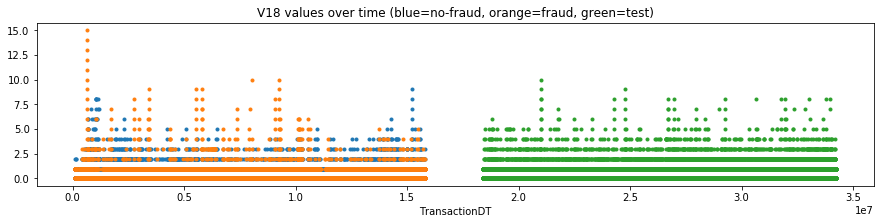

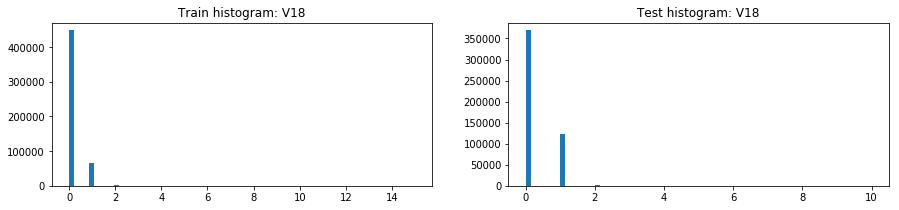

V18          Train      ...         Test public   Test private
0           count  514467.000000      ...        93884.000000  400219.000000
1            mean       0.135363      ...            0.121959       0.294426
2             std       0.371763      ...            0.362981       0.482925
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       1.000000
7             max      15.000000      ...           10.000000       9.000000
8   unique values      17.000000      ...           12.000000      11.000000
9            NaNs   76073.000000      ...         7455.000000    5134.000000
10     NaNs share       0.128800      ...            0.073600       0.012700

[11 rows x 7 columns]

V18  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 447792      ...              9441       368966.0
1 -999.0                  76073      ...              3887        12589.0
2    1.0                  64889      ...              6819       122201.0
3    2.0                   1155      ...               241         2216.0
4    3.0                    388      ...               145          443.0
5    4.0                    120      ...                51          160.0
6    5.0                     48      ...                29           64.0
7    6.0                     32      ...                19           21.0
8    7.0                     16      ...                11           15.0
9    8.0                     13      ...                 7           13.0

[10 rows x 5 columns]

V18  Count in train      ...        Sum target (desc)  Count in test
0    0.0          447792      ...                     9441         368966
1    1.0           64889      ...                     6819         122201
2 -999.0           76073      ...                     3887          12589
3    2.0            1155      ...                      241           2216
4    3.0             388      ...                      145            443
5    4.0             120      ...                       51            160
6    5.0              48      ...                       29             64
7    6.0              32      ...                       19             21
8    7.0              16      ...                       11             15
9    8.0              13      ...                        7             13

[10 rows x 5 columns]

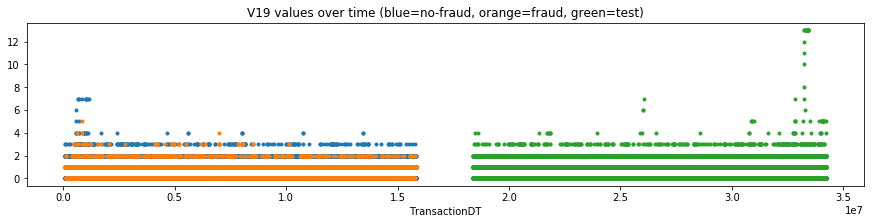

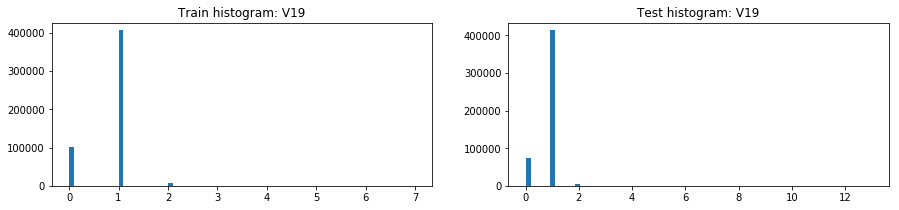

V19          Train      ...        Test public  Test private
0           count  514467.000000      ...       93884.000000  400219.00000
1            mean       0.816371      ...           0.832037       0.86840
2             std       0.425512      ...           0.408003       0.38821
3             min       0.000000      ...           0.000000       0.00000
4             25%       1.000000      ...           1.000000       1.00000
5             50%       1.000000      ...           1.000000       1.00000
6             75%       1.000000      ...           1.000000       1.00000
7             max       7.000000      ...           4.000000      13.00000
8   unique values       9.000000      ...           6.000000      14.00000
9            NaNs   76073.000000      ...        7455.000000    5134.00000
10     NaNs share       0.128800      ...           0.073600       0.01270

[11 rows x 7 columns]

V19  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 405665      ...             13673         412869
1    0.0                 101871      ...              2522          75188
2 -999.0                  76073      ...              3887          12589
3    2.0                   6540      ...               524           5611
4    3.0                    348      ...                53            358
5    4.0                     29      ...                 3             31
6    7.0                     10      ...                 0              3
7    5.0                      3      ...                 1             20
8    6.0                      1      ...                 0              3

[9 rows x 5 columns]

V19  Count in train      ...        Sum target (desc)  Count in test
0    1.0          405665      ...                    13673         412869
1 -999.0           76073      ...                     3887          12589
2    0.0          101871      ...                     2522          75188
3    2.0            6540      ...                      524           5611
4    3.0             348      ...                       53            358
5    4.0              29      ...                        3             31
6    5.0               3      ...                        1             20
7    7.0              10      ...                        0              3
8    6.0               1      ...                        0              3

[9 rows x 5 columns]

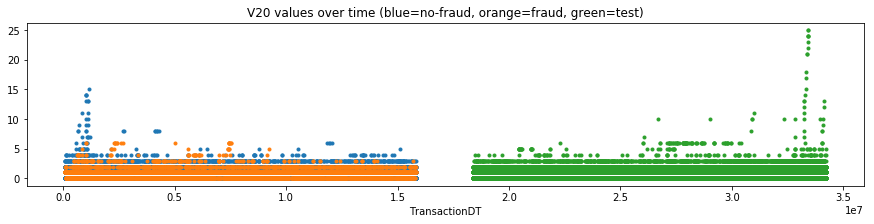

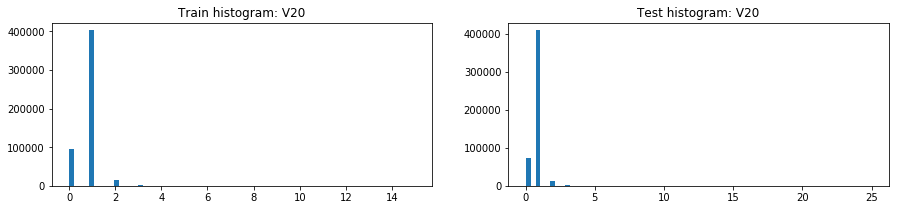

V20          Train      ...         Test public   Test private
0           count  514467.000000      ...        93884.000000  400219.000000
1            mean       0.847843      ...            0.857398       0.892097
2             std       0.459451      ...            0.435610       0.436101
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max      15.000000      ...            5.000000      25.000000
8   unique values      16.000000      ...            7.000000      24.000000
9            NaNs   76073.000000      ...         7455.000000    5134.000000
10     NaNs share       0.128800      ...            0.073600       0.012700

[11 rows x 7 columns]

V20  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 401929      ...             13465         407937
1    0.0                  96318      ...              2254          72522
2 -999.0                  76073      ...              3887          12589
3    2.0                  14902      ...               832          12171
4    3.0                   1070      ...               159           1199
5    4.0                    161      ...                37            111
6    5.0                     30      ...                11             51
7    6.0                     27      ...                18             74
8    8.0                     11      ...                 0              4
9    7.0                      5      ...                 0              3

[10 rows x 5 columns]

V20  Count in train      ...        Sum target (desc)  Count in test
0    1.0          401929      ...                    13465         407937
1 -999.0           76073      ...                     3887          12589
2    0.0           96318      ...                     2254          72522
3    2.0           14902      ...                      832          12171
4    3.0            1070      ...                      159           1199
5    4.0             161      ...                       37            111
6    6.0              27      ...                       18             74
7    5.0              30      ...                       11             51
8    8.0              11      ...                        0              4
9    7.0               5      ...                        0              3

[10 rows x 5 columns]

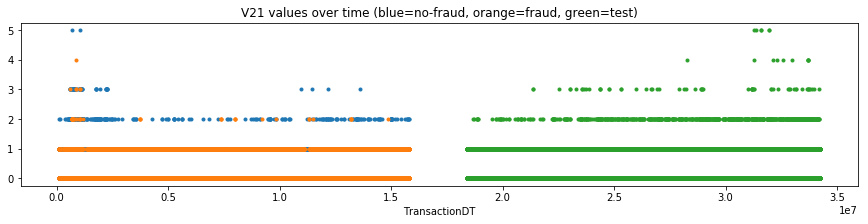

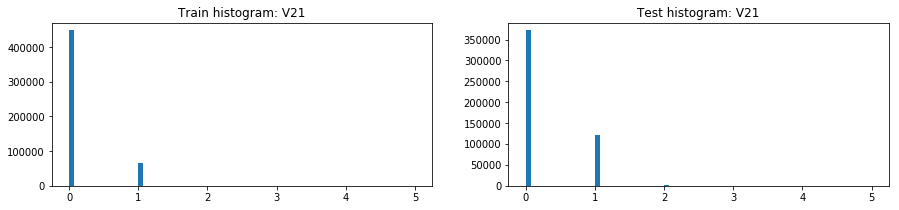

V21          Train      ...         Test public   Test private
0           count  514467.000000      ...        93884.000000  400219.000000
1            mean       0.129684      ...            0.114652       0.281501
2             std       0.339060      ...            0.320138       0.455994
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       1.000000
7             max       5.000000      ...            3.000000       5.000000
8   unique values       7.000000      ...            5.000000       7.000000
9            NaNs   76073.000000      ...         7455.000000    5134.000000
10     NaNs share       0.128800      ...            0.073600       0.012700

[11 rows x 7 columns]

V21  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 448220      ...              9509         371730
1 -999.0                  76073      ...              3887          12589
2    1.0                  65837      ...              7223         121417
3    2.0                    354      ...                38            878
4    3.0                     53      ...                 5             61
5    5.0                      2      ...                 0              6
6    4.0                      1      ...                 1             10

[7 rows x 5 columns]

V21  Count in train      ...        Sum target (desc)  Count in test
0    0.0          448220      ...                     9509         371730
1    1.0           65837      ...                     7223         121417
2 -999.0           76073      ...                     3887          12589
3    2.0             354      ...                       38            878
4    3.0              53      ...                        5             61
5    4.0               1      ...                        1             10
6    5.0               2      ...                        0              6

[7 rows x 5 columns]

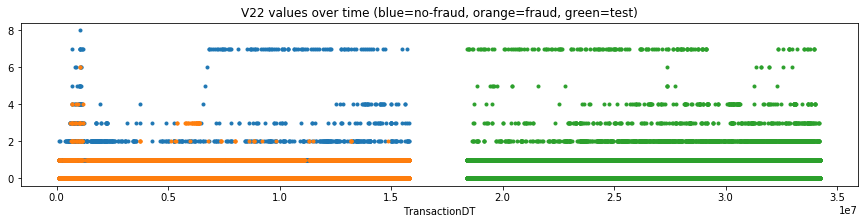

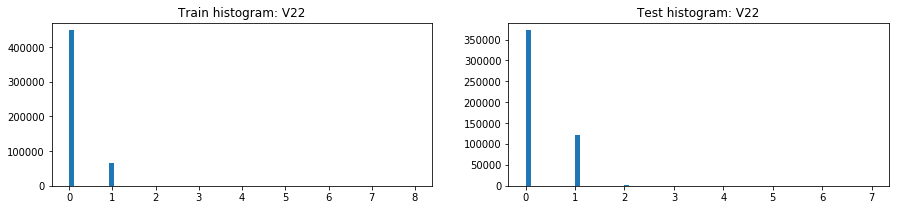

V22          Train      ...         Test public   Test private
0           count  514467.000000      ...        93884.000000  400219.000000
1            mean       0.132292      ...            0.117752       0.286493
2             std       0.359415      ...            0.350313       0.481809
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       1.000000
7             max       8.000000      ...            7.000000       7.000000
8   unique values      10.000000      ...            8.000000       9.000000
9            NaNs   76073.000000      ...         7455.000000    5134.000000
10     NaNs share       0.128800      ...            0.073600       0.012700

[11 rows x 7 columns]

V22  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 448185      ...              9507       371688.0
1 -999.0                  76073      ...              3887        12589.0
2    1.0                  65334      ...              7167       120501.0
3    2.0                    604      ...                49         1334.0
4    3.0                    169      ...                46          249.0
5    7.0                     94      ...                 0          149.0
6    4.0                     63      ...                 5          157.0
7    5.0                      9      ...                 0           16.0
8    6.0                      8      ...                 2            8.0
9    8.0                      1      ...                 0            NaN

[10 rows x 5 columns]

V22  Count in train      ...        Sum target (desc)  Count in test
0    0.0          448185      ...                     9507       371688.0
1    1.0           65334      ...                     7167       120501.0
2 -999.0           76073      ...                     3887        12589.0
3    2.0             604      ...                       49         1334.0
4    3.0             169      ...                       46          249.0
5    4.0              63      ...                        5          157.0
6    6.0               8      ...                        2            8.0
7    7.0              94      ...                        0          149.0
8    5.0               9      ...                        0           16.0
9    8.0               1      ...                        0            NaN

[10 rows x 5 columns]

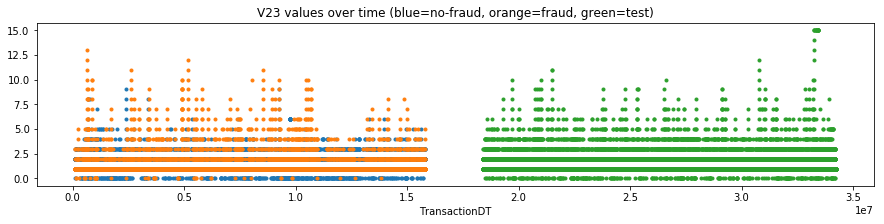

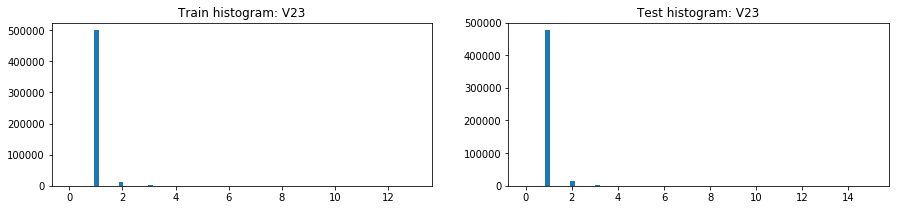

V23          Train      ...         Test public   Test private
0           count  514467.000000      ...        93884.000000  400219.000000
1            mean       1.034791      ...            1.046323       1.045298
2             std       0.247681      ...            0.294012       0.288451
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max      13.000000      ...           11.000000      15.000000
8   unique values      15.000000      ...           13.000000      17.000000
9            NaNs   76073.000000      ...         7455.000000    5134.000000
10     NaNs share       0.128800      ...            0.073600       0.012700

[11 rows x 7 columns]

V23  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 498764      ...             14705         475616
1 -999.0                  76073      ...              3887          12589
2    2.0                  13197      ...              1158          15463
3    3.0                   1244      ...               390           1622
4    0.0                    588      ...                50            367
5    4.0                    337      ...               202            615
6    5.0                    144      ...               112            186
7    6.0                     83      ...                61             94
8    7.0                     39      ...                35             61
9    8.0                     32      ...                26             29

[10 rows x 5 columns]

V23  Count in train      ...        Sum target (desc)  Count in test
0    1.0          498764      ...                    14705         475616
1 -999.0           76073      ...                     3887          12589
2    2.0           13197      ...                     1158          15463
3    3.0            1244      ...                      390           1622
4    4.0             337      ...                      202            615
5    5.0             144      ...                      112            186
6    6.0              83      ...                       61             94
7    0.0             588      ...                       50            367
8    7.0              39      ...                       35             61
9    8.0              32      ...                       26             29

[10 rows x 5 columns]

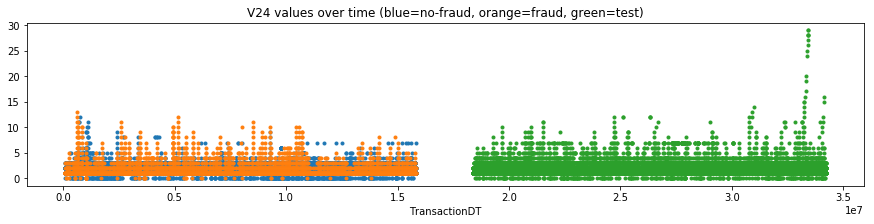

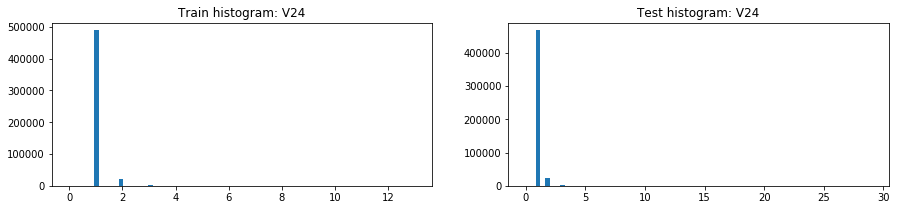

V24          Train      ...         Test public   Test private
0           count  514467.000000      ...        93884.000000  400219.000000
1            mean       1.058097      ...            1.070683       1.069117
2             std       0.305485      ...            0.350795       0.375764
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max      13.000000      ...           11.000000      29.000000
8   unique values      15.000000      ...           13.000000      27.000000
9            NaNs   76073.000000      ...         7455.000000    5134.000000
10     NaNs share       0.128800      ...            0.073600       0.012700

[11 rows x 7 columns]

V24  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 488478      ...             14375         466502
1 -999.0                  76073      ...              3887          12589
2    2.0                  22289      ...              1419          23104
3    3.0                   2241      ...               441           2803
4    0.0                    578      ...                48            364
5    4.0                    431      ...               214            642
6    5.0                    195      ...               109            246
7    6.0                     98      ...                64            110
8    7.0                     64      ...                38            218
9    8.0                     40      ...                26             32

[10 rows x 5 columns]

V24  Count in train      ...        Sum target (desc)  Count in test
0    1.0          488478      ...                    14375         466502
1 -999.0           76073      ...                     3887          12589
2    2.0           22289      ...                     1419          23104
3    3.0            2241      ...                      441           2803
4    4.0             431      ...                      214            642
5    5.0             195      ...                      109            246
6    6.0              98      ...                       64            110
7    0.0             578      ...                       48            364
8    7.0              64      ...                       38            218
9    8.0              40      ...                       26             32

[10 rows x 5 columns]

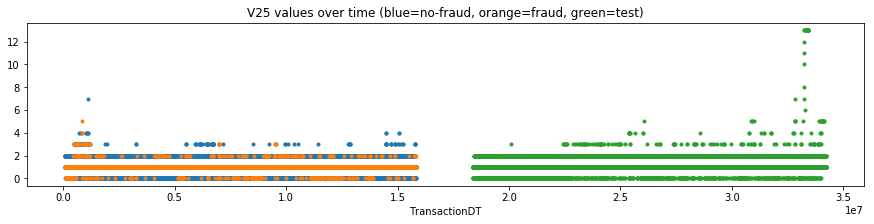

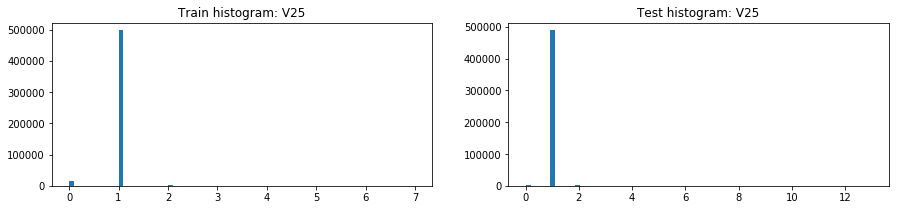

V25          Train      ...         Test public   Test private
0           count  514467.000000      ...        93884.000000  400219.000000
1            mean       0.977660      ...            0.996283       1.006666
2             std       0.185245      ...            0.127897       0.135187
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       7.000000      ...            3.000000      13.000000
8   unique values       8.000000      ...            5.000000      14.000000
9            NaNs   76073.000000      ...         7455.000000    5134.000000
10     NaNs share       0.128800      ...            0.073600       0.012700

[11 rows x 7 columns]

V25  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 497241      ...             15957         488731
1 -999.0                  76073      ...              3887          12589
2    0.0                  14465      ...               583           1754
3    2.0                   2569      ...               202           3420
4    3.0                    177      ...                32            127
5    4.0                     13      ...                 1             27
6    5.0                      1      ...                 1             21
7    7.0                      1      ...                 0              2

[8 rows x 5 columns]

V25  Count in train      ...        Sum target (desc)  Count in test
0    1.0          497241      ...                    15957         488731
1 -999.0           76073      ...                     3887          12589
2    0.0           14465      ...                      583           1754
3    2.0            2569      ...                      202           3420
4    3.0             177      ...                       32            127
5    4.0              13      ...                        1             27
6    5.0               1      ...                        1             21
7    7.0               1      ...                        0              2

[8 rows x 5 columns]

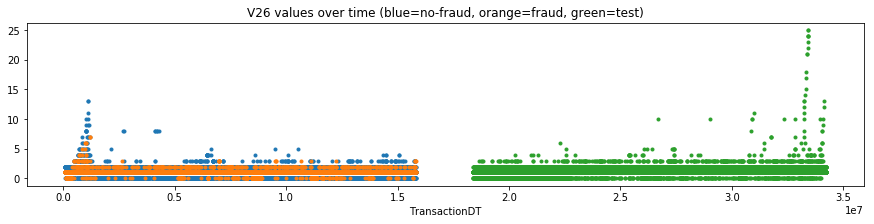

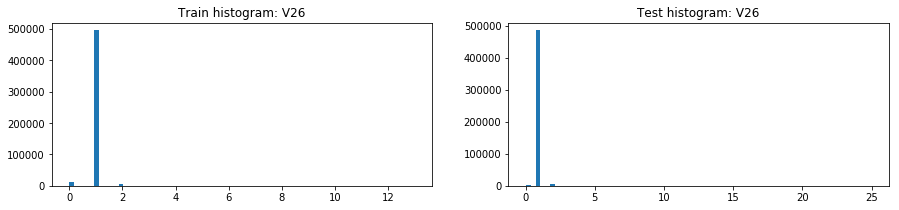

V26          Train      ...         Test public   Test private
0           count  514467.000000      ...        93884.000000  400219.000000
1            mean       0.988040      ...            1.004058       1.015047
2             std       0.209302      ...            0.148397       0.197679
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max      13.000000      ...            4.000000      25.000000
8   unique values      14.000000      ...            6.000000      24.000000
9            NaNs   76073.000000      ...         7455.000000    5134.000000
10     NaNs share       0.128800      ...            0.073600       0.012700

[11 rows x 7 columns]

V26  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 495119      ...             15746         485604
1 -999.0                  76073      ...              3887          12589
2    0.0                  13068      ...               509           1543
3    2.0                   5906      ...               456           6476
4    3.0                    271      ...                52            367
5    4.0                     50      ...                 6             48
6    5.0                     17      ...                 2             18
7    8.0                     13      ...                 0              4
8    6.0                      8      ...                 3              7
9    7.0                      7      ...                 2              5

[10 rows x 5 columns]

V26  Count in train      ...        Sum target (desc)  Count in test
0    1.0          495119      ...                    15746         485604
1 -999.0           76073      ...                     3887          12589
2    0.0           13068      ...                      509           1543
3    2.0            5906      ...                      456           6476
4    3.0             271      ...                       52            367
5    4.0              50      ...                        6             48
6    6.0               8      ...                        3              7
7    5.0              17      ...                        2             18
8    7.0               7      ...                        2              5
9    8.0              13      ...                        0              4

[10 rows x 5 columns]

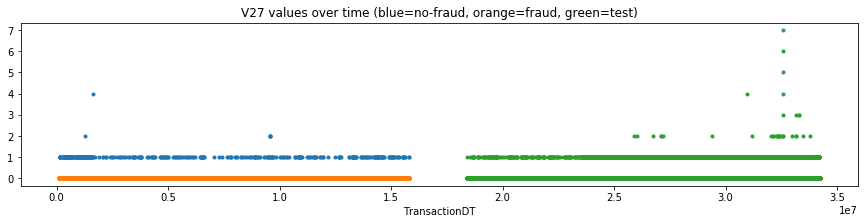

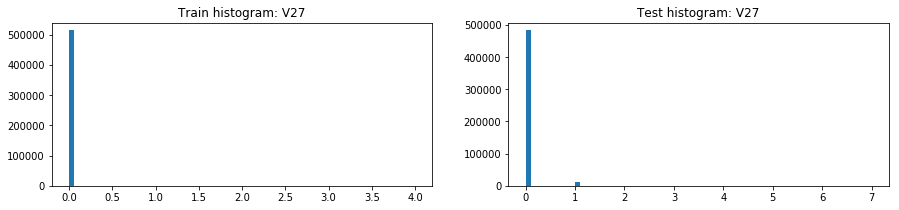

V27          Train      ...         Test public   Test private
0           count  514467.000000      ...        93884.000000  400219.000000
1            mean       0.000776      ...            0.001204       0.027680
2             std       0.028596      ...            0.034672       0.165495
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       0.000000
7             max       4.000000      ...            1.000000       7.000000
8   unique values       5.000000      ...            3.000000       9.000000
9            NaNs   76073.000000      ...         7455.000000    5134.000000
10     NaNs share       0.128800      ...            0.073600       0.012700

[11 rows x 7 columns]

V27  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 514076      ...             16776         482965
1 -999.0                  76073      ...              3887          12589
2    1.0                    385      ...                 0          11103
3    2.0                      5      ...                 0             25
4    4.0                      1      ...                 0              2

[5 rows x 5 columns]

V27  Count in train      ...        Sum target (desc)  Count in test
0    0.0          514076      ...                    16776         482965
1 -999.0           76073      ...                     3887          12589
2    1.0             385      ...                        0          11103
3    2.0               5      ...                        0             25
4    4.0               1      ...                        0              2

[5 rows x 5 columns]

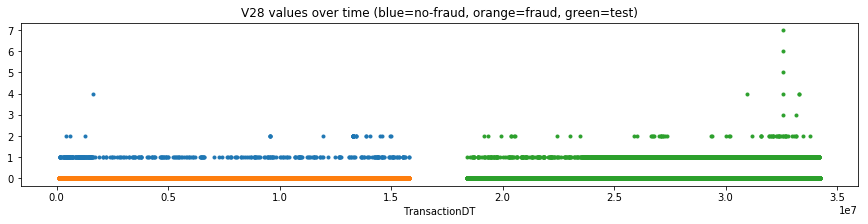

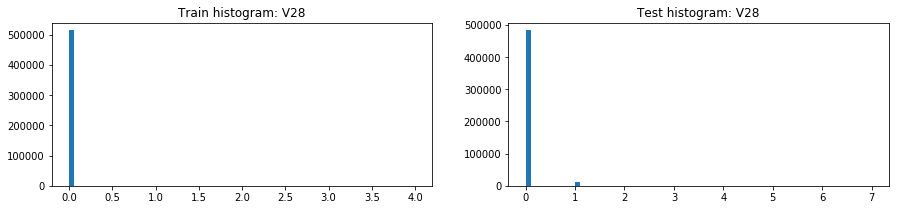

V28          Train      ...         Test public   Test private
0           count  514467.000000      ...        93884.000000  400219.000000
1            mean       0.000830      ...            0.001289       0.027770
2             std       0.031133      ...            0.037899       0.166263
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       0.000000
7             max       4.000000      ...            2.000000       7.000000
8   unique values       5.000000      ...            4.000000       9.000000
9            NaNs   76073.000000      ...         7455.000000    5134.000000
10     NaNs share       0.128800      ...            0.073600       0.012700

[11 rows x 7 columns]

V28  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 514073      ...             16776         482958
1 -999.0                  76073      ...              3887          12589
2    1.0                    363      ...                 0          11075
3    2.0                     30      ...                 0             60
4    4.0                      1      ...                 0              4

[5 rows x 5 columns]

V28  Count in train      ...        Sum target (desc)  Count in test
0    0.0          514073      ...                    16776         482958
1 -999.0           76073      ...                     3887          12589
2    1.0             363      ...                        0          11075
3    2.0              30      ...                        0             60
4    4.0               1      ...                        0              4

[5 rows x 5 columns]

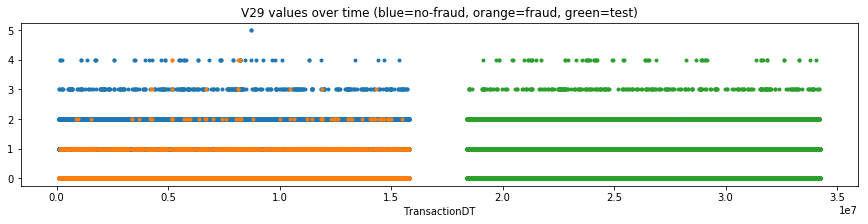

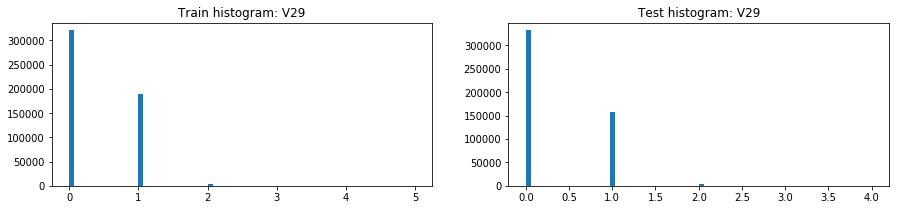

V29          Train      ...         Test public   Test private
0           count  514467.000000      ...        93884.000000  400219.000000
1            mean       0.387840      ...            0.402518       0.321861
2             std       0.510652      ...            0.511875       0.487516
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       5.000000      ...            4.000000       4.000000
8   unique values       7.000000      ...            6.000000       6.000000
9            NaNs   76073.000000      ...         7455.000000    5134.000000
10     NaNs share       0.128800      ...            0.073600       0.012700

[11 rows x 7 columns]

V29  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 320407      ...             15401       331940.0
1    1.0                 189060      ...              1293       158112.0
2 -999.0                  76073      ...              3887        12589.0
3    2.0                   4590      ...                69         3717.0
4    3.0                    351      ...                 9          274.0
5    4.0                     57      ...                 4           59.0
6    5.0                      2      ...                 0            NaN

[7 rows x 5 columns]

V29  Count in train      ...        Sum target (desc)  Count in test
0    0.0          320407      ...                    15401       331940.0
1 -999.0           76073      ...                     3887        12589.0
2    1.0          189060      ...                     1293       158112.0
3    2.0            4590      ...                       69         3717.0
4    3.0             351      ...                        9          274.0
5    4.0              57      ...                        4           59.0
6    5.0               2      ...                        0            NaN

[7 rows x 5 columns]

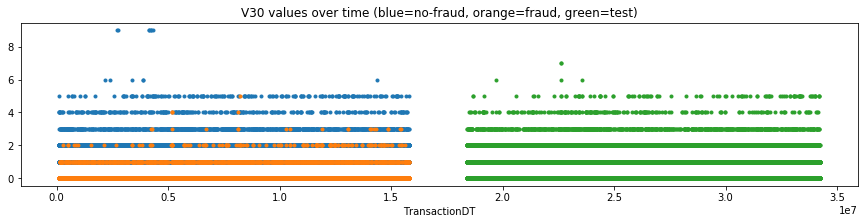

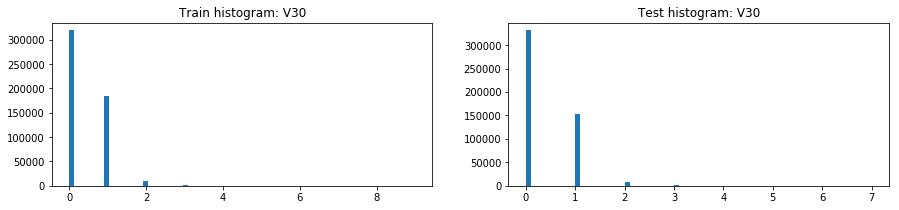

V30          Train      ...         Test public   Test private
0           count  514467.000000      ...        93884.000000  400219.000000
1            mean       0.406436      ...            0.420253       0.336093
2             std       0.554311      ...            0.549402       0.525273
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       9.000000      ...            6.000000       7.000000
8   unique values       9.000000      ...            8.000000       9.000000
9            NaNs   76073.000000      ...         7455.000000    5134.000000
10     NaNs share       0.128800      ...            0.073600       0.012700

[11 rows x 7 columns]

V30  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 319017      ...             15363       331104.0
1    1.0                 184133      ...              1257       153788.0
2 -999.0                  76073      ...              3887        12589.0
3    2.0                   9685      ...               133         7899.0
4    3.0                   1160      ...                19          979.0
5    4.0                    279      ...                 3          225.0
6    5.0                    180      ...                 1          102.0
7    9.0                      7      ...                 0            NaN
8    6.0                      6      ...                 0            3.0

[9 rows x 5 columns]

V30  Count in train      ...        Sum target (desc)  Count in test
0    0.0          319017      ...                    15363       331104.0
1 -999.0           76073      ...                     3887        12589.0
2    1.0          184133      ...                     1257       153788.0
3    2.0            9685      ...                      133         7899.0
4    3.0            1160      ...                       19          979.0
5    4.0             279      ...                        3          225.0
6    5.0             180      ...                        1          102.0
7    9.0               7      ...                        0            NaN
8    6.0               6      ...                        0            3.0

[9 rows x 5 columns]

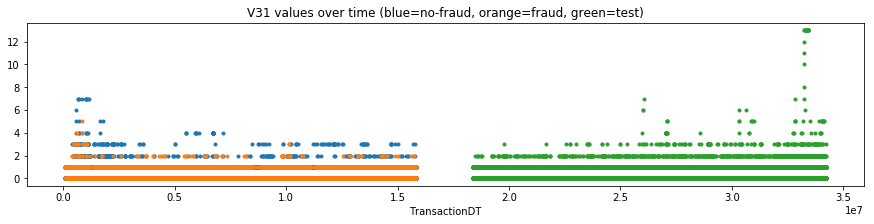

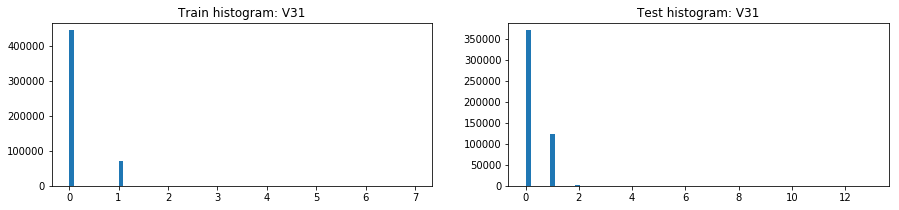

V31          Train      ...         Test public   Test private
0           count  514467.000000      ...        93884.000000  400219.000000
1            mean       0.140761      ...            0.120873       0.287135
2             std       0.355793      ...            0.328844       0.471455
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       1.000000
7             max       7.000000      ...            3.000000      13.000000
8   unique values       9.000000      ...            5.000000      14.000000
9            NaNs   76073.000000      ...         7455.000000    5134.000000
10     NaNs share       0.128800      ...            0.073600       0.012700

[11 rows x 7 columns]

V31  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 443045      ...              9239         369773
1 -999.0                  76073      ...              3887          12589
2    1.0                  70729      ...              7429         122946
3    2.0                    477      ...                91           1120
4    3.0                    167      ...                14            176
5    4.0                     33      ...                 2             36
6    7.0                     10      ...                 0              3
7    5.0                      5      ...                 1             24
8    6.0                      1      ...                 0              5

[9 rows x 5 columns]

V31  Count in train      ...        Sum target (desc)  Count in test
0    0.0          443045      ...                     9239         369773
1    1.0           70729      ...                     7429         122946
2 -999.0           76073      ...                     3887          12589
3    2.0             477      ...                       91           1120
4    3.0             167      ...                       14            176
5    4.0              33      ...                        2             36
6    5.0               5      ...                        1             24
7    7.0              10      ...                        0              3
8    6.0               1      ...                        0              5

[9 rows x 5 columns]

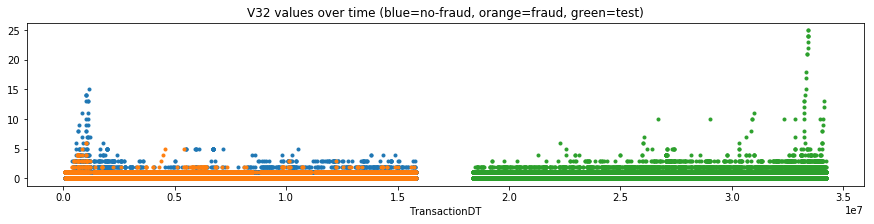

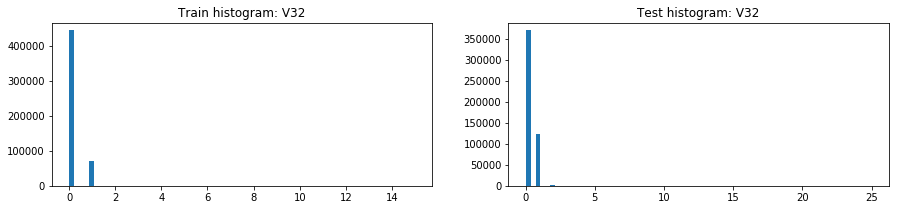

V32          Train      ...         Test public   Test private
0           count  514467.000000      ...        93884.000000  400219.000000
1            mean       0.142417      ...            0.121512       0.290374
2             std       0.368278      ...            0.331641       0.492587
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       1.000000
7             max      15.000000      ...            4.000000      25.000000
8   unique values      16.000000      ...            6.000000      24.000000
9            NaNs   76073.000000      ...         7455.000000    5134.000000
10     NaNs share       0.128800      ...            0.073600       0.012700

[11 rows x 7 columns]

V32  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 443018      ...              9239         369709
1 -999.0                  76073      ...              3887          12589
2    1.0                  70307      ...              7365         122196
3    2.0                    790      ...               128           1723
4    3.0                    226      ...                24            324
5    4.0                     51      ...                15             78
6    5.0                     44      ...                 3             26
7    6.0                      8      ...                 2              8
8    7.0                      5      ...                 0              4
9    8.0                      4      ...                 0              4

[10 rows x 5 columns]

V32  Count in train      ...        Sum target (desc)  Count in test
0    0.0          443018      ...                     9239         369709
1    1.0           70307      ...                     7365         122196
2 -999.0           76073      ...                     3887          12589
3    2.0             790      ...                      128           1723
4    3.0             226      ...                       24            324
5    4.0              51      ...                       15             78
6    5.0              44      ...                        3             26
7    6.0               8      ...                        2              8
8    7.0               5      ...                        0              4
9    8.0               4      ...                        0              4

[10 rows x 5 columns]

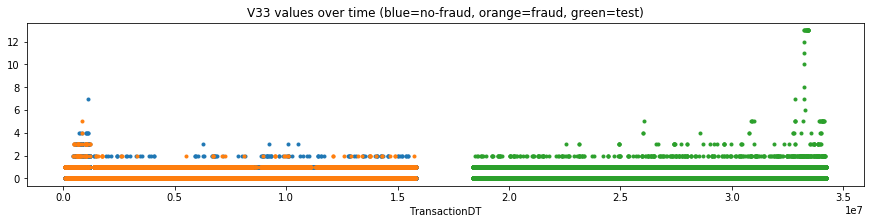

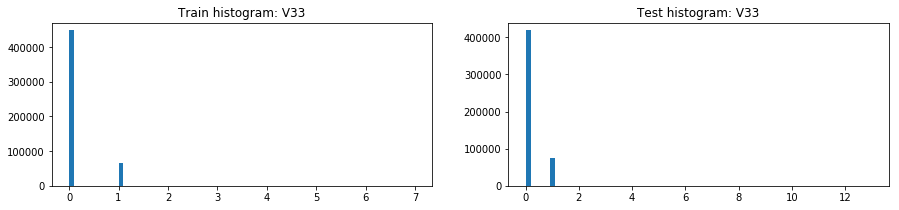

V33          Train      ...         Test public   Test private
0           count  514467.000000      ...        93884.000000  400219.000000
1            mean       0.130693      ...            0.119903       0.163213
2             std       0.340900      ...            0.326616       0.384108
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       0.000000
7             max       7.000000      ...            2.000000      13.000000
8   unique values       8.000000      ...            4.000000      14.000000
9            NaNs   76073.000000      ...         7455.000000    5134.000000
10     NaNs share       0.128800      ...            0.073600       0.012700

[11 rows x 7 columns]

V33  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 447769      ...              9000         418368
1 -999.0                  76073      ...              3887          12589
2    1.0                  66267      ...              7672          75243
3    2.0                    338      ...                79            383
4    3.0                     82      ...                23             52
5    4.0                      9      ...                 1             13
6    5.0                      1      ...                 1             21
7    7.0                      1      ...                 0              2

[8 rows x 5 columns]

V33  Count in train      ...        Sum target (desc)  Count in test
0    0.0          447769      ...                     9000         418368
1    1.0           66267      ...                     7672          75243
2 -999.0           76073      ...                     3887          12589
3    2.0             338      ...                       79            383
4    3.0              82      ...                       23             52
5    4.0               9      ...                        1             13
6    5.0               1      ...                        1             21
7    7.0               1      ...                        0              2

[8 rows x 5 columns]

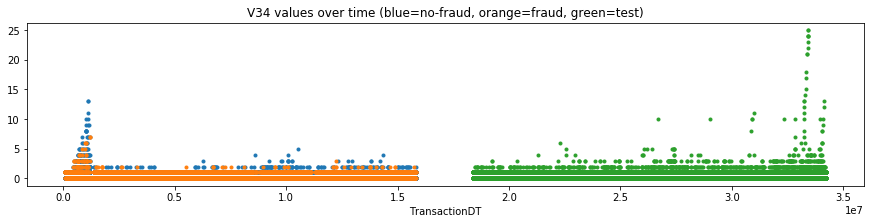

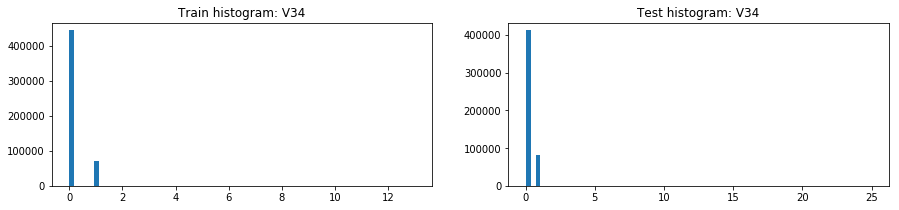

V34          Train      ...         Test public   Test private
0           count  514467.000000      ...        93884.000000  400219.000000
1            mean       0.139154      ...            0.134709       0.178362
2             std       0.357549      ...            0.343777       0.416053
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       0.000000
7             max      13.000000      ...            4.000000      25.000000
8   unique values      14.000000      ...            6.000000      24.000000
9            NaNs   76073.000000      ...         7455.000000    5134.000000
10     NaNs share       0.128800      ...            0.073600       0.012700

[11 rows x 7 columns]

V34  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 443989      ...              8760         411616
1 -999.0                  76073      ...              3887          12589
2    1.0                  69776      ...              7883          81672
3    2.0                    496      ...                84            566
4    3.0                    129      ...                36            153
5    4.0                     34      ...                 6             36
6    5.0                     14      ...                 2             17
7    6.0                      8      ...                 3              6
8    7.0                      7      ...                 2              2
9    8.0                      6      ...                 0              4

[10 rows x 5 columns]

V34  Count in train      ...        Sum target (desc)  Count in test
0    0.0          443989      ...                     8760         411616
1    1.0           69776      ...                     7883          81672
2 -999.0           76073      ...                     3887          12589
3    2.0             496      ...                       84            566
4    3.0             129      ...                       36            153
5    4.0              34      ...                        6             36
6    6.0               8      ...                        3              6
7    5.0              14      ...                        2             17
8    7.0               7      ...                        2              2
9    8.0               6      ...                        0              4

[10 rows x 5 columns]

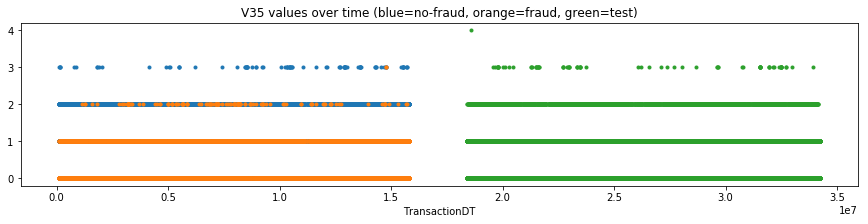

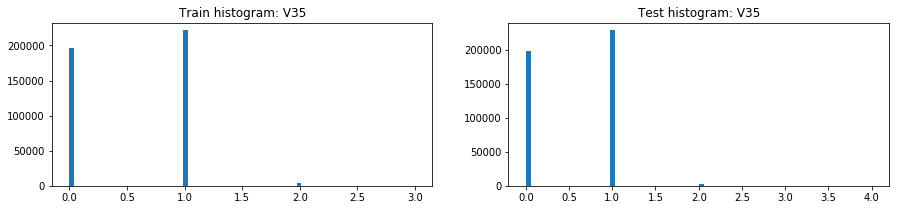

V35          Train      ...         Test public   Test private
0           count  421571.000000      ...        80247.000000  349591.000000
1            mean       0.542594      ...            0.647987       0.520297
2             std       0.516010      ...            0.494321       0.511946
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       3.000000      ...            4.000000       3.000000
8   unique values       5.000000      ...            6.000000       5.000000
9            NaNs  168969.000000      ...        21092.000000   55762.000000
10     NaNs share       0.286100      ...            0.208100       0.137600

[11 rows x 7 columns]

V35  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 221387      ...              4578         228457
1    0.0                 196551      ...              9859         198704
2 -999.0                 168969      ...              6096          76854
3    2.0                   3544      ...               128           2597
4    3.0                     89      ...                 2             78

[5 rows x 5 columns]

V35  Count in train      ...        Sum target (desc)  Count in test
0    0.0          196551      ...                     9859         198704
1 -999.0          168969      ...                     6096          76854
2    1.0          221387      ...                     4578         228457
3    2.0            3544      ...                      128           2597
4    3.0              89      ...                        2             78

[5 rows x 5 columns]

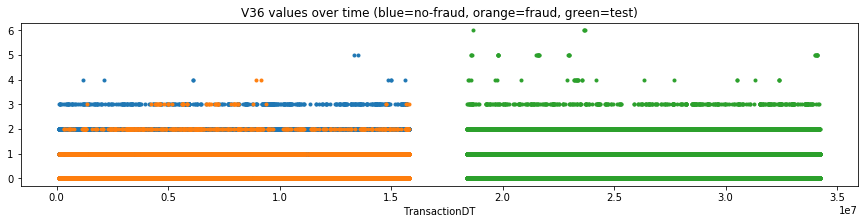

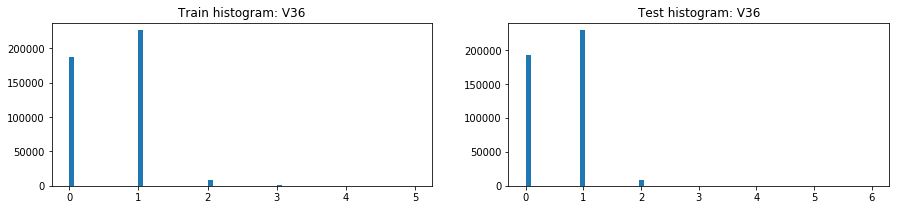

V36          Train      ...         Test public   Test private
0           count  421571.000000      ...        80247.000000  349591.000000
1            mean       0.579198      ...            0.684860       0.547119
2             std       0.539039      ...            0.520035       0.538810
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       5.000000      ...            6.000000       6.000000
8   unique values       7.000000      ...            8.000000       8.000000
9            NaNs  168969.000000      ...        21092.000000   55762.000000
10     NaNs share       0.286100      ...            0.208100       0.137600

[11 rows x 7 columns]

V36  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 226024      ...              4561         228956
1    0.0                 186733      ...              9545         192534
2 -999.0                 168969      ...              6096          76854
3    2.0                   8307      ...               409           7863
4    3.0                    495      ...                50            427
5    4.0                     10      ...                 2             27
6    5.0                      2      ...                 0             26

[7 rows x 5 columns]

V36  Count in train      ...        Sum target (desc)  Count in test
0    0.0          186733      ...                     9545         192534
1 -999.0          168969      ...                     6096          76854
2    1.0          226024      ...                     4561         228956
3    2.0            8307      ...                      409           7863
4    3.0             495      ...                       50            427
5    4.0              10      ...                        2             27
6    5.0               2      ...                        0             26

[7 rows x 5 columns]

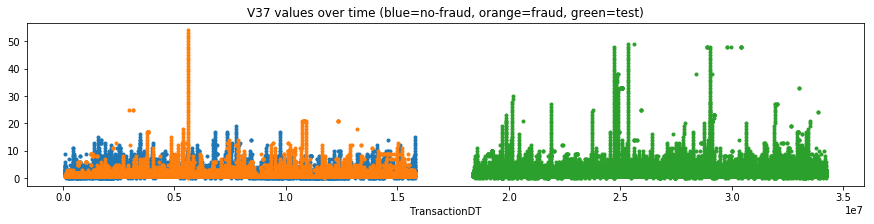

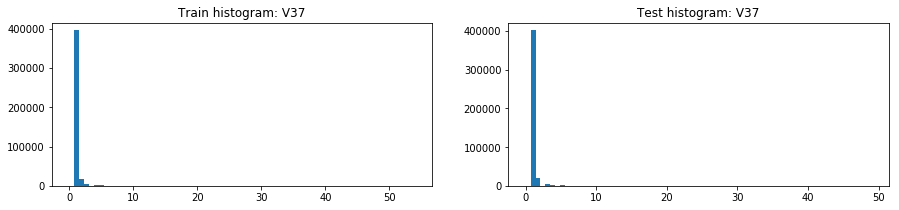

V37          Train      ...         Test public   Test private
0           count  421571.000000      ...        80247.000000  349591.000000
1            mean       1.108065      ...            1.115630       1.143102
2             std       0.690571      ...            0.728676       1.055493
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max      54.000000      ...           30.000000      49.000000
8   unique values      56.000000      ...           32.000000      51.000000
9            NaNs  168969.000000      ...        21092.000000   55762.000000
10     NaNs share       0.286100      ...            0.208100       0.137600

[11 rows x 7 columns]

V37  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 395228      ...             10822       401275.0
1 -999.0                 168969      ...              6096        76854.0
2    2.0                  18453      ...              1956        19231.0
3    3.0                   3801      ...               744         4231.0
4    4.0                   1474      ...               288         1778.0
5    5.0                    796      ...               159          902.0
6    6.0                    420      ...               128          555.0
7    7.0                    327      ...                97          362.0
8    0.0                    325      ...                 2          191.0
9    8.0                    193      ...                67          255.0

[10 rows x 5 columns]

V37  Count in train      ...        Sum target (desc)  Count in test
0    1.0          395228      ...                    10822         401275
1 -999.0          168969      ...                     6096          76854
2    2.0           18453      ...                     1956          19231
3    3.0            3801      ...                      744           4231
4    4.0            1474      ...                      288           1778
5    5.0             796      ...                      159            902
6    6.0             420      ...                      128            555
7    7.0             327      ...                       97            362
8    9.0             168      ...                       76            151
9    8.0             193      ...                       67            255

[10 rows x 5 columns]

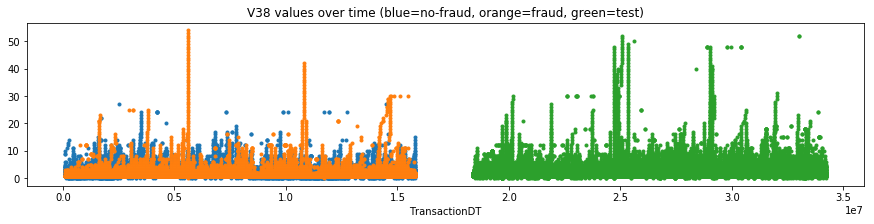

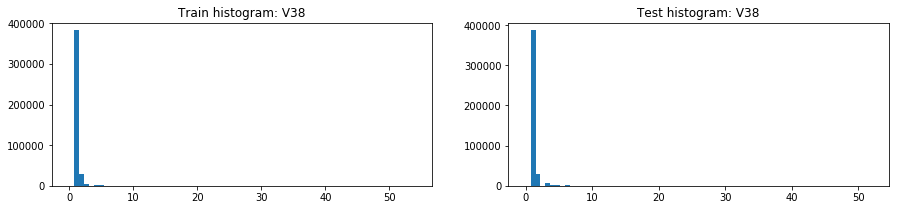

V38         Train      ...         Test public   Test private
0           count  421571.00000      ...        80247.000000  349591.000000
1            mean       1.16240      ...            1.177091       1.216539
2             std       0.85892      ...            0.850781       1.247379
3             min       0.00000      ...            0.000000       0.000000
4             25%       1.00000      ...            1.000000       1.000000
5             50%       1.00000      ...            1.000000       1.000000
6             75%       1.00000      ...            1.000000       1.000000
7             max      54.00000      ...           30.000000      52.000000
8   unique values      56.00000      ...           32.000000      54.000000
9            NaNs  168969.00000      ...        21092.000000   55762.000000
10     NaNs share       0.28610      ...            0.208100       0.137600

[11 rows x 7 columns]

V38  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 382093      ...              9751       386613.0
1 -999.0                 168969      ...              6096        76854.0
2    2.0                  28073      ...              2301        28514.0
3    3.0                   5616      ...               982         6793.0
4    4.0                   2208      ...               454         2794.0
5    5.0                   1129      ...               246         1516.0
6    6.0                    615      ...               175          854.0
7    7.0                    426      ...               146          555.0
8    0.0                    325      ...                 2          187.0
9    8.0                    263      ...                78          398.0

[10 rows x 5 columns]

V38  Count in train      ...        Sum target (desc)  Count in test
0    1.0          382093      ...                     9751         386613
1 -999.0          168969      ...                     6096          76854
2    2.0           28073      ...                     2301          28514
3    3.0            5616      ...                      982           6793
4    4.0            2208      ...                      454           2794
5    5.0            1129      ...                      246           1516
6    6.0             615      ...                      175            854
7    7.0             426      ...                      146            555
8    8.0             263      ...                       78            398
9   10.0             144      ...                       65            358

[10 rows x 5 columns]

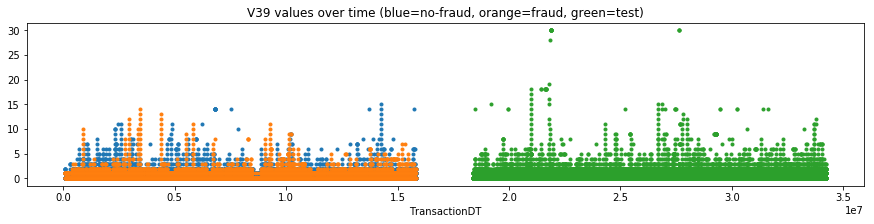

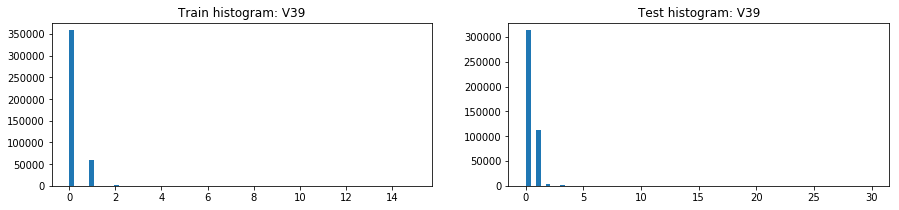

V39          Train      ...         Test public   Test private
0           count  421571.000000      ...        80247.000000  349591.000000
1            mean       0.166076      ...            0.144766       0.326939
2             std       0.451956      ...            0.514928       0.579135
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       1.000000
7             max      15.000000      ...           19.000000      30.000000
8   unique values      17.000000      ...           21.000000      19.000000
9            NaNs  168969.000000      ...        21092.000000   55762.000000
10     NaNs share       0.286100      ...            0.208100       0.137600

[11 rows x 7 columns]

V39  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 357994      ...              7291         313015
1 -999.0                 168969      ...              6096          76854
2    1.0                  59921      ...              6097         111693
3    2.0                   2497      ...               736           3720
4    3.0                    566      ...               232            679
5    4.0                    253      ...                88            277
6    5.0                    108      ...                38            176
7    6.0                     82      ...                27             75
8    7.0                     48      ...                14             44
9    8.0                     37      ...                15             35

[10 rows x 5 columns]

V39  Count in train      ...        Sum target (desc)  Count in test
0    0.0          357994      ...                     7291         313015
1    1.0           59921      ...                     6097         111693
2 -999.0          168969      ...                     6096          76854
3    2.0            2497      ...                      736           3720
4    3.0             566      ...                      232            679
5    4.0             253      ...                       88            277
6    5.0             108      ...                       38            176
7    6.0              82      ...                       27             75
8    8.0              37      ...                       15             35
9    7.0              48      ...                       14             44

[10 rows x 5 columns]

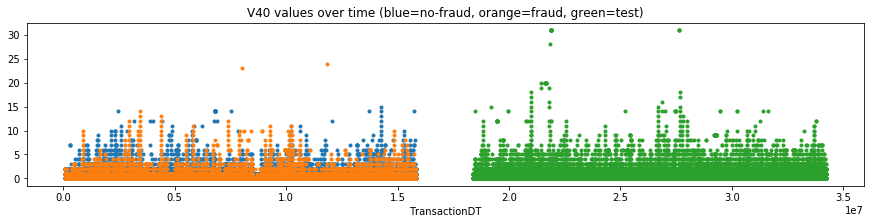

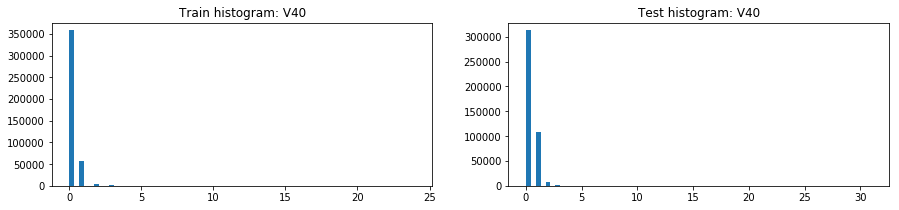

V40          Train      ...         Test public   Test private
0           count  421571.000000      ...        80247.000000  349591.000000
1            mean       0.177145      ...            0.163221       0.345318
2             std       0.505786      ...            0.607201       0.641204
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       1.000000
7             max      24.000000      ...           20.000000      31.000000
8   unique values      19.000000      ...           22.000000      22.000000
9            NaNs  168969.000000      ...        21092.000000   55762.000000
10     NaNs share       0.286100      ...            0.208100       0.137600

[11 rows x 7 columns]

V40  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 357837      ...              7265       312763.0
1 -999.0                 168969      ...              6096        76854.0
2    1.0                  57473      ...              5514       107469.0
3    2.0                   4230      ...              1020         6757.0
4    3.0                   1046      ...               417         1415.0
5    4.0                    400      ...               143          591.0
6    5.0                    209      ...                57          320.0
7    6.0                    145      ...                61          183.0
8    7.0                     78      ...                23           88.0
9    8.0                     50      ...                22           84.0

[10 rows x 5 columns]

V40  Count in train      ...        Sum target (desc)  Count in test
0    0.0          357837      ...                     7265         312763
1 -999.0          168969      ...                     6096          76854
2    1.0           57473      ...                     5514         107469
3    2.0            4230      ...                     1020           6757
4    3.0            1046      ...                      417           1415
5    4.0             400      ...                      143            591
6    6.0             145      ...                       61            183
7    5.0             209      ...                       57            320
8    7.0              78      ...                       23             88
9    8.0              50      ...                       22             84

[10 rows x 5 columns]

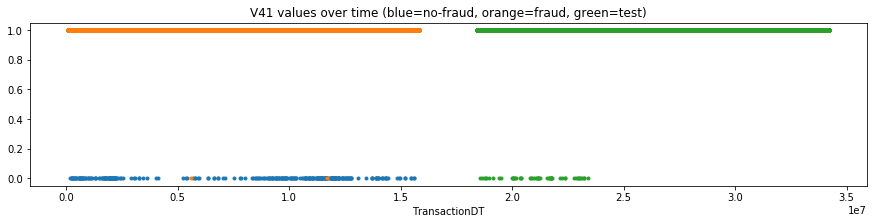

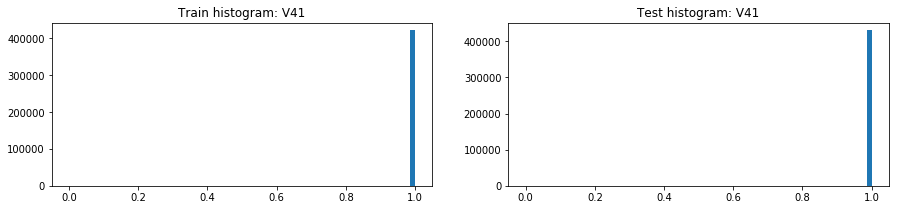

V41          Train      ...         Test public   Test private
0           count  421571.000000      ...        80247.000000  349591.000000
1            mean       0.999269      ...            0.999539       0.999960
2             std       0.027020      ...            0.021468       0.006328
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       1.000000      ...            1.000000       1.000000
8   unique values       3.000000      ...            3.000000       3.000000
9            NaNs  168969.000000      ...        21092.000000   55762.000000
10     NaNs share       0.286100      ...            0.208100       0.137600

[11 rows x 7 columns]

V41  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 421263      ...             14565         429786
1 -999.0                 168969      ...              6096          76854
2    0.0                    308      ...                 2             51

[3 rows x 5 columns]

V41  Count in train      ...        Sum target (desc)  Count in test
0    1.0          421263      ...                    14565         429786
1 -999.0          168969      ...                     6096          76854
2    0.0             308      ...                        2             51

[3 rows x 5 columns]

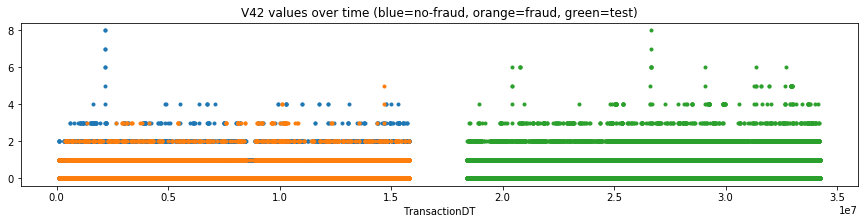

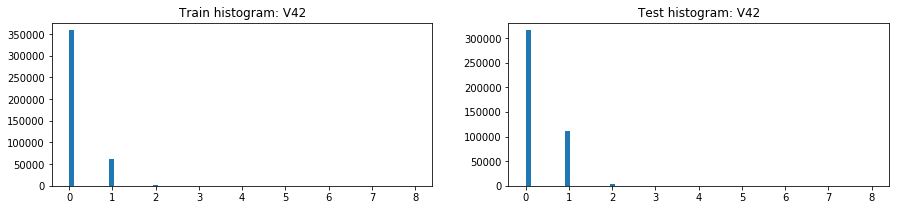

V42          Train      ...         Test public   Test private
0           count  421571.000000      ...        80247.000000  349591.000000
1            mean       0.156118      ...            0.129538       0.310174
2             std       0.382896      ...            0.360598       0.491219
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       1.000000
7             max       8.000000      ...            6.000000       8.000000
8   unique values      10.000000      ...            8.000000      10.000000
9            NaNs  168969.000000      ...        21092.000000   55762.000000
10     NaNs share       0.286100      ...            0.208100       0.137600

[11 rows x 7 columns]

V42  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 358439      ...              7401         315401
1 -999.0                 168969      ...              6096          76854
2    1.0                  60801      ...              6558         110831
3    2.0                   2037      ...               528           3027
4    3.0                    256      ...                76            427
5    4.0                     30      ...                 3            108
6    5.0                      2      ...                 1             30
7    6.0                      2      ...                 0             11
8    7.0                      2      ...                 0              1
9    8.0                      2      ...                 0              1

[10 rows x 5 columns]

V42  Count in train      ...        Sum target (desc)  Count in test
0    0.0          358439      ...                     7401         315401
1    1.0           60801      ...                     6558         110831
2 -999.0          168969      ...                     6096          76854
3    2.0            2037      ...                      528           3027
4    3.0             256      ...                       76            427
5    4.0              30      ...                        3            108
6    5.0               2      ...                        1             30
7    6.0               2      ...                        0             11
8    7.0               2      ...                        0              1
9    8.0               2      ...                        0              1

[10 rows x 5 columns]

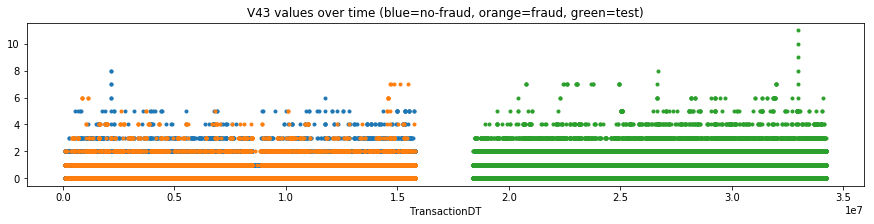

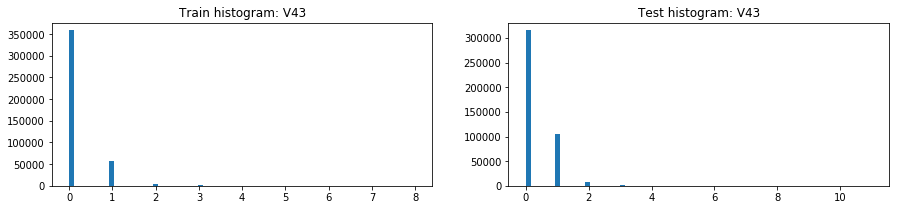

V43          Train      ...         Test public   Test private
0           count  421571.000000      ...        80247.000000  349591.000000
1            mean       0.168942      ...            0.146024       0.332972
2             std       0.433359      ...            0.427083       0.556653
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       1.000000
7             max       8.000000      ...            7.000000      11.000000
8   unique values      10.000000      ...            9.000000      13.000000
9            NaNs  168969.000000      ...        21092.000000   55762.000000
10     NaNs share       0.286100      ...            0.208100       0.137600

[11 rows x 7 columns]

V43  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 358261      ...              7372         315056
1 -999.0                 168969      ...              6096          76854
2    1.0                  56929      ...              5830         104444
3    2.0                   5234      ...               985           8167
4    3.0                    885      ...               287           1632
5    4.0                    174      ...                69            359
6    5.0                     66      ...                 9            104
7    6.0                     13      ...                10             44
8    7.0                      7      ...                 5             26
9    8.0                      2      ...                 0              2

[10 rows x 5 columns]

V43  Count in train      ...        Sum target (desc)  Count in test
0    0.0          358261      ...                     7372         315056
1 -999.0          168969      ...                     6096          76854
2    1.0           56929      ...                     5830         104444
3    2.0            5234      ...                      985           8167
4    3.0             885      ...                      287           1632
5    4.0             174      ...                       69            359
6    6.0              13      ...                       10             44
7    5.0              66      ...                        9            104
8    7.0               7      ...                        5             26
9    8.0               2      ...                        0              2

[10 rows x 5 columns]

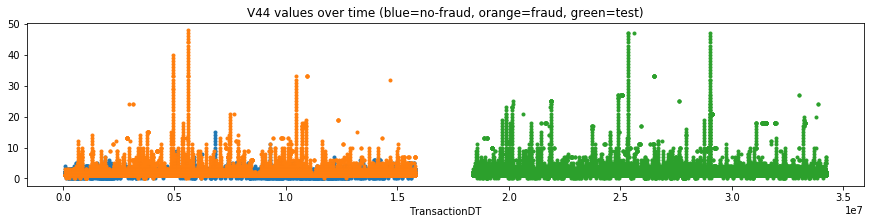

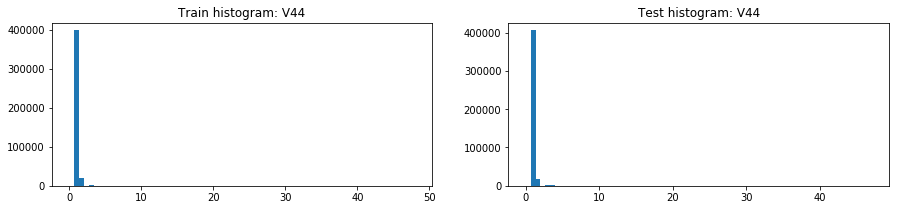

V44          Train      ...         Test public   Test private
0           count  421571.000000      ...        80247.000000  349591.000000
1            mean       1.083891      ...            1.109711       1.101916
2             std       0.639143      ...            0.753380       0.862887
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max      48.000000      ...           25.000000      47.000000
8   unique values      50.000000      ...           27.000000      49.000000
9            NaNs  168969.000000      ...        21092.000000   55762.000000
10     NaNs share       0.286100      ...            0.208100       0.137600

[11 rows x 7 columns]

V44  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 397653      ...             10345       405518.0
1 -999.0                 168969      ...              6096        76854.0
2    2.0                  19434      ...              1979        18884.0
3    3.0                   2242      ...               740         2588.0
4    4.0                    615      ...               422          868.0
5    0.0                    441      ...                34          202.0
6    5.0                    319      ...               244          341.0
7    6.0                    208      ...               169          219.0
8    7.0                    138      ...               131          167.0
9    9.0                    102      ...                98          109.0

[10 rows x 5 columns]

V44  Count in train      ...        Sum target (desc)  Count in test
0    1.0          397653      ...                    10345         405518
1 -999.0          168969      ...                     6096          76854
2    2.0           19434      ...                     1979          18884
3    3.0            2242      ...                      740           2588
4    4.0             615      ...                      422            868
5    5.0             319      ...                      244            341
6    6.0             208      ...                      169            219
7    7.0             138      ...                      131            167
8    9.0             102      ...                       98            109
9    8.0              83      ...                       77             98

[10 rows x 5 columns]

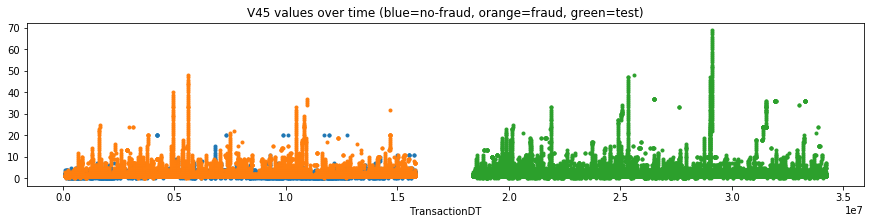

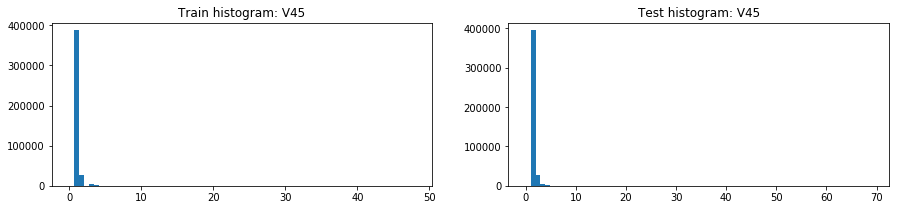

V45          Train      ...         Test public   Test private
0           count  421571.000000      ...        80247.000000  349591.000000
1            mean       1.120779      ...            1.156056       1.144343
2             std       0.729774      ...            0.858947       1.119463
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max      48.000000      ...           25.000000      69.000000
8   unique values      50.000000      ...           27.000000      71.000000
9            NaNs  168969.000000      ...        21092.000000   55762.000000
10     NaNs share       0.286100      ...            0.208100       0.137600

[11 rows x 7 columns]

V45  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 387027      ...              9613         394651
1 -999.0                 168969      ...              6096          76854
2    2.0                  28125      ...              2166          27474
3    3.0                   3472      ...               801           3956
4    4.0                    906      ...               562           1230
5    5.0                    438      ...               321            520
6    0.0                    412      ...                25            195
7    6.0                    253      ...               206            365
8    7.0                    214      ...               197            202
9    9.0                    143      ...               137            117

[10 rows x 5 columns]

V45  Count in train      ...        Sum target (desc)  Count in test
0    1.0          387027      ...                     9613         394651
1 -999.0          168969      ...                     6096          76854
2    2.0           28125      ...                     2166          27474
3    3.0            3472      ...                      801           3956
4    4.0             906      ...                      562           1230
5    5.0             438      ...                      321            520
6    6.0             253      ...                      206            365
7    7.0             214      ...                      197            202
8    9.0             143      ...                      137            117
9    8.0             132      ...                      122            134

[10 rows x 5 columns]

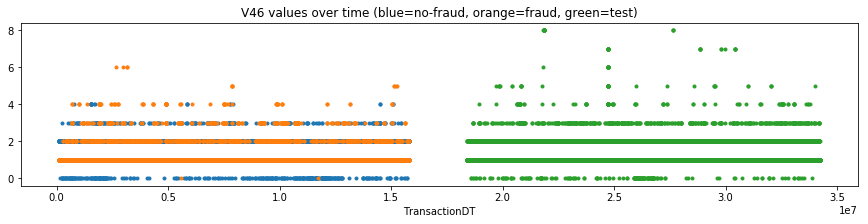

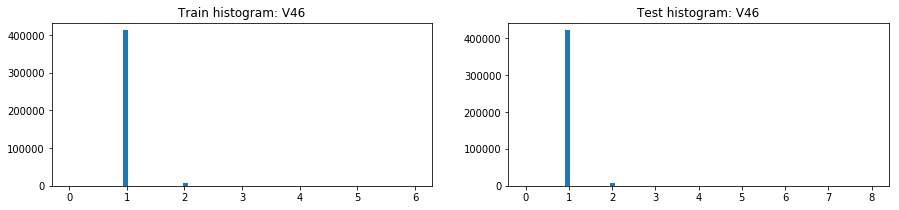

V46          Train      ...         Test public   Test private
0           count  421571.000000      ...        80247.000000  349591.000000
1            mean       1.022286      ...            1.020910       1.022509
2             std       0.166719      ...            0.166885       0.177915
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       6.000000      ...            6.000000       8.000000
8   unique values       8.000000      ...            8.000000      10.000000
9            NaNs  168969.000000      ...        21092.000000   55762.000000
10     NaNs share       0.286100      ...            0.208100       0.137600

[11 rows x 7 columns]

V46  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 412247      ...             13110         421088
1 -999.0                 168969      ...              6096          76854
2    2.0                   8340      ...              1075           7784
3    3.0                    521      ...               287            620
4    0.0                    348      ...                 2            171
5    4.0                    103      ...                81             94
6    5.0                      8      ...                 8             36
7    6.0                      4      ...                 4             10

[8 rows x 5 columns]

V46  Count in train      ...        Sum target (desc)  Count in test
0    1.0          412247      ...                    13110         421088
1 -999.0          168969      ...                     6096          76854
2    2.0            8340      ...                     1075           7784
3    3.0             521      ...                      287            620
4    4.0             103      ...                       81             94
5    5.0               8      ...                        8             36
6    6.0               4      ...                        4             10
7    0.0             348      ...                        2            171

[8 rows x 5 columns]

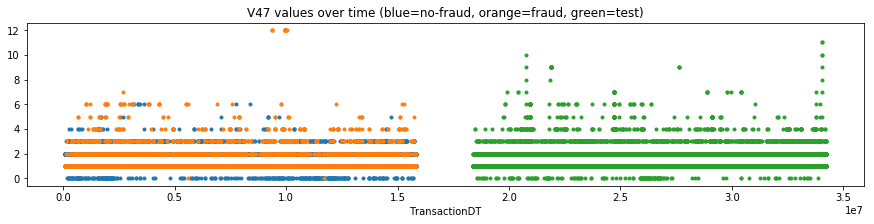

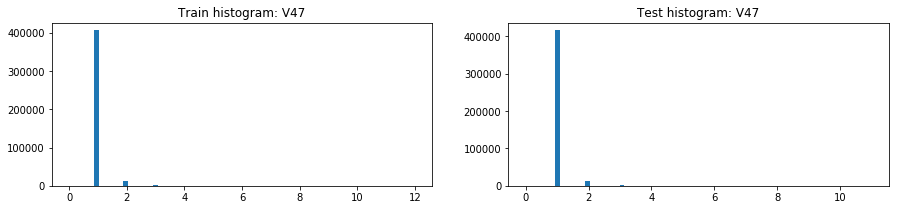

V47          Train      ...         Test public   Test private
0           count  421571.000000      ...        80247.000000  349591.000000
1            mean       1.038515      ...            1.036899       1.038102
2             std       0.231862      ...            0.234845       0.235877
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max      12.000000      ...           10.000000      11.000000
8   unique values      10.000000      ...           12.000000      13.000000
9            NaNs  168969.000000      ...        21092.000000   55762.000000
10     NaNs share       0.286100      ...            0.208100       0.137600

[11 rows x 7 columns]

V47  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 406519      ...             12234       415540.0
1 -999.0                 168969      ...              6096        76854.0
2    2.0                  13389      ...              1628        12651.0
3    3.0                   1018      ...               479         1014.0
4    0.0                    347      ...                 2          169.0
5    4.0                    189      ...               135          284.0
6    6.0                     49      ...                39           55.0
7    5.0                     44      ...                34           75.0
8   12.0                     15      ...                15            NaN
9    7.0                      1      ...                 1           26.0

[10 rows x 5 columns]

V47  Count in train      ...        Sum target (desc)  Count in test
0    1.0          406519      ...                    12234       415540.0
1 -999.0          168969      ...                     6096        76854.0
2    2.0           13389      ...                     1628        12651.0
3    3.0            1018      ...                      479         1014.0
4    4.0             189      ...                      135          284.0
5    6.0              49      ...                       39           55.0
6    5.0              44      ...                       34           75.0
7   12.0              15      ...                       15            NaN
8    0.0             347      ...                        2          169.0
9    7.0               1      ...                        1           26.0

[10 rows x 5 columns]

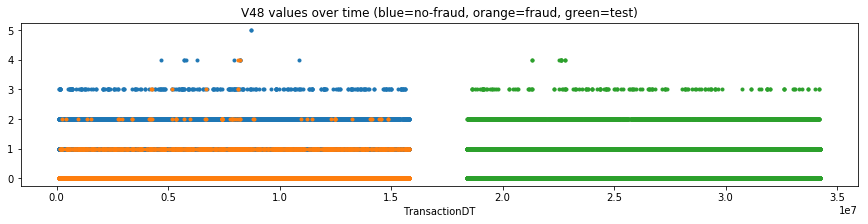

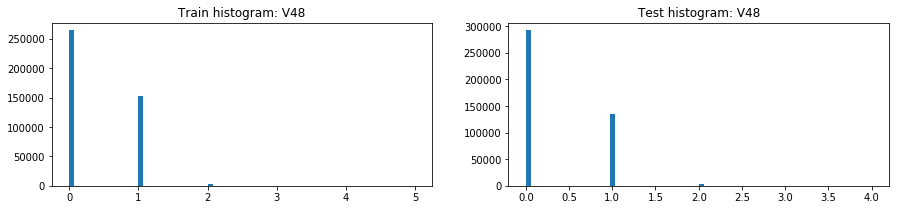

V48          Train      ...         Test public   Test private
0           count  421571.000000      ...        80247.000000  349591.000000
1            mean       0.383174      ...            0.404003       0.310028
2             std       0.508189      ...            0.509856       0.478172
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       5.000000      ...            4.000000       4.000000
8   unique values       7.000000      ...            6.000000       6.000000
9            NaNs  168969.000000      ...        21092.000000   55762.000000
10     NaNs share       0.286100      ...            0.208100       0.137600

[11 rows x 7 columns]

V48  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 264325      ...             13591       292210.0
1 -999.0                 168969      ...              6096        76854.0
2    1.0                 153267      ...               911       134613.0
3    2.0                   3685      ...                57         2862.0
4    3.0                    280      ...                 6          143.0
5    4.0                     12      ...                 2            9.0
6    5.0                      2      ...                 0            NaN

[7 rows x 5 columns]

V48  Count in train      ...        Sum target (desc)  Count in test
0    0.0          264325      ...                    13591       292210.0
1 -999.0          168969      ...                     6096        76854.0
2    1.0          153267      ...                      911       134613.0
3    2.0            3685      ...                       57         2862.0
4    3.0             280      ...                        6          143.0
5    4.0              12      ...                        2            9.0
6    5.0               2      ...                        0            NaN

[7 rows x 5 columns]

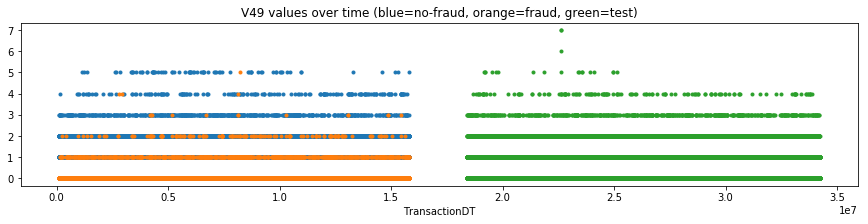

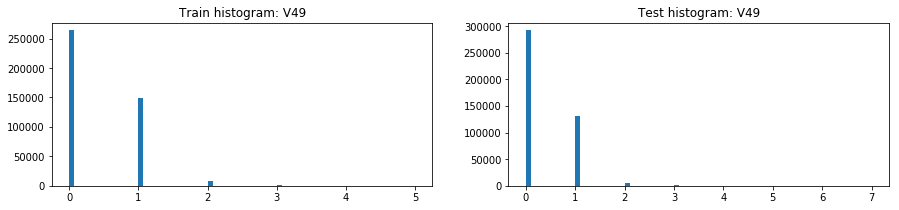

V49          Train      ...         Test public   Test private
0           count  421571.000000      ...        80247.000000  349591.000000
1            mean       0.397724      ...            0.419168       0.321467
2             std       0.542654      ...            0.543378       0.508068
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       5.000000      ...            5.000000       7.000000
8   unique values       7.000000      ...            7.000000       9.000000
9            NaNs  168969.000000      ...        21092.000000   55762.000000
10     NaNs share       0.286100      ...            0.208100       0.137600

[11 rows x 7 columns]

V49  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 263761      ...             13580         291701
1 -999.0                 168969      ...              6096          76854
2    1.0                 149250      ...               837         131223
3    2.0                   7604      ...               133           6131
4    3.0                    691      ...                13            621
5    4.0                    187      ...                 3            140
6    5.0                     78      ...                 1             18

[7 rows x 5 columns]

V49  Count in train      ...        Sum target (desc)  Count in test
0    0.0          263761      ...                    13580         291701
1 -999.0          168969      ...                     6096          76854
2    1.0          149250      ...                      837         131223
3    2.0            7604      ...                      133           6131
4    3.0             691      ...                       13            621
5    4.0             187      ...                        3            140
6    5.0              78      ...                        1             18

[7 rows x 5 columns]

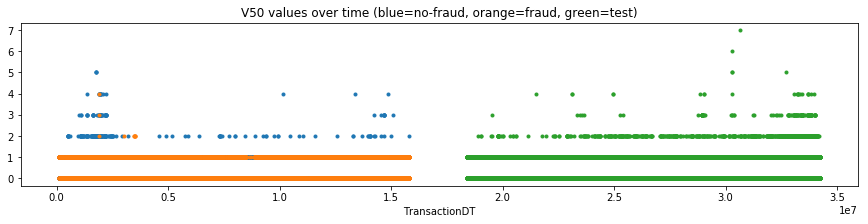

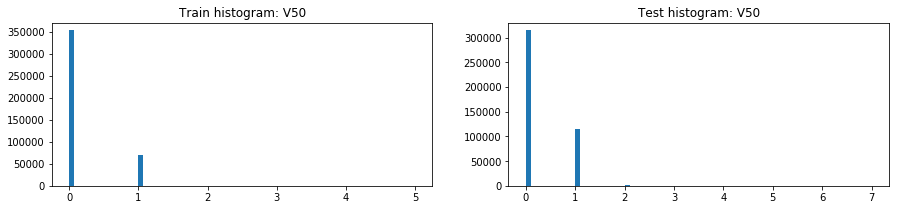

V50          Train      ...         Test public   Test private
0           count  421571.000000      ...        80247.000000  349591.000000
1            mean       0.164746      ...            0.128329       0.304931
2             std       0.373995      ...            0.335722       0.469356
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       1.000000
7             max       5.000000      ...            4.000000       7.000000
8   unique values       7.000000      ...            6.000000       9.000000
9            NaNs  168969.000000      ...        21092.000000   55762.000000
10     NaNs share       0.286100      ...            0.208100       0.137600

[11 rows x 7 columns]

V50  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 352482      ...              6997         314211
1 -999.0                 168969      ...              6096          76854
2    1.0                  68817      ...              7561         114527
3    2.0                    202      ...                 7            959
4    3.0                     52      ...                 1            114
5    4.0                     15      ...                 1             21
6    5.0                      3      ...                 0              3

[7 rows x 5 columns]

V50  Count in train      ...        Sum target (desc)  Count in test
0    1.0           68817      ...                     7561         114527
1    0.0          352482      ...                     6997         314211
2 -999.0          168969      ...                     6096          76854
3    2.0             202      ...                        7            959
4    3.0              52      ...                        1            114
5    4.0              15      ...                        1             21
6    5.0               3      ...                        0              3

[7 rows x 5 columns]

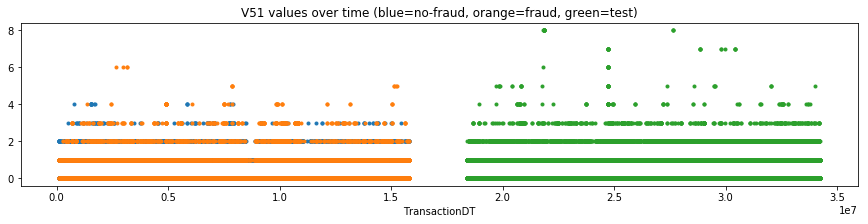

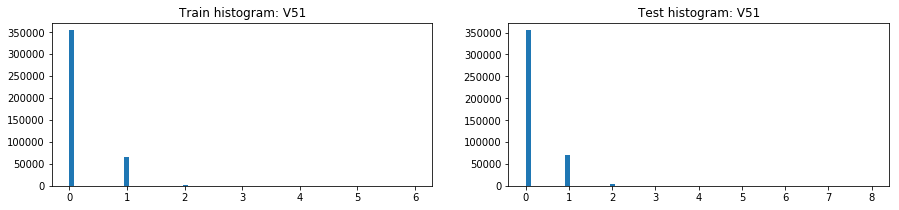

V51          Train      ...         Test public   Test private
0           count  421571.000000      ...        80247.000000  349591.000000
1            mean       0.170579      ...            0.146884       0.194951
2             std       0.403899      ...            0.388564       0.433536
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       0.000000
7             max       6.000000      ...            6.000000       8.000000
8   unique values       8.000000      ...            8.000000      10.000000
9            NaNs  168969.000000      ...        21092.000000   55762.000000
10     NaNs share       0.286100      ...            0.208100       0.137600

[11 rows x 7 columns]

V51  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 353522      ...              6777         354721
1 -999.0                 168969      ...              6096          76854
2    1.0                  64775      ...              6578          71266
3    2.0                   2780      ...               865           3205
4    3.0                    416      ...               286            485
5    4.0                     66      ...                49             83
6    5.0                      8      ...                 8             33
7    6.0                      4      ...                 4             10

[8 rows x 5 columns]

V51  Count in train      ...        Sum target (desc)  Count in test
0    0.0          353522      ...                     6777         354721
1    1.0           64775      ...                     6578          71266
2 -999.0          168969      ...                     6096          76854
3    2.0            2780      ...                      865           3205
4    3.0             416      ...                      286            485
5    4.0              66      ...                       49             83
6    5.0               8      ...                        8             33
7    6.0               4      ...                        4             10

[8 rows x 5 columns]

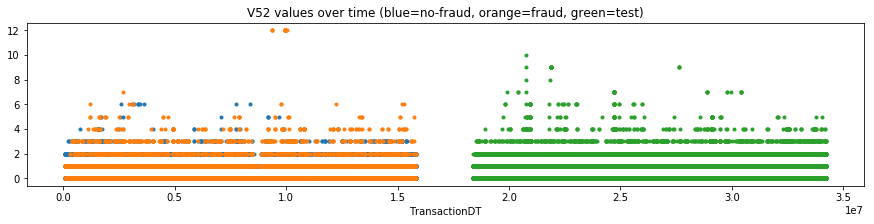

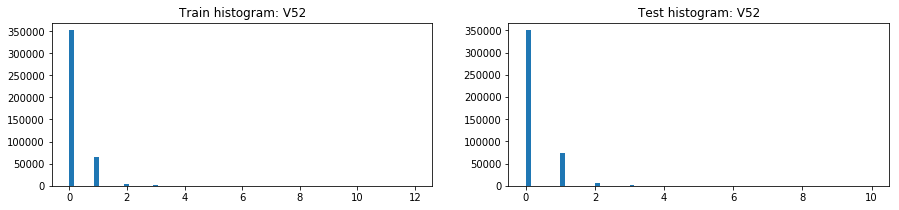

V52          Train      ...         Test public   Test private
0           count  421571.000000      ...        80247.000000  349591.000000
1            mean       0.182695      ...            0.165489       0.214642
2             std       0.439002      ...            0.431574       0.471660
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       0.000000
7             max      12.000000      ...           10.000000       9.000000
8   unique values      10.000000      ...           12.000000      11.000000
9            NaNs  168969.000000      ...        21092.000000   55762.000000
10     NaNs share       0.286100      ...            0.208100       0.137600

[11 rows x 7 columns]

V52  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 351237      ...              6650       349816.0
1 -999.0                 168969      ...              6096        76854.0
2    1.0                  65030      ...              6085        73528.0
3    2.0                   4362      ...              1190         5357.0
4    3.0                    705      ...               450          774.0
5    4.0                    161      ...               135          214.0
6    5.0                     41      ...                32           65.0
7    6.0                     19      ...                 9           42.0
8   12.0                     15      ...                15            NaN
9    7.0                      1      ...                 1           24.0

[10 rows x 5 columns]

V52  Count in train      ...        Sum target (desc)  Count in test
0    0.0          351237      ...                     6650       349816.0
1 -999.0          168969      ...                     6096        76854.0
2    1.0           65030      ...                     6085        73528.0
3    2.0            4362      ...                     1190         5357.0
4    3.0             705      ...                      450          774.0
5    4.0             161      ...                      135          214.0
6    5.0              41      ...                       32           65.0
7   12.0              15      ...                       15            NaN
8    6.0              19      ...                        9           42.0
9    7.0               1      ...                        1           24.0

[10 rows x 5 columns]

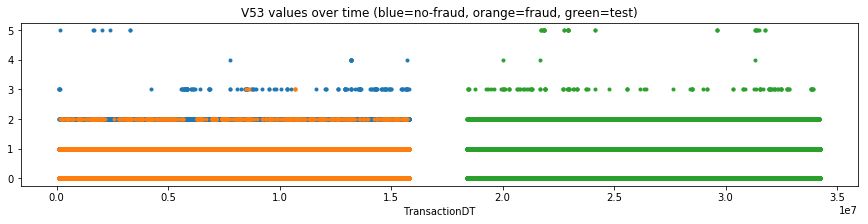

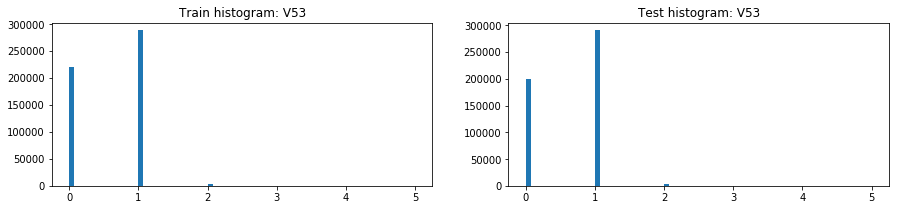

V53          Train      ...         Test public   Test private
0           count  513444.000000      ...        93474.000000  400319.000000
1            mean       0.577586      ...            0.706132       0.580902
2             std       0.511571      ...            0.481786       0.510668
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       5.000000      ...            5.000000       5.000000
8   unique values       7.000000      ...            7.000000       7.000000
9            NaNs   77096.000000      ...         7865.000000    5034.000000
10     NaNs share       0.130600      ...            0.077600       0.012400

[11 rows x 7 columns]

V53  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 288055      ...              5984         290128
1    0.0                 221227      ...              9586         199557
2 -999.0                  77096      ...              4509          12899
3    2.0                   4006      ...               579           3961
4    3.0                    140      ...                 5            113
5    4.0                      9      ...                 0              3
6    5.0                      7      ...                 0             30

[7 rows x 5 columns]

V53  Count in train      ...        Sum target (desc)  Count in test
0    0.0          221227      ...                     9586         199557
1    1.0          288055      ...                     5984         290128
2 -999.0           77096      ...                     4509          12899
3    2.0            4006      ...                      579           3961
4    3.0             140      ...                        5            113
5    4.0               9      ...                        0              3
6    5.0               7      ...                        0             30

[7 rows x 5 columns]

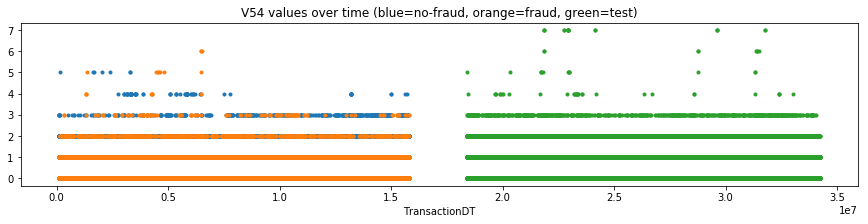

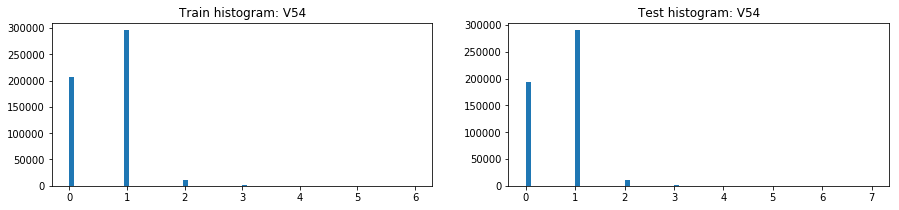

V54          Train      ...         Test public   Test private
0           count  513444.000000      ...        93474.000000  400319.000000
1            mean       0.619982      ...            0.745555       0.608515
2             std       0.534635      ...            0.509076       0.538358
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       6.000000      ...            5.000000       7.000000
8   unique values       8.000000      ...            7.000000       9.000000
9            NaNs   77096.000000      ...         7865.000000    5034.000000
10     NaNs share       0.130600      ...            0.077600       0.012400

[11 rows x 7 columns]

V54  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 295235      ...              5977         289597
1    0.0                 207068      ...              9131         192825
2 -999.0                  77096      ...              4509          12899
3    2.0                  10445      ...               905          10571
4    3.0                    603      ...               123            728
5    4.0                     76      ...                 8             32
6    5.0                     14      ...                 7             13
7    6.0                      3      ...                 3              8

[8 rows x 5 columns]

V54  Count in train      ...        Sum target (desc)  Count in test
0    0.0          207068      ...                     9131         192825
1    1.0          295235      ...                     5977         289597
2 -999.0           77096      ...                     4509          12899
3    2.0           10445      ...                      905          10571
4    3.0             603      ...                      123            728
5    4.0              76      ...                        8             32
6    5.0              14      ...                        7             13
7    6.0               3      ...                        3              8

[8 rows x 5 columns]

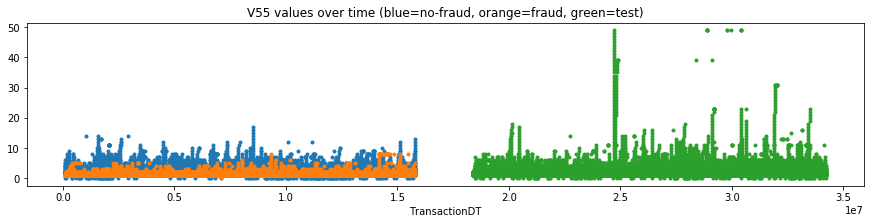

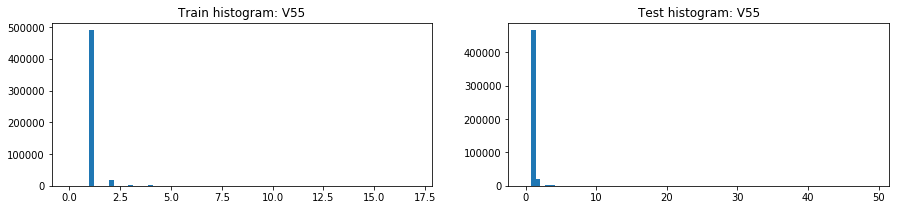

V55          Train      ...         Test public   Test private
0           count  513444.000000      ...        93474.000000  400319.000000
1            mean       1.067670      ...            1.077144       1.096276
2             std       0.391364      ...            0.425291       0.711522
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max      17.000000      ...           18.000000      49.000000
8   unique values      19.000000      ...           20.000000      51.000000
9            NaNs   77096.000000      ...         7865.000000    5034.000000
10     NaNs share       0.130600      ...            0.077600       0.012400

[11 rows x 7 columns]

V55  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 489239      ...             14104         465610
1 -999.0                  77096      ...              4509          12899
2    2.0                  18464      ...              1619          21137
3    3.0                   3100      ...               257           3706
4    4.0                   1233      ...                83           1436
5    5.0                    530      ...                47            654
6    6.0                    300      ...                 8            383
7    0.0                    180      ...                 1            139
8    7.0                    144      ...                 3            185
9    8.0                    124      ...                32            116

[10 rows x 5 columns]

V55  Count in train      ...        Sum target (desc)  Count in test
0    1.0          489239      ...                    14104         465610
1 -999.0           77096      ...                     4509          12899
2    2.0           18464      ...                     1619          21137
3    3.0            3100      ...                      257           3706
4    4.0            1233      ...                       83           1436
5    5.0             530      ...                       47            654
6    8.0             124      ...                       32            116
7    6.0             300      ...                        8            383
8    7.0             144      ...                        3            185
9    0.0             180      ...                        1            139

[10 rows x 5 columns]

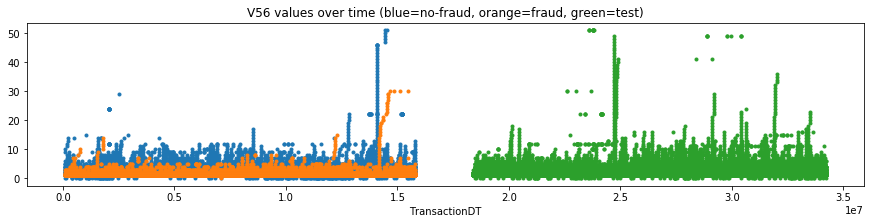

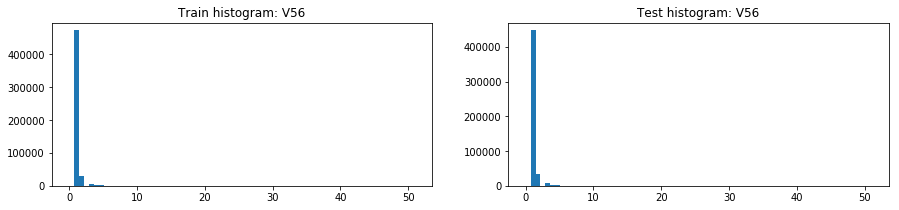

V56          Train      ...         Test public   Test private
0           count  513444.000000      ...        93474.000000  400319.000000
1            mean       1.120979      ...            1.135385       1.160802
2             std       0.661129      ...            0.553395       0.883305
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max      51.000000      ...           18.000000      51.000000
8   unique values      53.000000      ...           20.000000      52.000000
9            NaNs   77096.000000      ...         7865.000000    5034.000000
10     NaNs share       0.130600      ...            0.077600       0.012400

[11 rows x 7 columns]

V56  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 472700      ...             12939       447151.0
1 -999.0                  77096      ...              4509        12899.0
2    2.0                  30886      ...              2180        33758.0
3    3.0                   5610      ...               547         7192.0
4    4.0                   1881      ...               293         2536.0
5    5.0                    952      ...                97         1194.0
6    6.0                    355      ...                24          549.0
7    7.0                    246      ...                18          337.0
8    0.0                    180      ...                 1          136.0
9    8.0                    169      ...                10          210.0

[10 rows x 5 columns]

V56  Count in train      ...        Sum target (desc)  Count in test
0    1.0          472700      ...                    12939         447151
1 -999.0           77096      ...                     4509          12899
2    2.0           30886      ...                     2180          33758
3    3.0            5610      ...                      547           7192
4    4.0            1881      ...                      293           2536
5    5.0             952      ...                       97           1194
6    6.0             355      ...                       24            549
7    7.0             246      ...                       18            337
8    8.0             169      ...                       10            210
9   30.0               5      ...                        4              7

[10 rows x 5 columns]

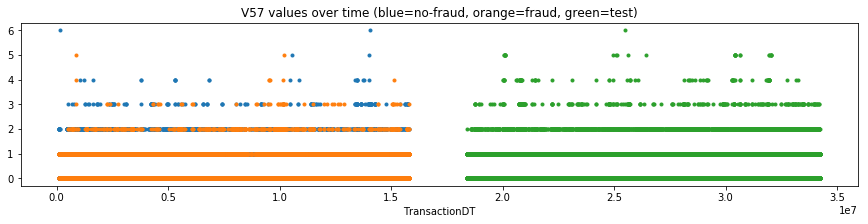

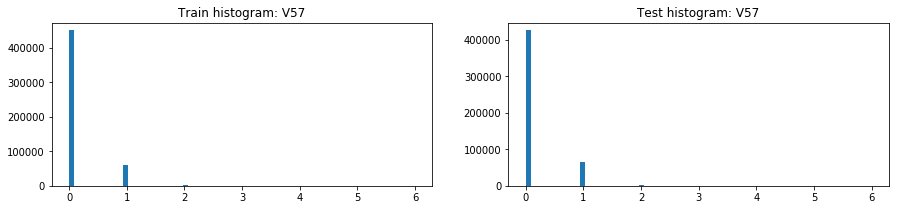

V57          Train      ...         Test public   Test private
0           count  513444.000000      ...        93474.000000  400319.000000
1            mean       0.128312      ...            0.109603       0.154170
2             std       0.349094      ...            0.339790       0.383391
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       0.000000
7             max       6.000000      ...            5.000000       6.000000
8   unique values       8.000000      ...            7.000000       8.000000
9            NaNs   77096.000000      ...         7865.000000    5034.000000
10     NaNs share       0.130600      ...            0.077600       0.012400

[11 rows x 7 columns]

V57  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 449807      ...              9386         425265
1 -999.0                  77096      ...              4509          12899
2    1.0                  61670      ...              6248          65642
3    2.0                   1731      ...               461           2475
4    3.0                    203      ...                51            299
5    4.0                     27      ...                 6             83
6    5.0                      4      ...                 2             27
7    6.0                      2      ...                 0              1

[8 rows x 5 columns]

V57  Count in train      ...        Sum target (desc)  Count in test
0    0.0          449807      ...                     9386         425265
1    1.0           61670      ...                     6248          65642
2 -999.0           77096      ...                     4509          12899
3    2.0            1731      ...                      461           2475
4    3.0             203      ...                       51            299
5    4.0              27      ...                        6             83
6    5.0               4      ...                        2             27
7    6.0               2      ...                        0              1

[8 rows x 5 columns]

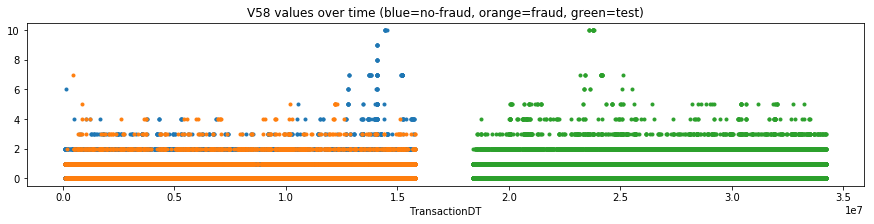

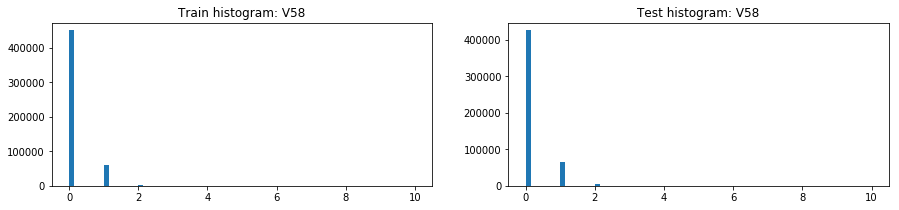

V58          Train      ...         Test public   Test private
0           count  513444.000000      ...        93474.000000  400319.000000
1            mean       0.132453      ...            0.114299       0.159178
2             std       0.372907      ...            0.364030       0.407921
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       0.000000
7             max      10.000000      ...            5.000000      10.000000
8   unique values      12.000000      ...            7.000000      10.000000
9            NaNs   77096.000000      ...         7865.000000    5034.000000
10     NaNs share       0.130600      ...            0.077600       0.012400

[11 rows x 7 columns]

V58  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 449600      ...              9357       425256.0
1 -999.0                  77096      ...              4509        12899.0
2    1.0                  60662      ...              5875        63921.0
3    2.0                   2675      ...               765         3789.0
4    3.0                    300      ...               120          596.0
5    4.0                    105      ...                28          129.0
6    7.0                     45      ...                 1           18.0
7    5.0                     31      ...                 8           65.0
8    6.0                     10      ...                 0            7.0
9   10.0                      6      ...                 0           11.0

[10 rows x 5 columns]

V58  Count in train      ...        Sum target (desc)  Count in test
0    0.0          449600      ...                     9357         425256
1    1.0           60662      ...                     5875          63921
2 -999.0           77096      ...                     4509          12899
3    2.0            2675      ...                      765           3789
4    3.0             300      ...                      120            596
5    4.0             105      ...                       28            129
6    5.0              31      ...                        8             65
7    7.0              45      ...                        1             18
8    6.0              10      ...                        0              7
9   10.0               6      ...                        0             11

[10 rows x 5 columns]

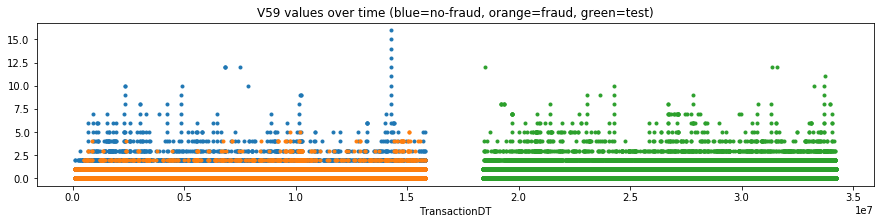

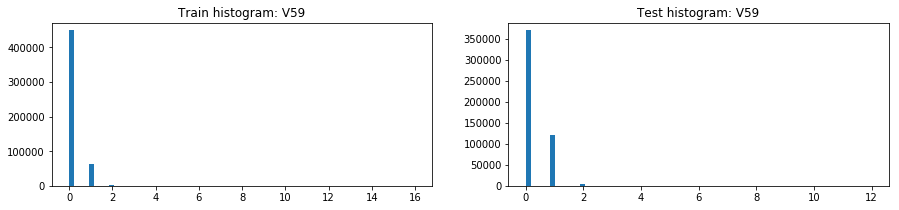

V59          Train      ...         Test public   Test private
0           count  513444.000000      ...        93474.000000  400319.000000
1            mean       0.134433      ...            0.123735       0.299708
2             std       0.379291      ...            0.387794       0.501294
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       1.000000
7             max      16.000000      ...           12.000000      12.000000
8   unique values      18.000000      ...           11.000000      14.000000
9            NaNs   77096.000000      ...         7865.000000    5034.000000
10     NaNs share       0.130600      ...            0.077600       0.012400

[11 rows x 7 columns]

V59  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 448636      ...              9555       369048.0
1 -999.0                  77096      ...              4509        12899.0
2    1.0                  61876      ...              6049       119715.0
3    2.0                   2264      ...               432         4054.0
4    3.0                    388      ...                82          605.0
5    4.0                    148      ...                32          171.0
6    5.0                     62      ...                 4           91.0
7    6.0                     29      ...                 0           43.0
8    7.0                     13      ...                 0           36.0
9    8.0                      7      ...                 0           17.0

[10 rows x 5 columns]

V59  Count in train      ...        Sum target (desc)  Count in test
0    0.0          448636      ...                     9555       369048.0
1    1.0           61876      ...                     6049       119715.0
2 -999.0           77096      ...                     4509        12899.0
3    2.0            2264      ...                      432         4054.0
4    3.0             388      ...                       82          605.0
5    4.0             148      ...                       32          171.0
6    5.0              62      ...                        4           91.0
7   12.0               5      ...                        0            3.0
8   15.0               1      ...                        0            NaN
9   14.0               1      ...                        0            NaN

[10 rows x 5 columns]

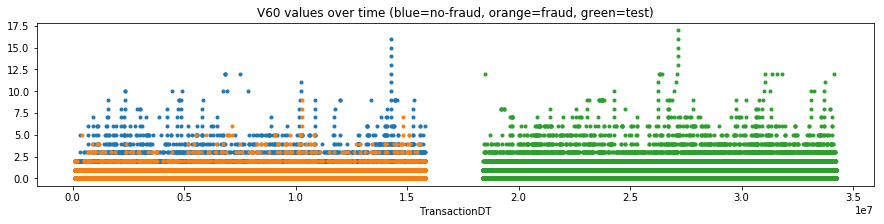

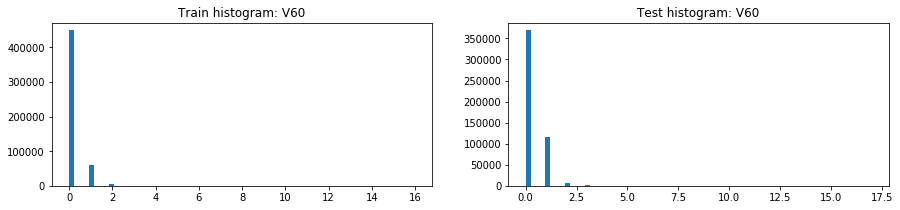

V60          Train      ...         Test public   Test private
0           count  513444.000000      ...        93474.000000  400319.000000
1            mean       0.142537      ...            0.134690       0.314432
2             std       0.418230      ...            0.438684       0.555163
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       1.000000
7             max      16.000000      ...           12.000000      17.000000
8   unique values      18.000000      ...           11.000000      19.000000
9            NaNs   77096.000000      ...         7865.000000    5034.000000
10     NaNs share       0.130600      ...            0.077600       0.012400

[11 rows x 7 columns]

V60  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 448369      ...              9495         368830
1 -999.0                  77096      ...              4509          12899
2    1.0                  59589      ...              5683         115570
3    2.0                   4065      ...               764           7218
4    3.0                    854      ...               136           1291
5    4.0                    296      ...                52            432
6    5.0                    137      ...                17            197
7    6.0                     52      ...                 3            122
8    7.0                     24      ...                 2             51
9    9.0                     21      ...                 1             27

[10 rows x 5 columns]

V60  Count in train      ...        Sum target (desc)  Count in test
0    0.0          448369      ...                     9495         368830
1    1.0           59589      ...                     5683         115570
2 -999.0           77096      ...                     4509          12899
3    2.0            4065      ...                      764           7218
4    3.0             854      ...                      136           1291
5    4.0             296      ...                       52            432
6    5.0             137      ...                       17            197
7    6.0              52      ...                        3            122
8    7.0              24      ...                        2             51
9    8.0              17      ...                        1             26

[10 rows x 5 columns]

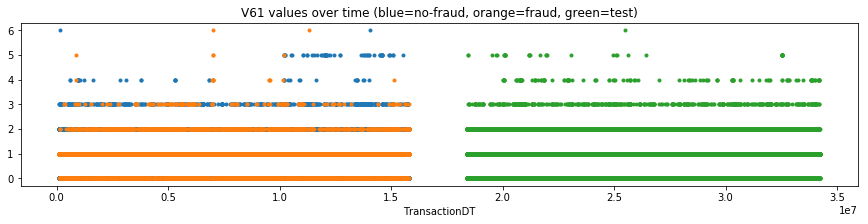

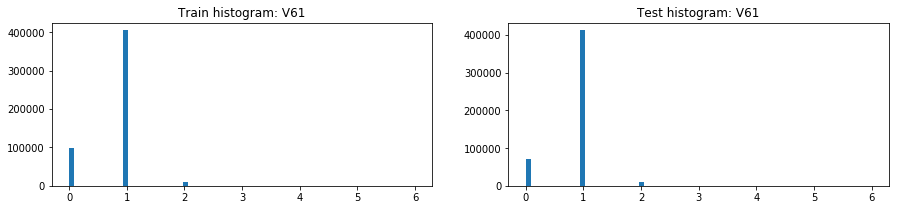

V61          Train      ...         Test public   Test private
0           count  513444.000000      ...        93474.000000  400319.000000
1            mean       0.829785      ...            0.855596       0.885674
2             std       0.436617      ...            0.427601       0.389764
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       6.000000      ...            5.000000       6.000000
8   unique values       8.000000      ...            7.000000       8.000000
9            NaNs   77096.000000      ...         7865.000000    5034.000000
10     NaNs share       0.130600      ...            0.077600       0.012400

[11 rows x 7 columns]

V61  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 404182      ...             12646         412011
1    0.0                  98827      ...              2254          70995
2 -999.0                  77096      ...              4509          12899
3    2.0                   9620      ...              1095          10041
4    3.0                    702      ...               142            583
5    5.0                     60      ...                 4             35
6    4.0                     49      ...                11            126
7    6.0                      4      ...                 2              1

[8 rows x 5 columns]

V61  Count in train      ...        Sum target (desc)  Count in test
0    1.0          404182      ...                    12646         412011
1 -999.0           77096      ...                     4509          12899
2    0.0           98827      ...                     2254          70995
3    2.0            9620      ...                     1095          10041
4    3.0             702      ...                      142            583
5    4.0              49      ...                       11            126
6    5.0              60      ...                        4             35
7    6.0               4      ...                        2              1

[8 rows x 5 columns]

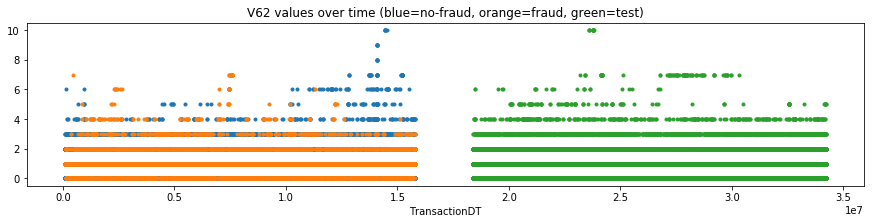

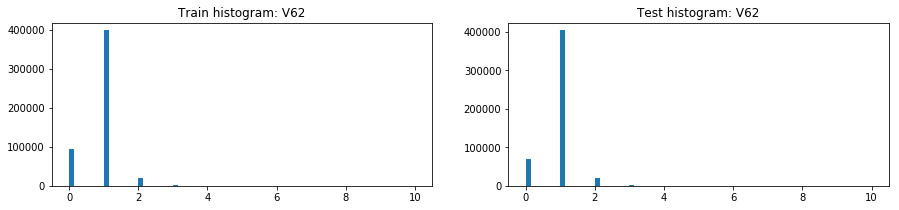

V62          Train      ...         Test public   Test private
0           count  513444.000000      ...        93474.000000  400319.000000
1            mean       0.867563      ...            0.892762       0.917556
2             std       0.483803      ...            0.477507       0.446619
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max      10.000000      ...            6.000000      10.000000
8   unique values      12.000000      ...            8.000000      10.000000
9            NaNs   77096.000000      ...         7865.000000    5034.000000
10     NaNs share       0.130600      ...            0.077600       0.012400

[11 rows x 7 columns]

V62  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 398513      ...             11944       403691.0
1    0.0                  93177      ...              2023        68371.0
2 -999.0                  77096      ...              4509        12899.0
3    2.0                  19368      ...              1621        19204.0
4    3.0                   1860      ...               414         1918.0
5    4.0                    287      ...                93          378.0
6    6.0                     82      ...                21           24.0
7    5.0                     78      ...                19          110.0
8    7.0                     63      ...                19           85.0
9   10.0                      6      ...                 0           11.0

[10 rows x 5 columns]

V62  Count in train      ...        Sum target (desc)  Count in test
0    1.0          398513      ...                    11944         403691
1 -999.0           77096      ...                     4509          12899
2    0.0           93177      ...                     2023          68371
3    2.0           19368      ...                     1621          19204
4    3.0            1860      ...                      414           1918
5    4.0             287      ...                       93            378
6    6.0              82      ...                       21             24
7    5.0              78      ...                       19            110
8    7.0              63      ...                       19             85
9   10.0               6      ...                        0             11

[10 rows x 5 columns]

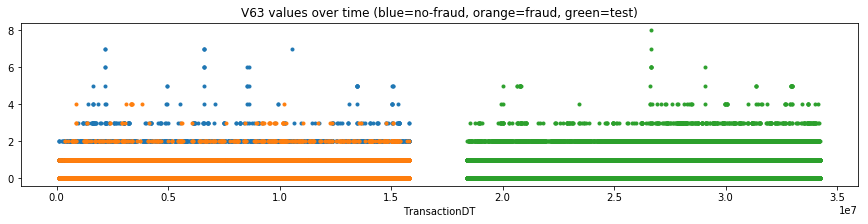

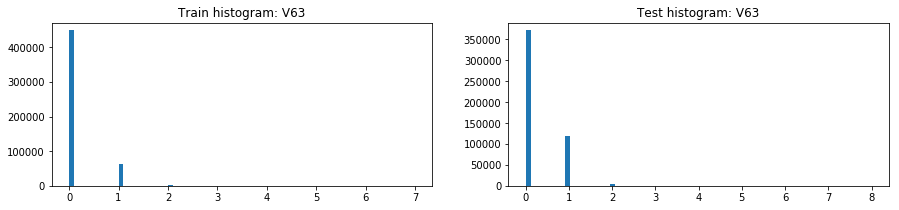

V63          Train      ...         Test public   Test private
0           count  513444.000000      ...        93474.000000  400319.000000
1            mean       0.130743      ...            0.116963       0.289452
2             std       0.355262      ...            0.344637       0.478055
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       1.000000
7             max       7.000000      ...            5.000000       8.000000
8   unique values       9.000000      ...            7.000000      10.000000
9            NaNs   77096.000000      ...         7865.000000    5034.000000
10     NaNs share       0.130600      ...            0.077600       0.012400

[11 rows x 7 columns]

V63  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 448961      ...              9619         371489
1 -999.0                  77096      ...              4509          12899
2    1.0                  62231      ...              6136         118419
3    2.0                   1969      ...               347           3388
4    3.0                    221      ...                43            415
5    4.0                     32      ...                 9             49
6    5.0                     17      ...                 0             25
7    6.0                      7      ...                 0              5
8    7.0                      6      ...                 0              1

[9 rows x 5 columns]

V63  Count in train      ...        Sum target (desc)  Count in test
0    0.0          448961      ...                     9619         371489
1    1.0           62231      ...                     6136         118419
2 -999.0           77096      ...                     4509          12899
3    2.0            1969      ...                      347           3388
4    3.0             221      ...                       43            415
5    4.0              32      ...                        9             49
6    5.0              17      ...                        0             25
7    6.0               7      ...                        0              5
8    7.0               6      ...                        0              1

[9 rows x 5 columns]

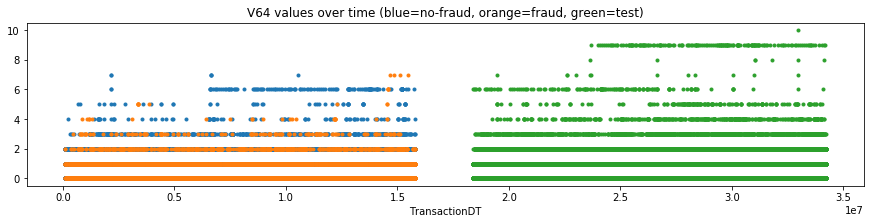

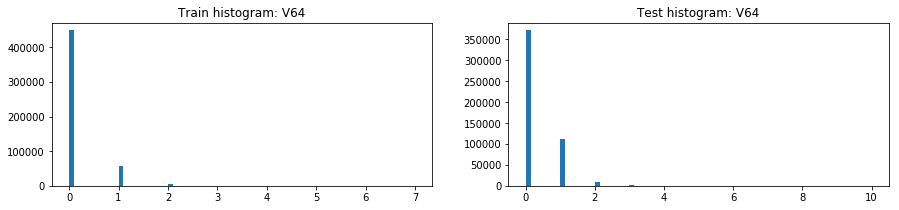

V64          Train      ...         Test public   Test private
0           count  513444.000000      ...        93474.000000  400319.000000
1            mean       0.141825      ...            0.132069       0.313957
2             std       0.406157      ...            0.417240       0.576026
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       1.000000
7             max       7.000000      ...            7.000000      10.000000
8   unique values       9.000000      ...            9.000000      12.000000
9            NaNs   77096.000000      ...         7865.000000    5034.000000
10     NaNs share       0.130600      ...            0.077600       0.012400

[11 rows x 7 columns]

V64  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 448662      ...              9557         371179
1 -999.0                  77096      ...              4509          12899
2    1.0                  58547      ...              5690         112063
3    2.0                   5145      ...               717           8094
4    3.0                    757      ...               148           1467
5    6.0                    144      ...                 4            149
6    4.0                    118      ...                25            460
7    5.0                     61      ...                 9            187
8    7.0                     10      ...                 4             12

[9 rows x 5 columns]

V64  Count in train      ...        Sum target (desc)  Count in test
0    0.0          448662      ...                     9557         371179
1    1.0           58547      ...                     5690         112063
2 -999.0           77096      ...                     4509          12899
3    2.0            5145      ...                      717           8094
4    3.0             757      ...                      148           1467
5    4.0             118      ...                       25            460
6    5.0              61      ...                        9            187
7    6.0             144      ...                        4            149
8    7.0              10      ...                        4             12

[9 rows x 5 columns]

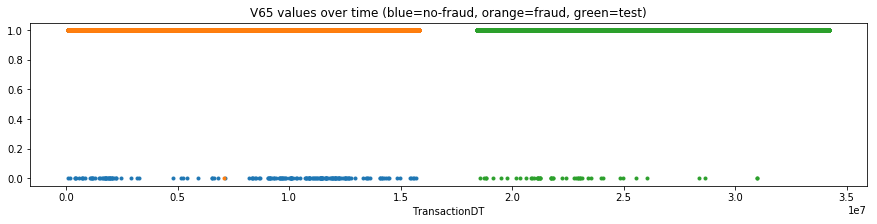

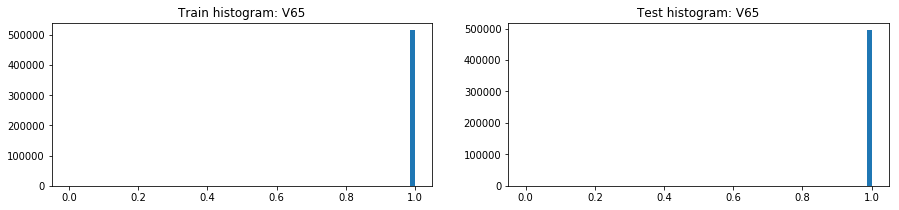

V65          Train      ...         Test public   Test private
0           count  513444.000000      ...        93474.000000  400319.000000
1            mean       0.999663      ...            0.999754       0.999943
2             std       0.018353      ...            0.015684       0.007580
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       1.000000      ...            1.000000       1.000000
8   unique values       3.000000      ...            3.000000       3.000000
9            NaNs   77096.000000      ...         7865.000000    5034.000000
10     NaNs share       0.130600      ...            0.077600       0.012400

[11 rows x 7 columns]

V65  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 513271      ...             16153         493746
1 -999.0                  77096      ...              4509          12899
2    0.0                    173      ...                 1             46

[3 rows x 5 columns]

V65  Count in train      ...        Sum target (desc)  Count in test
0    1.0          513271      ...                    16153         493746
1 -999.0           77096      ...                     4509          12899
2    0.0             173      ...                        1             46

[3 rows x 5 columns]

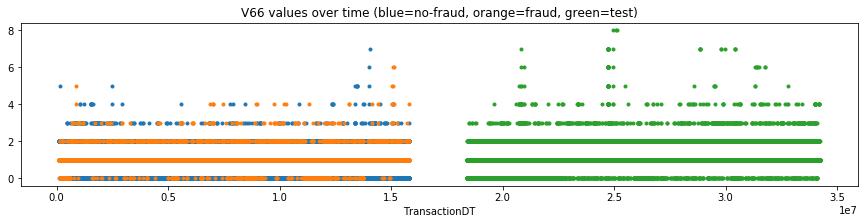

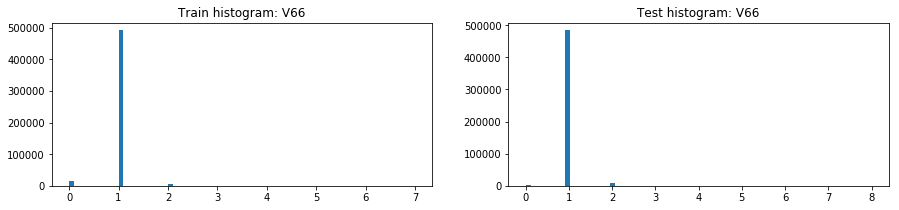

V66          Train      ...         Test public   Test private
0           count  513444.000000      ...        93474.000000  400319.000000
1            mean       0.981038      ...            1.007039       1.017401
2             std       0.216235      ...            0.181799       0.167942
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       7.000000      ...            7.000000       8.000000
8   unique values       9.000000      ...            9.000000      10.000000
9            NaNs   77096.000000      ...         7865.000000    5034.000000
10     NaNs share       0.130600      ...            0.077600       0.012400

[11 rows x 7 columns]

V66  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 490779      ...             14509         483557
1 -999.0                  77096      ...              4509          12899
2    0.0                  16418      ...               681           1828
3    2.0                   5897      ...               856           7692
4    3.0                    285      ...                83            523
5    4.0                     50      ...                20            124
6    5.0                     11      ...                 3             25
7    6.0                      3      ...                 2             19
8    7.0                      1      ...                 0             21

[9 rows x 5 columns]

V66  Count in train      ...        Sum target (desc)  Count in test
0    1.0          490779      ...                    14509         483557
1 -999.0           77096      ...                     4509          12899
2    2.0            5897      ...                      856           7692
3    0.0           16418      ...                      681           1828
4    3.0             285      ...                       83            523
5    4.0              50      ...                       20            124
6    5.0              11      ...                        3             25
7    6.0               3      ...                        2             19
8    7.0               1      ...                        0             21

[9 rows x 5 columns]

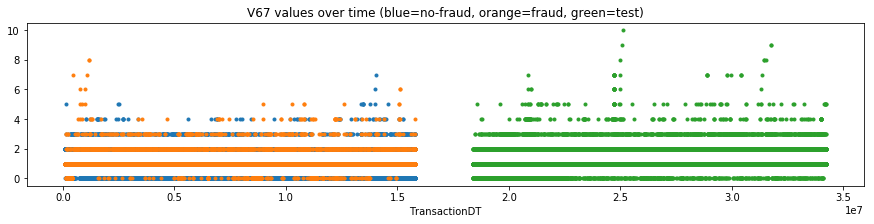

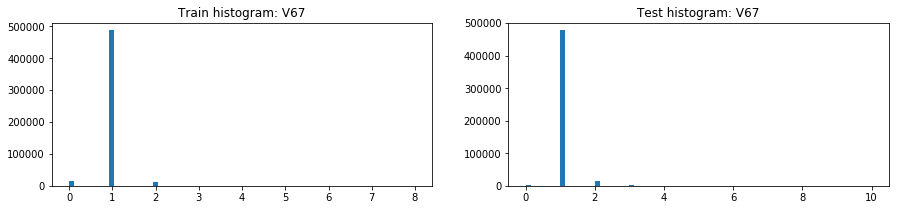

V67          Train      ...         Test public   Test private
0           count  513444.000000      ...        93474.000000  400319.000000
1            mean       0.998121      ...            1.025376       1.033194
2             std       0.245912      ...            0.231832       0.217600
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       8.000000      ...            7.000000      10.000000
8   unique values      10.000000      ...            9.000000      12.000000
9            NaNs   77096.000000      ...         7865.000000    5034.000000
10     NaNs share       0.130600      ...            0.077600       0.012400

[11 rows x 7 columns]

V67  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 486457      ...             13728         476992
1 -999.0                  77096      ...              4509          12899
2    0.0                  14565      ...               594           1567
3    2.0                  11435      ...              1521          13732
4    3.0                    844      ...               243           1215
5    4.0                    112      ...                50            166
6    5.0                     21      ...                10             76
7    6.0                      5      ...                 4             14
8    7.0                      3      ...                 2             22
9    8.0                      2      ...                 2              4

[10 rows x 5 columns]

V67  Count in train      ...        Sum target (desc)  Count in test
0    1.0          486457      ...                    13728         476992
1 -999.0           77096      ...                     4509          12899
2    2.0           11435      ...                     1521          13732
3    0.0           14565      ...                      594           1567
4    3.0             844      ...                      243           1215
5    4.0             112      ...                       50            166
6    5.0              21      ...                       10             76
7    6.0               5      ...                        4             14
8    7.0               3      ...                        2             22
9    8.0               2      ...                        2              4

[10 rows x 5 columns]

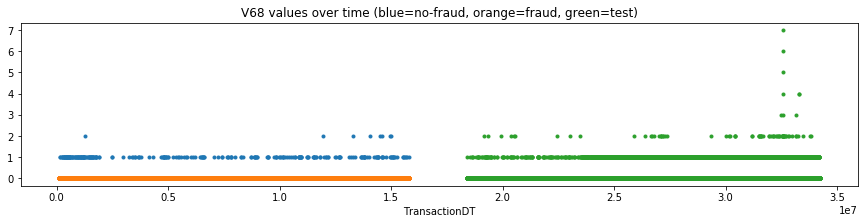

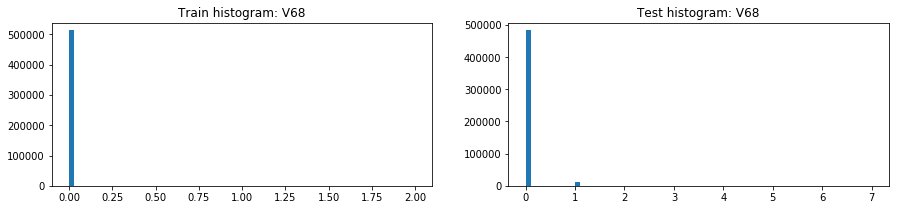

V68          Train      ...         Test public   Test private
0           count  513444.000000      ...        93474.000000  400319.000000
1            mean       0.000534      ...            0.000974       0.028352
2             std       0.023760      ...            0.033181       0.168057
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       0.000000
7             max       2.000000      ...            2.000000       7.000000
8   unique values       4.000000      ...            4.000000       9.000000
9            NaNs   77096.000000      ...         7865.000000    5034.000000
10     NaNs share       0.130600      ...            0.077600       0.012400

[11 rows x 7 columns]

V68  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 513178      ...             16154         482453
1 -999.0                  77096      ...              4509          12899
2    1.0                    258      ...                 0          11258
3    2.0                      8      ...                 0             72

[4 rows x 5 columns]

V68  Count in train      ...        Sum target (desc)  Count in test
0    0.0          513178      ...                    16154         482453
1 -999.0           77096      ...                     4509          12899
2    1.0             258      ...                        0          11258
3    2.0               8      ...                        0             72

[4 rows x 5 columns]

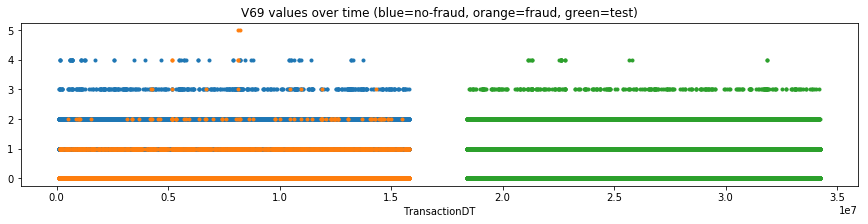

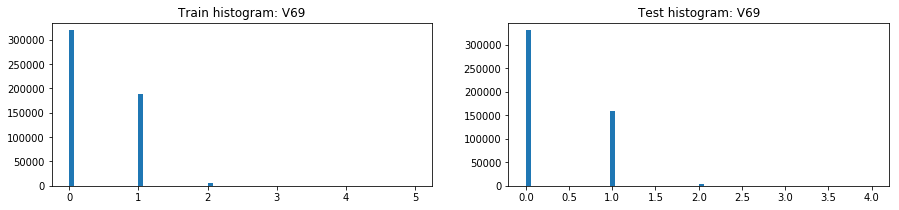

V69          Train      ...         Test public   Test private
0           count  513444.000000      ...        93474.000000  400319.000000
1            mean       0.390200      ...            0.407226       0.323547
2             std       0.513696      ...            0.514653       0.488333
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       5.000000      ...            4.000000       4.000000
8   unique values       7.000000      ...            6.000000       6.000000
9            NaNs   77096.000000      ...         7865.000000    5034.000000
10     NaNs share       0.130600      ...            0.077600       0.012400

[11 rows x 7 columns]

V69  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 319136      ...             14786       330879.0
1    1.0                 188826      ...              1268       158570.0
2 -999.0                  77096      ...              4509        12899.0
3    2.0                   4989      ...                85         4031.0
4    3.0                    432      ...                 9          294.0
5    4.0                     59      ...                 4           18.0
6    5.0                      2      ...                 2            NaN

[7 rows x 5 columns]

V69  Count in train      ...        Sum target (desc)  Count in test
0    0.0          319136      ...                    14786       330879.0
1 -999.0           77096      ...                     4509        12899.0
2    1.0          188826      ...                     1268       158570.0
3    2.0            4989      ...                       85         4031.0
4    3.0             432      ...                        9          294.0
5    4.0              59      ...                        4           18.0
6    5.0               2      ...                        2            NaN

[7 rows x 5 columns]

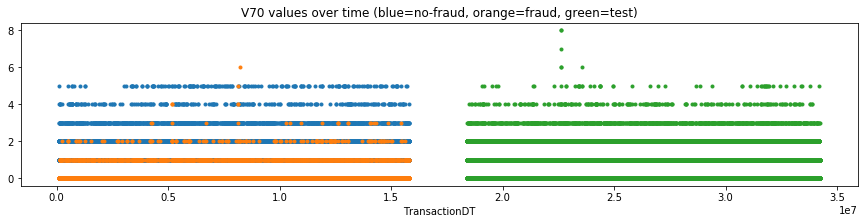

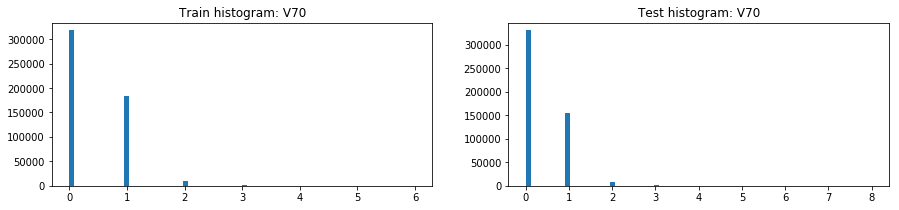

V70          Train      ...         Test public   Test private
0           count  513444.000000      ...        93474.000000  400319.000000
1            mean       0.407924      ...            0.423701       0.337478
2             std       0.554499      ...            0.549443       0.524920
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       6.000000      ...            5.000000       8.000000
8   unique values       8.000000      ...            7.000000      10.000000
9            NaNs   77096.000000      ...         7865.000000    5034.000000
10     NaNs share       0.130600      ...            0.077600       0.012400

[11 rows x 7 columns]

V70  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 317801      ...             14780         330132
1    1.0                 184177      ...              1208         154228
2 -999.0                  77096      ...              4509          12899
3    2.0                   9739      ...               140           8172
4    3.0                   1296      ...                20            982
5    4.0                    253      ...                 4            216
6    5.0                    177      ...                 1             56
7    6.0                      1      ...                 1              3

[8 rows x 5 columns]

V70  Count in train      ...        Sum target (desc)  Count in test
0    0.0          317801      ...                    14780         330132
1 -999.0           77096      ...                     4509          12899
2    1.0          184177      ...                     1208         154228
3    2.0            9739      ...                      140           8172
4    3.0            1296      ...                       20            982
5    4.0             253      ...                        4            216
6    5.0             177      ...                        1             56
7    6.0               1      ...                        1              3

[8 rows x 5 columns]

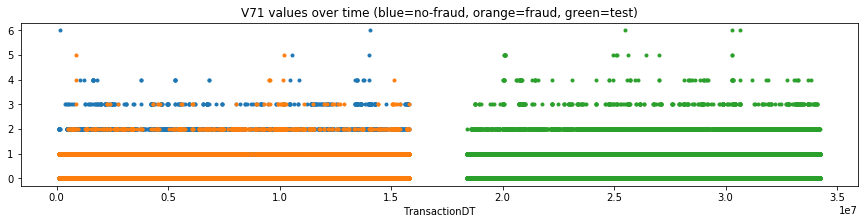

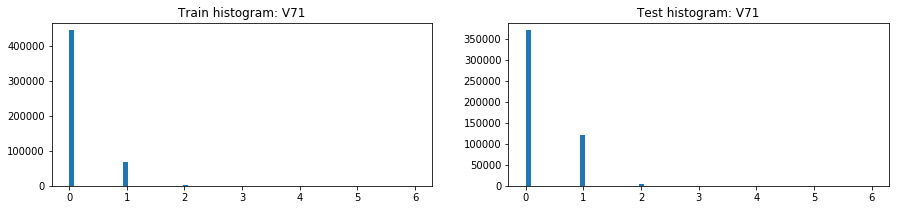

V71          Train      ...         Test public   Test private
0           count  513444.000000      ...        93474.000000  400319.000000
1            mean       0.140639      ...            0.122408       0.290571
2             std       0.364303      ...            0.354751       0.475373
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       1.000000
7             max       6.000000      ...            5.000000       6.000000
8   unique values       8.000000      ...            7.000000       8.000000
9            NaNs   77096.000000      ...         7865.000000    5034.000000
10     NaNs share       0.130600      ...            0.077600       0.012400

[11 rows x 7 columns]

V71  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 443821      ...              9349         370174
1 -999.0                  77096      ...              4509          12899
2    1.0                  67435      ...              6286         120022
3    2.0                   1837      ...               460           3161
4    3.0                    311      ...                51            342
5    4.0                     34      ...                 6             75
6    5.0                      4      ...                 2             15
7    6.0                      2      ...                 0              3

[8 rows x 5 columns]

V71  Count in train      ...        Sum target (desc)  Count in test
0    0.0          443821      ...                     9349         370174
1    1.0           67435      ...                     6286         120022
2 -999.0           77096      ...                     4509          12899
3    2.0            1837      ...                      460           3161
4    3.0             311      ...                       51            342
5    4.0              34      ...                        6             75
6    5.0               4      ...                        2             15
7    6.0               2      ...                        0              3

[8 rows x 5 columns]

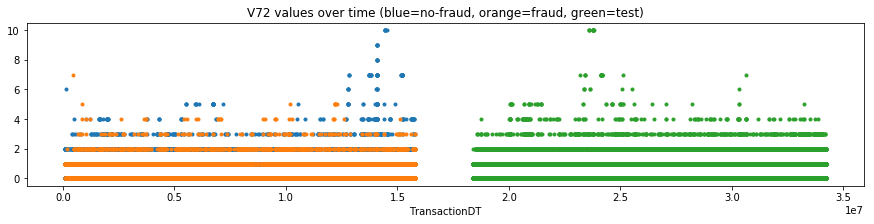

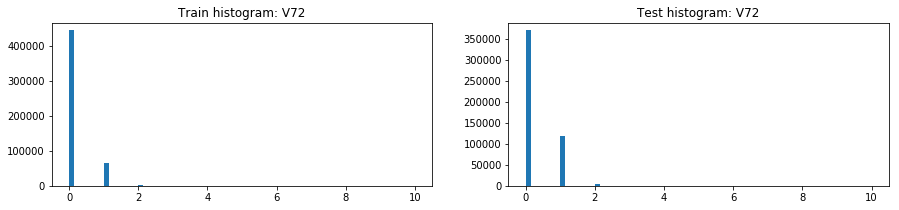

V72          Train      ...         Test public   Test private
0           count  513444.000000      ...        93474.000000  400319.000000
1            mean       0.145124      ...            0.127490       0.296798
2             std       0.389212      ...            0.379355       0.496960
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       1.000000
7             max      10.000000      ...            5.000000      10.000000
8   unique values      12.000000      ...            7.000000      10.000000
9            NaNs   77096.000000      ...         7865.000000    5034.000000
10     NaNs share       0.130600      ...            0.077600       0.012400

[11 rows x 7 columns]

V72  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 443611      ...              9320       370131.0
1 -999.0                  77096      ...              4509        12899.0
2    1.0                  66364      ...              5913       117888.0
3    2.0                   2802      ...               765         4879.0
4    3.0                    413      ...               119          676.0
5    4.0                    129      ...                28          134.0
6    5.0                     54      ...                 8           46.0
7    7.0                     45      ...                 1           19.0
8    6.0                     10      ...                 0            8.0
9   10.0                      6      ...                 0           11.0

[10 rows x 5 columns]

V72  Count in train      ...        Sum target (desc)  Count in test
0    0.0          443611      ...                     9320         370131
1    1.0           66364      ...                     5913         117888
2 -999.0           77096      ...                     4509          12899
3    2.0            2802      ...                      765           4879
4    3.0             413      ...                      119            676
5    4.0             129      ...                       28            134
6    5.0              54      ...                        8             46
7    7.0              45      ...                        1             19
8    6.0              10      ...                        0              8
9   10.0               6      ...                        0             11

[10 rows x 5 columns]

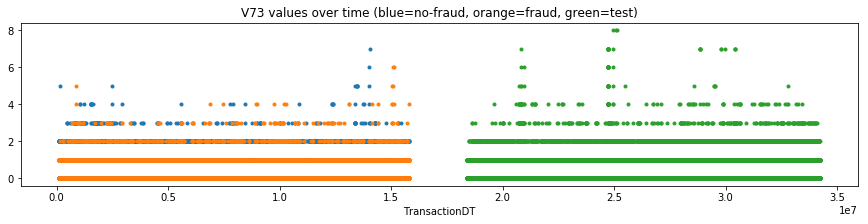

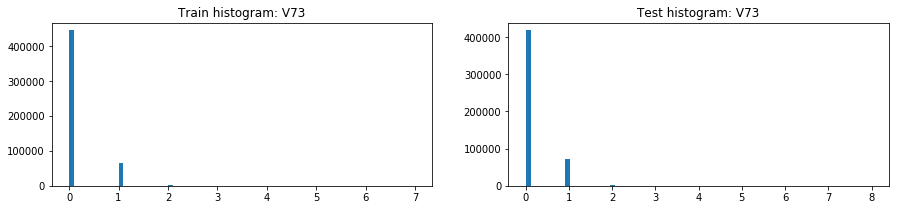

V73          Train      ...         Test public   Test private
0           count  513444.000000      ...        93474.000000  400319.000000
1            mean       0.139982      ...            0.126656       0.170519
2             std       0.367098      ...            0.359843       0.405296
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       0.000000
7             max       7.000000      ...            7.000000       8.000000
8   unique values       9.000000      ...            9.000000      10.000000
9            NaNs   77096.000000      ...         7865.000000    5034.000000
10     NaNs share       0.130600      ...            0.077600       0.012400

[11 rows x 7 columns]

V73  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 444786      ...              8951         417899
1 -999.0                  77096      ...              4509          12899
2    1.0                  65814      ...              6549          72433
3    2.0                   2551      ...               557           2991
4    3.0                    235      ...                76            312
5    4.0                     43      ...                16             98
6    5.0                     11      ...                 3             23
7    6.0                      3      ...                 2             12
8    7.0                      1      ...                 0             21

[9 rows x 5 columns]

V73  Count in train      ...        Sum target (desc)  Count in test
0    0.0          444786      ...                     8951         417899
1    1.0           65814      ...                     6549          72433
2 -999.0           77096      ...                     4509          12899
3    2.0            2551      ...                      557           2991
4    3.0             235      ...                       76            312
5    4.0              43      ...                       16             98
6    5.0              11      ...                        3             23
7    6.0               3      ...                        2             12
8    7.0               1      ...                        0             21

[9 rows x 5 columns]

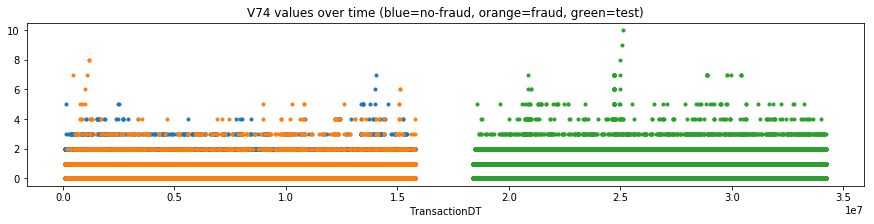

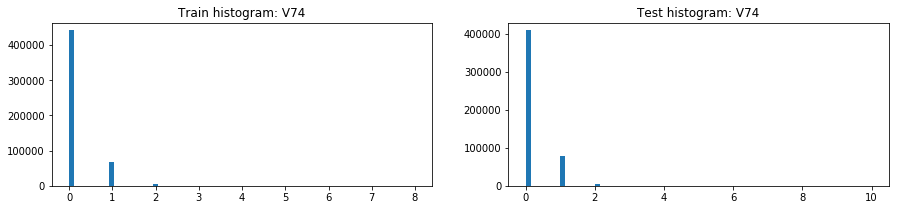

V74          Train      ...         Test public   Test private
0           count  513444.000000      ...        93474.000000  400319.000000
1            mean       0.152147      ...            0.149699       0.194530
2             std       0.393274      ...            0.402062       0.441897
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       0.000000
7             max       8.000000      ...            7.000000      10.000000
8   unique values      10.000000      ...            9.000000      12.000000
9            NaNs   77096.000000      ...         7865.000000    5034.000000
10     NaNs share       0.130600      ...            0.077600       0.012400

[11 rows x 7 columns]

V74  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 440878      ...              8618         409188
1 -999.0                  77096      ...              4509          12899
2    1.0                  67816      ...              6400          78706
3    2.0                   4109      ...               885           4955
4    3.0                    525      ...               193            693
5    4.0                     86      ...                41            145
6    5.0                     21      ...                10             68
7    6.0                      4      ...                 3             13
8    7.0                      3      ...                 2             21
9    8.0                      2      ...                 2              1

[10 rows x 5 columns]

V74  Count in train      ...        Sum target (desc)  Count in test
0    0.0          440878      ...                     8618         409188
1    1.0           67816      ...                     6400          78706
2 -999.0           77096      ...                     4509          12899
3    2.0            4109      ...                      885           4955
4    3.0             525      ...                      193            693
5    4.0              86      ...                       41            145
6    5.0              21      ...                       10             68
7    6.0               4      ...                        3             13
8    7.0               3      ...                        2             21
9    8.0               2      ...                        2              1

[10 rows x 5 columns]

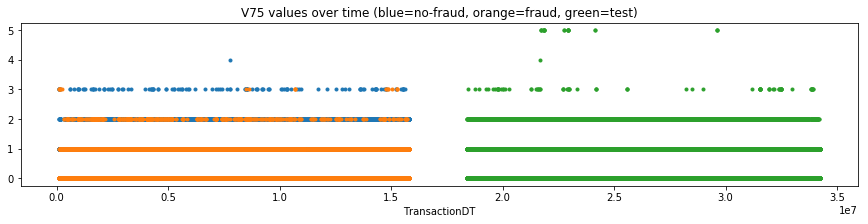

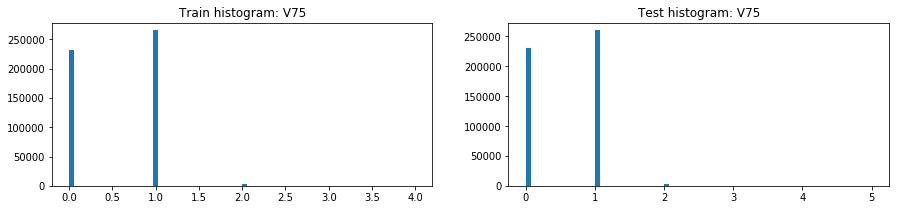

V75          Train      ...         Test public   Test private
0           count  501376.000000      ...        94022.000000  400589.000000
1            mean       0.544278      ...            0.627842       0.517997
2             std       0.514318      ...            0.499932       0.513509
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       4.000000      ...            5.000000       5.000000
8   unique values       6.000000      ...            7.000000       6.000000
9            NaNs   89164.000000      ...         7317.000000    4764.000000
10     NaNs share       0.151000      ...            0.072200       0.011800

[11 rows x 7 columns]

V75  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 265082      ...              5630         259969
1    0.0                 232467      ...             10318         231432
2 -999.0                  89164      ...              4276          12081
3    2.0                   3676      ...               420           3106
4    3.0                    150      ...                19             80
5    4.0                      1      ...                 0              1

[6 rows x 5 columns]

V75  Count in train      ...        Sum target (desc)  Count in test
0    0.0          232467      ...                    10318         231432
1    1.0          265082      ...                     5630         259969
2 -999.0           89164      ...                     4276          12081
3    2.0            3676      ...                      420           3106
4    3.0             150      ...                       19             80
5    4.0               1      ...                        0              1

[6 rows x 5 columns]

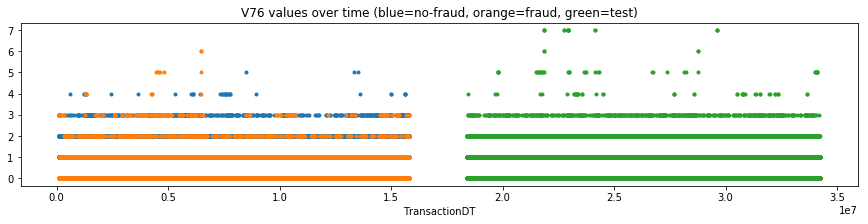

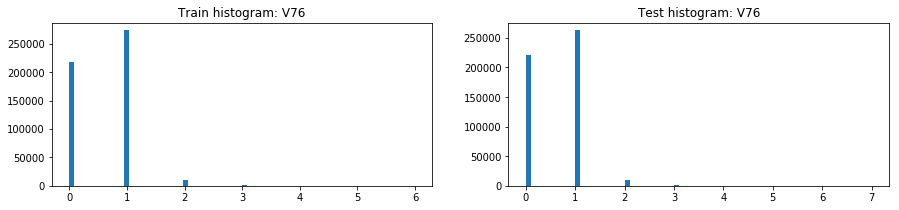

V76          Train      ...         Test public   Test private
0           count  501376.000000      ...        94022.000000  400589.000000
1            mean       0.587557      ...            0.670194       0.551168
2             std       0.538230      ...            0.526512       0.543986
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       6.000000      ...            5.000000       7.000000
8   unique values       8.000000      ...            7.000000       9.000000
9            NaNs   89164.000000      ...         7317.000000    4764.000000
10     NaNs share       0.151000      ...            0.072200       0.011800

[11 rows x 7 columns]

V76  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 273293      ...              5702         262516
1    0.0                 217817      ...              9926         221908
2 -999.0                  89164      ...              4276          12081
3    2.0                   9571      ...               607           9466
4    3.0                    641      ...               133            617
5    4.0                     43      ...                11             45
6    5.0                      9      ...                 6             38
7    6.0                      2      ...                 2              4

[8 rows x 5 columns]

V76  Count in train      ...        Sum target (desc)  Count in test
0    0.0          217817      ...                     9926         221908
1    1.0          273293      ...                     5702         262516
2 -999.0           89164      ...                     4276          12081
3    2.0            9571      ...                      607           9466
4    3.0             641      ...                      133            617
5    4.0              43      ...                       11             45
6    5.0               9      ...                        6             38
7    6.0               2      ...                        2              4

[8 rows x 5 columns]

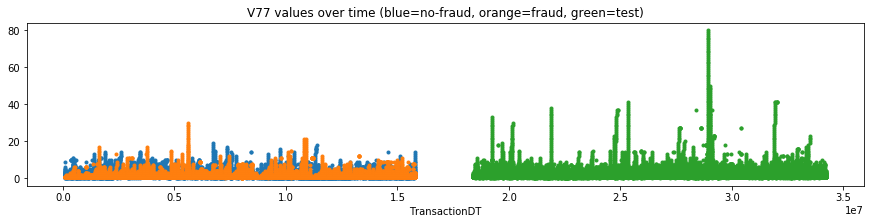

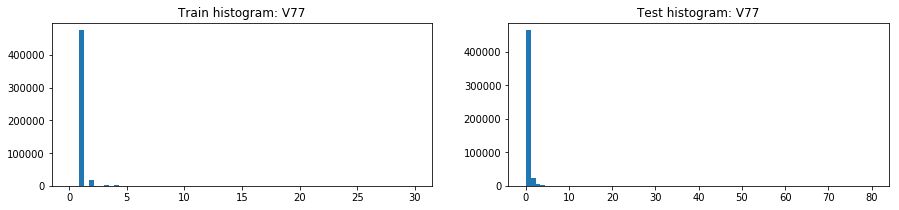

V77          Train      ...         Test public   Test private
0           count  501376.000000      ...        94022.000000  400589.000000
1            mean       1.086893      ...            1.105911       1.128219
2             std       0.532958      ...            0.717580       1.079576
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max      30.000000      ...           33.000000      80.000000
8   unique values      32.000000      ...           35.000000      82.000000
9            NaNs   89164.000000      ...         7317.000000    4764.000000
10     NaNs share       0.151000      ...            0.072200       0.011800

[11 rows x 7 columns]

V77  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 474434      ...             12962         463392
1 -999.0                  89164      ...              4276          12081
2    2.0                  18955      ...              1699          22014
3    3.0                   3695      ...               627           4221
4    4.0                   1623      ...               396           1914
5    5.0                    742      ...               184            855
6    0.0                    571      ...                11            205
7    6.0                    415      ...               126            584
8    7.0                    297      ...               110            314
9    8.0                    183      ...                61            242

[10 rows x 5 columns]

V77  Count in train      ...        Sum target (desc)  Count in test
0    1.0          474434      ...                    12962         463392
1 -999.0           89164      ...                     4276          12081
2    2.0           18955      ...                     1699          22014
3    3.0            3695      ...                      627           4221
4    4.0            1623      ...                      396           1914
5    5.0             742      ...                      184            855
6    6.0             415      ...                      126            584
7    7.0             297      ...                      110            314
8    9.0             157      ...                       66            137
9    8.0             183      ...                       61            242

[10 rows x 5 columns]

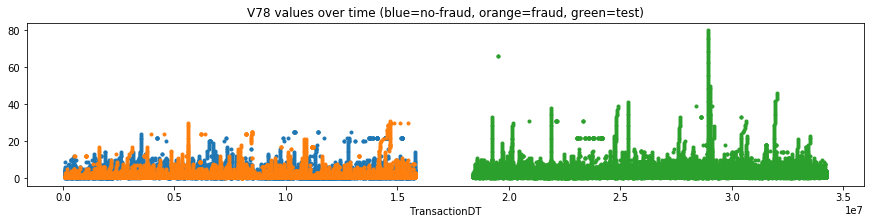

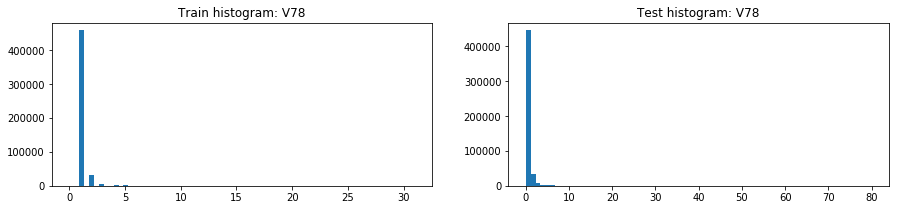

V78          Train      ...         Test public   Test private
0           count  501376.000000      ...        94022.000000  400589.000000
1            mean       1.144462      ...            1.165185       1.197604
2             std       0.781474      ...            0.864204       1.227508
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max      31.000000      ...           66.000000      80.000000
8   unique values      33.000000      ...           36.000000      82.000000
9            NaNs   89164.000000      ...         7317.000000    4764.000000
10     NaNs share       0.151000      ...            0.072200       0.011800

[11 rows x 7 columns]

V78  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 457915      ...             11972         445500
1 -999.0                  89164      ...              4276          12081
2    2.0                  31364      ...              2139          34375
3    3.0                   6135      ...               880           7032
4    4.0                   2261      ...               462           2938
5    5.0                   1125      ...               262           1431
6    6.0                    609      ...               165            886
7    0.0                    571      ...                11            202
8    7.0                    353      ...               107            463
9    8.0                    211      ...                69            402

[10 rows x 5 columns]

V78  Count in train      ...        Sum target (desc)  Count in test
0    1.0          457915      ...                    11972         445500
1 -999.0           89164      ...                     4276          12081
2    2.0           31364      ...                     2139          34375
3    3.0            6135      ...                      880           7032
4    4.0            2261      ...                      462           2938
5    5.0            1125      ...                      262           1431
6    6.0             609      ...                      165            886
7    7.0             353      ...                      107            463
8    8.0             211      ...                       69            402
9    9.0             157      ...                       49            298

[10 rows x 5 columns]

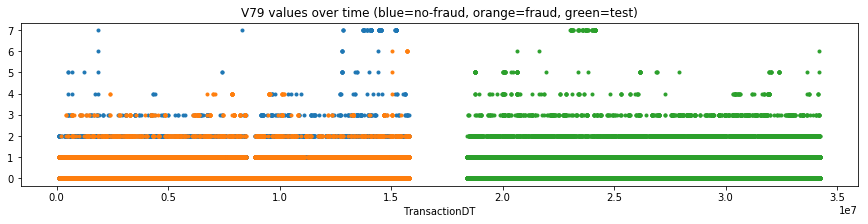

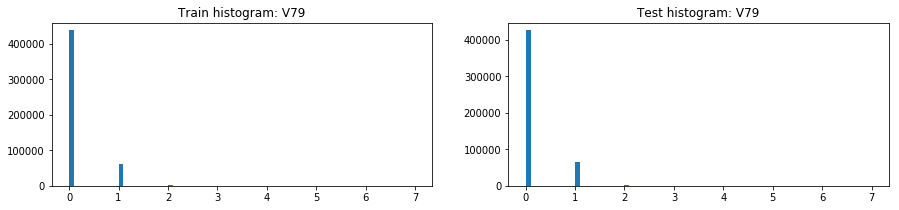

V79          Train      ...         Test public   Test private
0           count  501376.000000      ...        94022.000000  400589.000000
1            mean       0.136867      ...            0.115399       0.159133
2             std       0.379904      ...            0.366889       0.406306
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       0.000000
7             max       7.000000      ...            6.000000       7.000000
8   unique values       9.000000      ...            8.000000       9.000000
9            NaNs   89164.000000      ...         7317.000000    4764.000000
10     NaNs share       0.151000      ...            0.072200       0.011800

[11 rows x 7 columns]

V79  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 436802      ...              8801         425386
1 -999.0                  89164      ...              4276          12081
2    1.0                  61751      ...              6653          65288
3    2.0                   2179      ...               690           3020
4    3.0                    435      ...               202            662
5    7.0                    109      ...                 0             64
6    4.0                     68      ...                33            118
7    5.0                     19      ...                 1             69
8    6.0                     13      ...                 7              3

[9 rows x 5 columns]

V79  Count in train      ...        Sum target (desc)  Count in test
0    0.0          436802      ...                     8801         425386
1    1.0           61751      ...                     6653          65288
2 -999.0           89164      ...                     4276          12081
3    2.0            2179      ...                      690           3020
4    3.0             435      ...                      202            662
5    4.0              68      ...                       33            118
6    6.0              13      ...                        7              3
7    5.0              19      ...                        1             69
8    7.0             109      ...                        0             64

[9 rows x 5 columns]

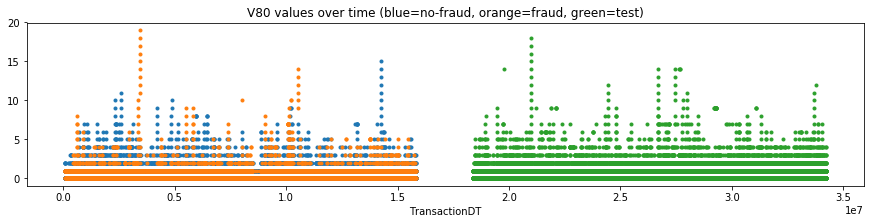

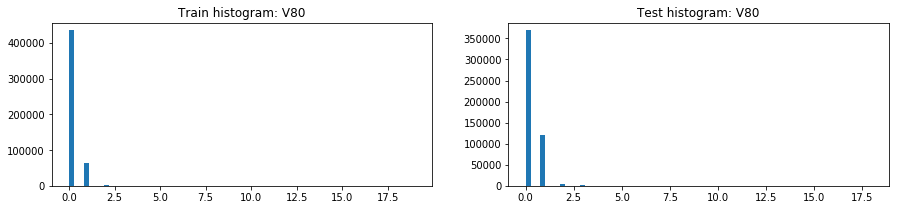

V80          Train      ...         Test public   Test private
0           count  501376.000000      ...        94022.000000  400589.000000
1            mean       0.143954      ...            0.130959       0.303161
2             std       0.409932      ...            0.426872       0.520895
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       1.000000
7             max      19.000000      ...           18.000000      14.000000
8   unique values      21.000000      ...           20.000000      16.000000
9            NaNs   89164.000000      ...         7317.000000    4764.000000
10     NaNs share       0.151000      ...            0.072200       0.011800

[11 rows x 7 columns]

V80  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 434732      ...              9021       368894.0
1 -999.0                  89164      ...              4276        12081.0
2    1.0                  63368      ...              6584       120578.0
3    2.0                   2283      ...               492         3797.0
4    3.0                    475      ...               112          731.0
5    4.0                    245      ...                79          281.0
6    5.0                    112      ...                37          116.0
7    6.0                     52      ...                16           69.0
8    7.0                     48      ...                17           58.0
9    8.0                     20      ...                 6           18.0

[10 rows x 5 columns]

V80  Count in train      ...        Sum target (desc)  Count in test
0    0.0          434732      ...                     9021         368894
1    1.0           63368      ...                     6584         120578
2 -999.0           89164      ...                     4276          12081
3    2.0            2283      ...                      492           3797
4    3.0             475      ...                      112            731
5    4.0             245      ...                       79            281
6    5.0             112      ...                       37            116
7    7.0              48      ...                       17             58
8    6.0              52      ...                       16             69
9    8.0              20      ...                        6             18

[10 rows x 5 columns]

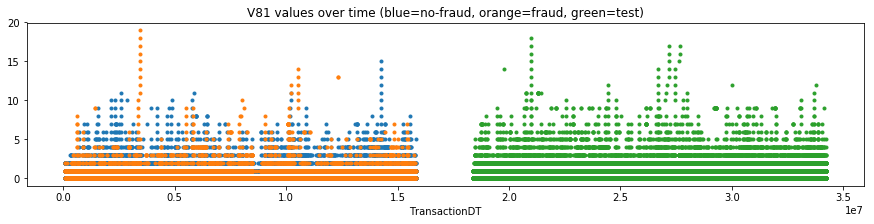

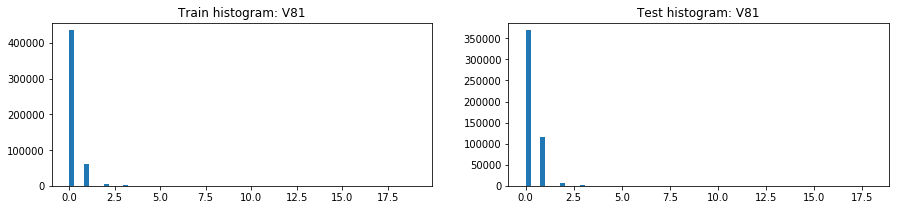

V81          Train      ...         Test public   Test private
0           count  501376.000000      ...        94022.000000  400589.000000
1            mean       0.152696      ...            0.144413       0.318501
2             std       0.452298      ...            0.504404       0.578041
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       1.000000
7             max      19.000000      ...           18.000000      17.000000
8   unique values      21.000000      ...           20.000000      19.000000
9            NaNs   89164.000000      ...         7317.000000    4764.000000
10     NaNs share       0.151000      ...            0.072200       0.011800

[11 rows x 7 columns]

V81  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 434653      ...              8998       368726.0
1 -999.0                  89164      ...              4276        12081.0
2    1.0                  60829      ...              6120       116427.0
3    2.0                   4033      ...               766         6846.0
4    3.0                    902      ...               242         1313.0
5    4.0                    509      ...               125          600.0
6    5.0                    191      ...                43          270.0
7    6.0                    106      ...                36          145.0
8    7.0                     68      ...                21           98.0
9    8.0                     29      ...                 8           48.0

[10 rows x 5 columns]

V81  Count in train      ...        Sum target (desc)  Count in test
0    0.0          434653      ...                     8998         368726
1    1.0           60829      ...                     6120         116427
2 -999.0           89164      ...                     4276          12081
3    2.0            4033      ...                      766           6846
4    3.0             902      ...                      242           1313
5    4.0             509      ...                      125            600
6    5.0             191      ...                       43            270
7    6.0             106      ...                       36            145
8    7.0              68      ...                       21             98
9    9.0              20      ...                        8             79

[10 rows x 5 columns]

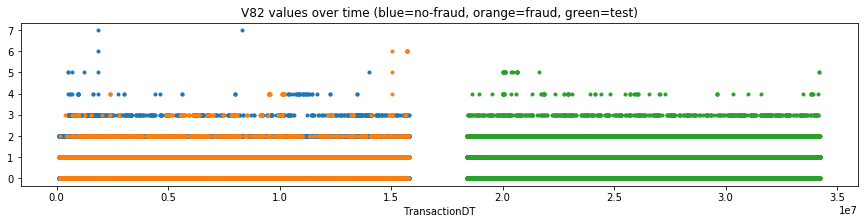

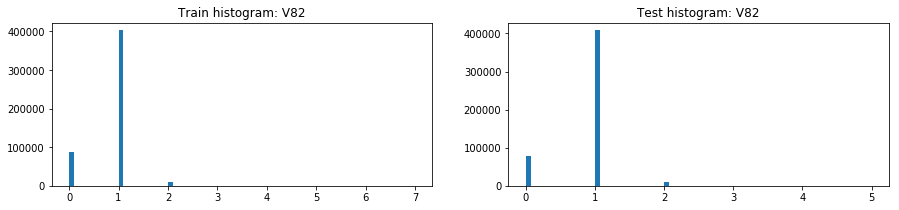

V82          Train      ...         Test public   Test private
0           count  501376.000000      ...        94022.000000  400589.000000
1            mean       0.844610      ...            0.841420       0.869829
2             std       0.422529      ...            0.431988       0.396273
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       7.000000      ...            5.000000       5.000000
8   unique values       9.000000      ...            7.000000       7.000000
9            NaNs   89164.000000      ...         7317.000000    4764.000000
10     NaNs share       0.151000      ...            0.072200       0.011800

[11 rows x 7 columns]

V82  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 402612      ...             13180       407790.0
1 -999.0                  89164      ...              4276        12081.0
2    0.0                  88757      ...              2020        77355.0
3    2.0                   9288      ...              1017         8745.0
4    3.0                    626      ...               143          629.0
5    4.0                     76      ...                19           67.0
6    6.0                      8      ...                 7            NaN
7    5.0                      7      ...                 1           24.0
8    7.0                      2      ...                 0            NaN

[9 rows x 5 columns]

V82  Count in train      ...        Sum target (desc)  Count in test
0    1.0          402612      ...                    13180       407790.0
1 -999.0           89164      ...                     4276        12081.0
2    0.0           88757      ...                     2020        77355.0
3    2.0            9288      ...                     1017         8745.0
4    3.0             626      ...                      143          629.0
5    4.0              76      ...                       19           67.0
6    6.0               8      ...                        7            NaN
7    5.0               7      ...                        1           24.0
8    7.0               2      ...                        0            NaN

[9 rows x 5 columns]

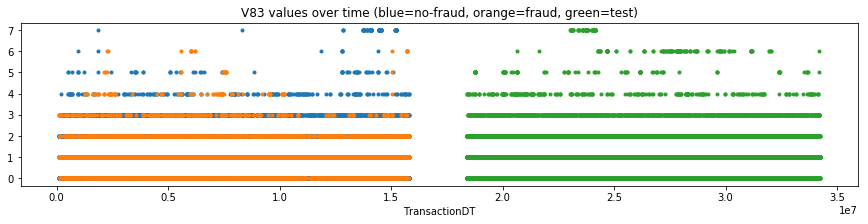

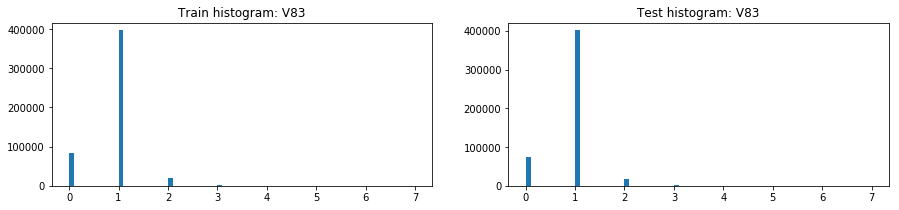

V83          Train      ...         Test public   Test private
0           count  501376.000000      ...        94022.000000  400589.000000
1            mean       0.881965      ...            0.876486       0.901390
2             std       0.470757      ...            0.477224       0.449288
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       7.000000      ...            6.000000       7.000000
8   unique values       9.000000      ...            8.000000       9.000000
9            NaNs   89164.000000      ...         7317.000000    4764.000000
10     NaNs share       0.151000      ...            0.072200       0.011800

[11 rows x 7 columns]

V83  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 396619      ...             12635         400827
1 -999.0                  89164      ...              4276          12081
2    0.0                  83605      ...              1749          74121
3    2.0                  18834      ...              1465          17393
4    3.0                   1816      ...               412           1709
5    4.0                    292      ...                93            286
6    7.0                    109      ...                 0             64
7    5.0                     76      ...                16             97
8    6.0                     25      ...                17            113

[9 rows x 5 columns]

V83  Count in train      ...        Sum target (desc)  Count in test
0    1.0          396619      ...                    12635         400827
1 -999.0           89164      ...                     4276          12081
2    0.0           83605      ...                     1749          74121
3    2.0           18834      ...                     1465          17393
4    3.0            1816      ...                      412           1709
5    4.0             292      ...                       93            286
6    6.0              25      ...                       17            113
7    5.0              76      ...                       16             97
8    7.0             109      ...                        0             64

[9 rows x 5 columns]

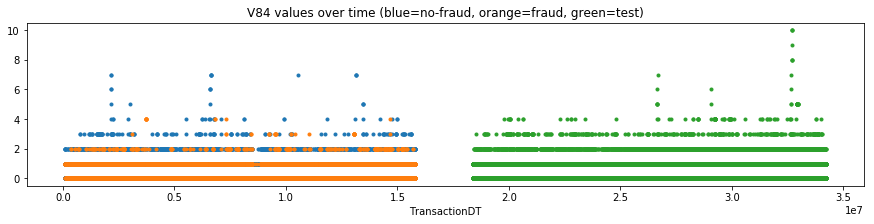

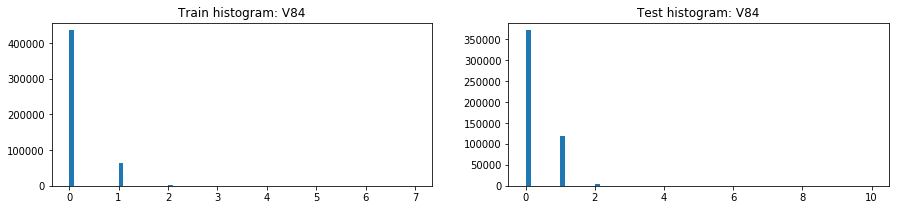

V84          Train      ...         Test public   Test private
0           count  501376.000000      ...        94022.000000  400589.000000
1            mean       0.137145      ...            0.121206       0.290278
2             std       0.361875      ...            0.349349       0.480298
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       1.000000
7             max       7.000000      ...            4.000000      10.000000
8   unique values       9.000000      ...            6.000000      12.000000
9            NaNs   89164.000000      ...         7317.000000    4764.000000
10     NaNs share       0.151000      ...            0.072200       0.011800

[11 rows x 7 columns]

V84  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 435246      ...              9101         371522
1 -999.0                  89164      ...              4276          12081
2    1.0                  63848      ...              6917         119235
3    2.0                   2035      ...               331           3307
4    3.0                    191      ...                28            426
5    4.0                     35      ...                10             84
6    7.0                     10      ...                 0              2
7    5.0                      6      ...                 0             24
8    6.0                      5      ...                 0              3

[9 rows x 5 columns]

V84  Count in train      ...        Sum target (desc)  Count in test
0    0.0          435246      ...                     9101         371522
1    1.0           63848      ...                     6917         119235
2 -999.0           89164      ...                     4276          12081
3    2.0            2035      ...                      331           3307
4    3.0             191      ...                       28            426
5    4.0              35      ...                       10             84
6    7.0              10      ...                        0              2
7    5.0               6      ...                        0             24
8    6.0               5      ...                        0              3

[9 rows x 5 columns]

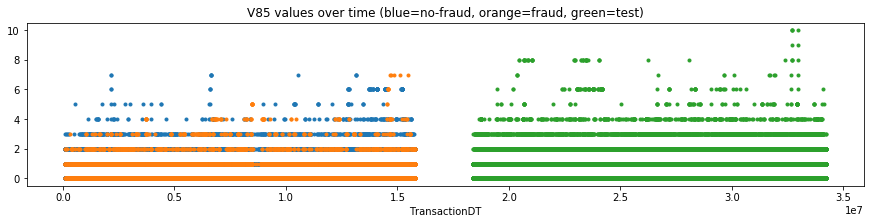

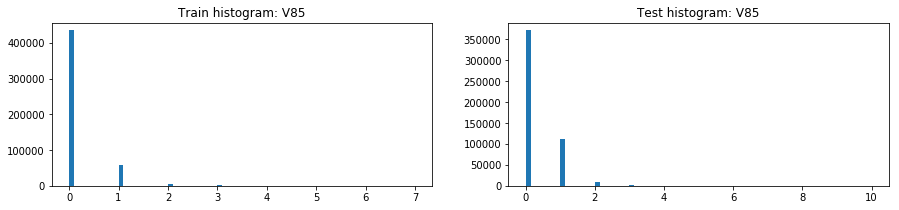

V85          Train      ...         Test public   Test private
0           count  501376.000000      ...        94022.000000  400589.000000
1            mean       0.149788      ...            0.138446       0.312607
2             std       0.419445      ...            0.434581       0.550831
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       1.000000
7             max       7.000000      ...            8.000000      10.000000
8   unique values       9.000000      ...           10.000000      12.000000
9            NaNs   89164.000000      ...         7317.000000    4764.000000
10     NaNs share       0.151000      ...            0.072200       0.011800

[11 rows x 7 columns]

V85  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 435103      ...              9077         371150
1 -999.0                  89164      ...              4276          12081
2    1.0                  59565      ...              6277         112615
3    2.0                   5322      ...               735           8175
4    3.0                    987      ...               205           1937
5    4.0                    216      ...                74            481
6    6.0                    121      ...                 5            104
7    5.0                     47      ...                 9             87
8    7.0                     15      ...                 5             13

[9 rows x 5 columns]

V85  Count in train      ...        Sum target (desc)  Count in test
0    0.0          435103      ...                     9077         371150
1    1.0           59565      ...                     6277         112615
2 -999.0           89164      ...                     4276          12081
3    2.0            5322      ...                      735           8175
4    3.0             987      ...                      205           1937
5    4.0             216      ...                       74            481
6    5.0              47      ...                        9             87
7    6.0             121      ...                        5            104
8    7.0              15      ...                        5             13

[9 rows x 5 columns]

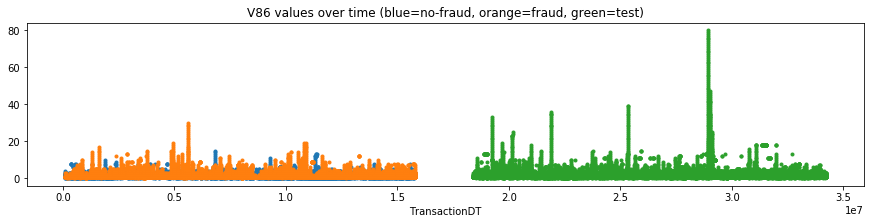

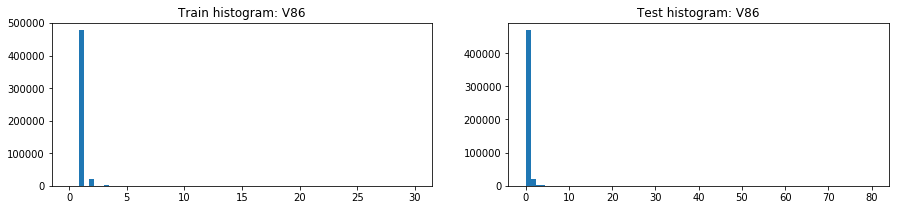

V86          Train      ...         Test public   Test private
0           count  501376.000000      ...        94022.000000  400589.000000
1            mean       1.064885      ...            1.094457       1.091995
2             std       0.419807      ...            0.683657       0.939644
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max      30.000000      ...           33.000000      80.000000
8   unique values      32.000000      ...           35.000000      82.000000
9            NaNs   89164.000000      ...         7317.000000    4764.000000
10     NaNs share       0.151000      ...            0.072200       0.011800

[11 rows x 7 columns]

V86  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 476911      ...             12288         467922
1 -999.0                  89164      ...              4276          12081
2    2.0                  19527      ...              1862          21070
3    3.0                   2428      ...               870           2684
4    4.0                    743      ...               502           1112
5    0.0                    727      ...                51            338
6    5.0                    355      ...               241            317
7    6.0                    217      ...               166            255
8    7.0                    128      ...               119            129
9    8.0                     86      ...                60             94

[10 rows x 5 columns]

V86  Count in train      ...        Sum target (desc)  Count in test
0    1.0          476911      ...                    12288         467922
1 -999.0           89164      ...                     4276          12081
2    2.0           19527      ...                     1862          21070
3    3.0            2428      ...                      870           2684
4    4.0             743      ...                      502           1112
5    5.0             355      ...                      241            317
6    6.0             217      ...                      166            255
7    7.0             128      ...                      119            129
8    9.0              79      ...                       74             75
9    8.0              86      ...                       60             94

[10 rows x 5 columns]

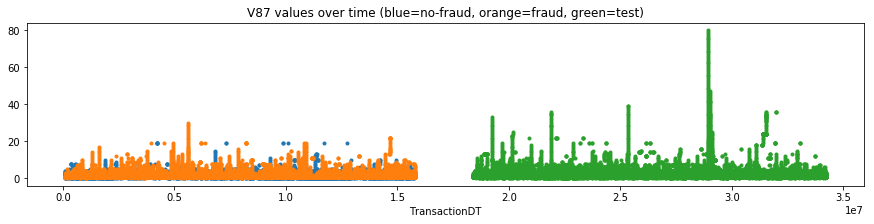

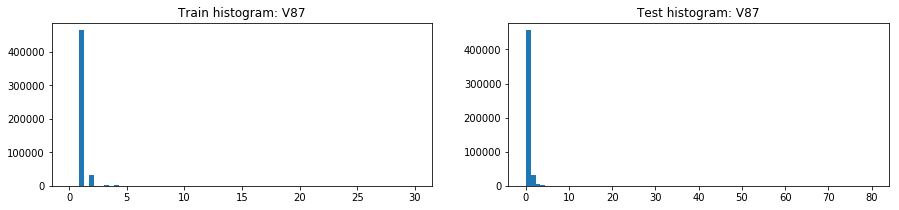

V87          Train      ...         Test public   Test private
0           count  501376.000000      ...        94022.000000  400589.000000
1            mean       1.099456      ...            1.134298       1.131129
2             std       0.511281      ...            0.747773       1.037937
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max      30.000000      ...           33.000000      80.000000
8   unique values      32.000000      ...           35.000000      82.000000
9            NaNs   89164.000000      ...         7317.000000    4764.000000
10     NaNs share       0.151000      ...            0.072200       0.011800

[11 rows x 7 columns]

V87  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 463708      ...             11543         455162
1 -999.0                  89164      ...              4276          12081
2    2.0                  30832      ...              2235          31444
3    3.0                   3761      ...               934           4209
4    4.0                   1033      ...               641           1299
5    0.0                    694      ...                37            328
6    5.0                    480      ...               281            482
7    6.0                    205      ...               152            349
8    7.0                    148      ...               134            338
9    8.0                    147      ...               117            170

[10 rows x 5 columns]

V87  Count in train      ...        Sum target (desc)  Count in test
0    1.0          463708      ...                    11543         455162
1 -999.0           89164      ...                     4276          12081
2    2.0           30832      ...                     2235          31444
3    3.0            3761      ...                      934           4209
4    4.0            1033      ...                      641           1299
5    5.0             480      ...                      281            482
6    6.0             205      ...                      152            349
7    7.0             148      ...                      134            338
8    8.0             147      ...                      117            170
9    9.0              75      ...                       68             95

[10 rows x 5 columns]

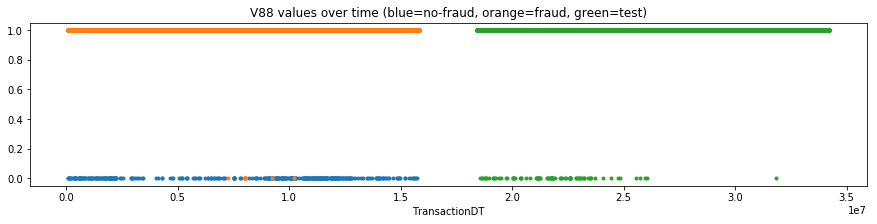

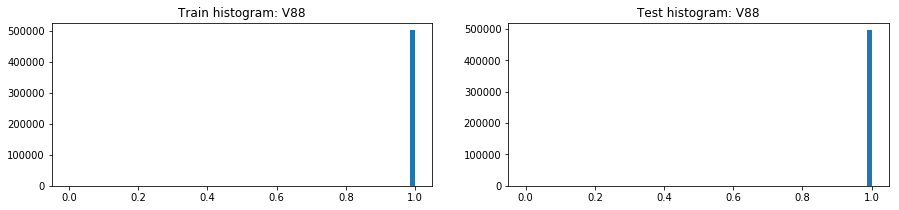

V88          Train      ...         Test public   Test private
0           count  501376.000000      ...        94022.000000  400589.000000
1            mean       0.999246      ...            0.999521       0.999903
2             std       0.027447      ...            0.021872       0.009866
3             min       0.000000      ...            0.000000       0.000000
4             25%       1.000000      ...            1.000000       1.000000
5             50%       1.000000      ...            1.000000       1.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       1.000000      ...            1.000000       1.000000
8   unique values       3.000000      ...            3.000000       3.000000
9            NaNs   89164.000000      ...         7317.000000    4764.000000
10     NaNs share       0.151000      ...            0.072200       0.011800

[11 rows x 7 columns]

V88  Count in train (desc)      ...        Sum target  Count in test
0    1.0                 500998      ...             16376         494526
1 -999.0                  89164      ...              4276          12081
2    0.0                    378      ...                11             84

[3 rows x 5 columns]

V88  Count in train      ...        Sum target (desc)  Count in test
0    1.0          500998      ...                    16376         494526
1 -999.0           89164      ...                     4276          12081
2    0.0             378      ...                       11             84

[3 rows x 5 columns]

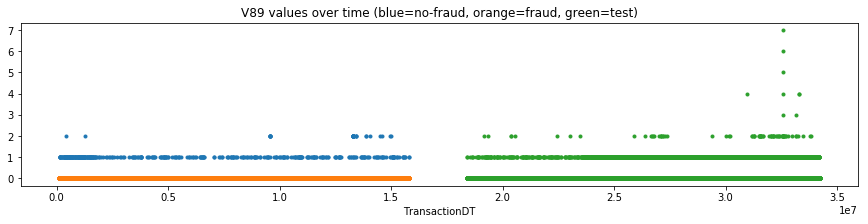

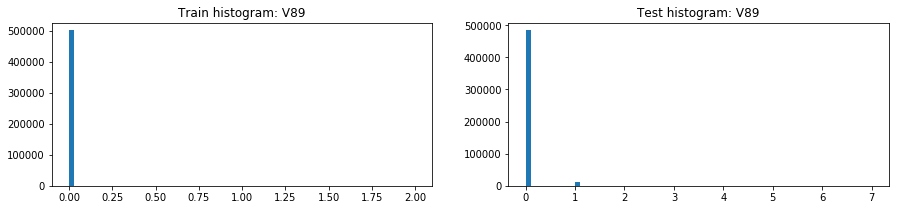

V89          Train      ...         Test public   Test private
0           count  501376.000000      ...        94022.000000  400589.000000
1            mean       0.000902      ...            0.001266       0.027819
2             std       0.031943      ...            0.037019       0.166641
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       0.000000
7             max       2.000000      ...            2.000000       7.000000
8   unique values       4.000000      ...            4.000000       9.000000
9            NaNs   89164.000000      ...         7317.000000    4764.000000
10     NaNs share       0.151000      ...            0.072200       0.011800

[11 rows x 7 columns]

V89  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 500954      ...             16387         483452
1 -999.0                  89164      ...              4276          12081
2    1.0                    392      ...                 0          11075
3    2.0                     30      ...                 0             74

[4 rows x 5 columns]

V89  Count in train      ...        Sum target (desc)  Count in test
0    0.0          500954      ...                    16387         483452
1 -999.0           89164      ...                     4276          12081
2    1.0             392      ...                        0          11075
3    2.0              30      ...                        0             74

[4 rows x 5 columns]

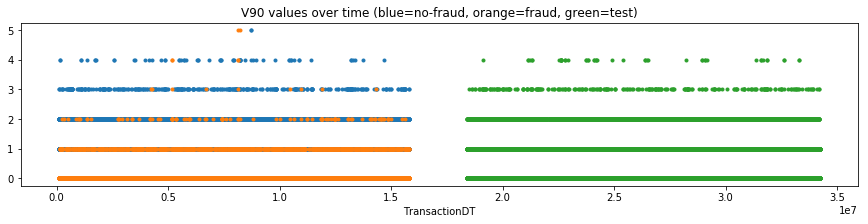

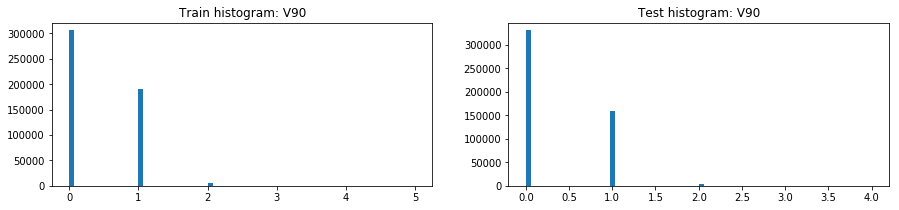

V90          Train      ...         Test public   Test private
0           count  501376.000000      ...        94022.000000  400589.000000
1            mean       0.401862      ...            0.412669       0.324123
2             std       0.516153      ...            0.516688       0.487351
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       5.000000      ...            4.000000       4.000000
8   unique values       7.000000      ...            6.000000       6.000000
9            NaNs   89164.000000      ...         7317.000000    4764.000000
10     NaNs share       0.151000      ...            0.072200       0.011800

[11 rows x 7 columns]

V90  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 305817      ...             15004       330402.0
1    1.0                 190162      ...              1273       160149.0
2 -999.0                  89164      ...              4276        12081.0
3    2.0                   4941      ...                95         3734.0
4    3.0                    388      ...                 9          278.0
5    4.0                     64      ...                 4           47.0
6    5.0                      4      ...                 2            NaN

[7 rows x 5 columns]

V90  Count in train      ...        Sum target (desc)  Count in test
0    0.0          305817      ...                    15004       330402.0
1 -999.0           89164      ...                     4276        12081.0
2    1.0          190162      ...                     1273       160149.0
3    2.0            4941      ...                       95         3734.0
4    3.0             388      ...                        9          278.0
5    4.0              64      ...                        4           47.0
6    5.0               4      ...                        2            NaN

[7 rows x 5 columns]

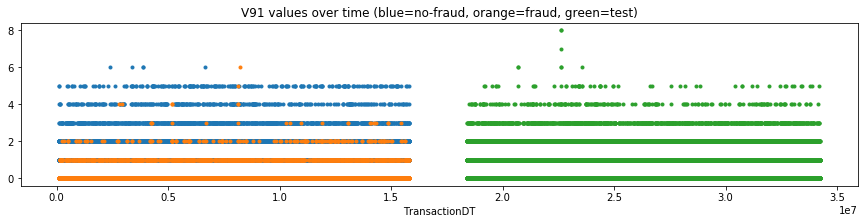

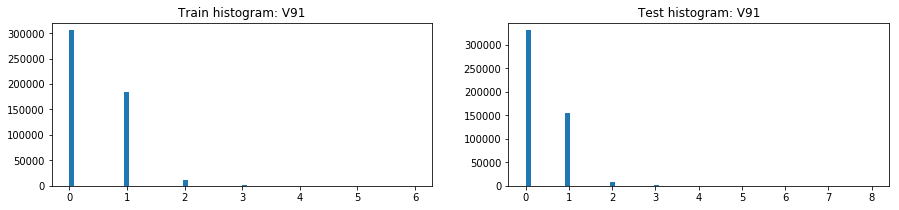

V91          Train      ...         Test public   Test private
0           count  501376.000000      ...        94022.000000  400589.000000
1            mean       0.420461      ...            0.432027       0.339158
2             std       0.561865      ...            0.559849       0.526424
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       1.000000      ...            1.000000       1.000000
7             max       6.000000      ...            6.000000       8.000000
8   unique values       8.000000      ...            8.000000      10.000000
9            NaNs   89164.000000      ...         7317.000000    4764.000000
10     NaNs share       0.151000      ...            0.072200       0.011800

[11 rows x 7 columns]

V91  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 305135      ...             15000         329824
1    1.0                 184121      ...              1204         154755
2 -999.0                  89164      ...              4276          12081
3    2.0                  10470      ...               156           8720
4    3.0                   1086      ...                19           1035
5    4.0                    336      ...                 6            211
6    5.0                    222      ...                 1             57
7    6.0                      6      ...                 1              5

[8 rows x 5 columns]

V91  Count in train      ...        Sum target (desc)  Count in test
0    0.0          305135      ...                    15000         329824
1 -999.0           89164      ...                     4276          12081
2    1.0          184121      ...                     1204         154755
3    2.0           10470      ...                      156           8720
4    3.0            1086      ...                       19           1035
5    4.0             336      ...                        6            211
6    5.0             222      ...                        1             57
7    6.0               6      ...                        1              5

[8 rows x 5 columns]

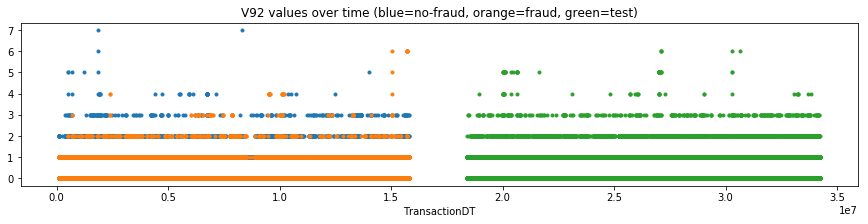

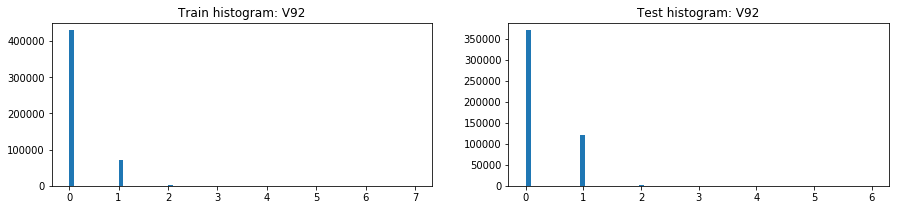

V92          Train      ...         Test public   Test private
0           count  501376.000000      ...        94022.000000  400589.000000
1            mean       0.150322      ...            0.127300       0.290979
2             std       0.375682      ...            0.361654       0.475008
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       1.000000
7             max       7.000000      ...            5.000000       6.000000
8   unique values       9.000000      ...            7.000000       8.000000
9            NaNs   89164.000000      ...         7317.000000    4764.000000
10     NaNs share       0.151000      ...            0.072200       0.011800

[11 rows x 7 columns]

V92  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 428699      ...              8643       370042.0
1 -999.0                  89164      ...              4276        12081.0
2    1.0                  70511      ...              7146       121235.0
3    2.0                   1744      ...               473         2844.0
4    3.0                    348      ...                98          401.0
5    4.0                     57      ...                19           39.0
6    6.0                      8      ...                 7            5.0
7    5.0                      7      ...                 1           44.0
8    7.0                      2      ...                 0            NaN

[9 rows x 5 columns]

V92  Count in train      ...        Sum target (desc)  Count in test
0    0.0          428699      ...                     8643       370042.0
1    1.0           70511      ...                     7146       121235.0
2 -999.0           89164      ...                     4276        12081.0
3    2.0            1744      ...                      473         2844.0
4    3.0             348      ...                       98          401.0
5    4.0              57      ...                       19           39.0
6    6.0               8      ...                        7            5.0
7    5.0               7      ...                        1           44.0
8    7.0               2      ...                        0            NaN

[9 rows x 5 columns]

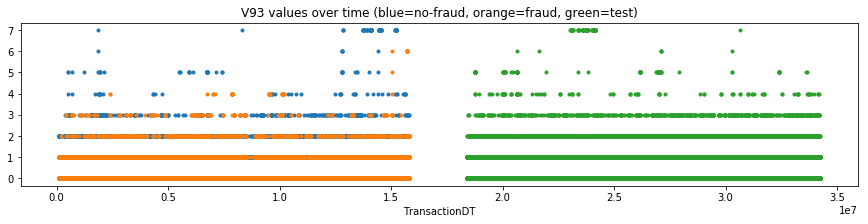

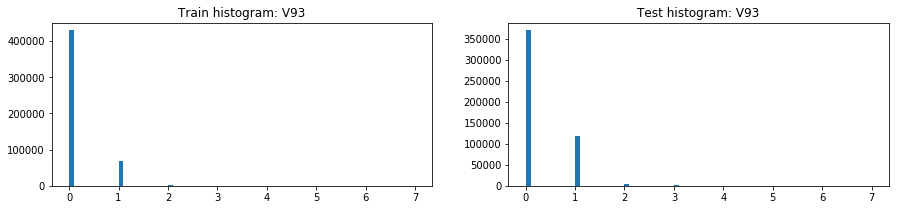

V93          Train      ...         Test public   Test private
0           count  501376.000000      ...        94022.000000  400589.000000
1            mean       0.154812      ...            0.132395       0.298211
2             std       0.402314      ...            0.387364       0.500855
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       1.000000
7             max       7.000000      ...            6.000000       7.000000
8   unique values       9.000000      ...            8.000000       9.000000
9            NaNs   89164.000000      ...         7317.000000    4764.000000
10     NaNs share       0.151000      ...            0.072200       0.011800

[11 rows x 7 columns]

V93  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 428694      ...              8641         370007
1 -999.0                  89164      ...              4276          12081
2    1.0                  69196      ...              6769         118930
3    2.0                   2682      ...               728           4593
4    3.0                    556      ...               208            819
5    7.0                    109      ...                 0             65
6    4.0                     80      ...                33            106
7    5.0                     46      ...                 1             84
8    6.0                     13      ...                 7              6

[9 rows x 5 columns]

V93  Count in train      ...        Sum target (desc)  Count in test
0    0.0          428694      ...                     8641         370007
1    1.0           69196      ...                     6769         118930
2 -999.0           89164      ...                     4276          12081
3    2.0            2682      ...                      728           4593
4    3.0             556      ...                      208            819
5    4.0              80      ...                       33            106
6    6.0              13      ...                        7              6
7    5.0              46      ...                        1             84
8    7.0             109      ...                        0             65

[9 rows x 5 columns]

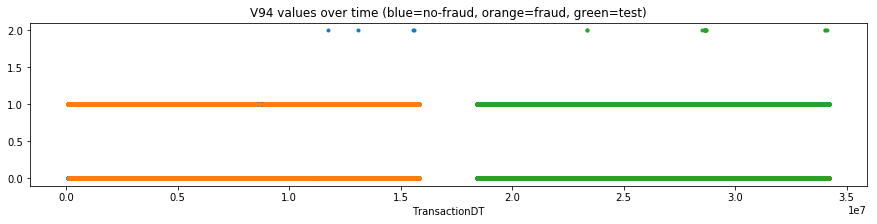

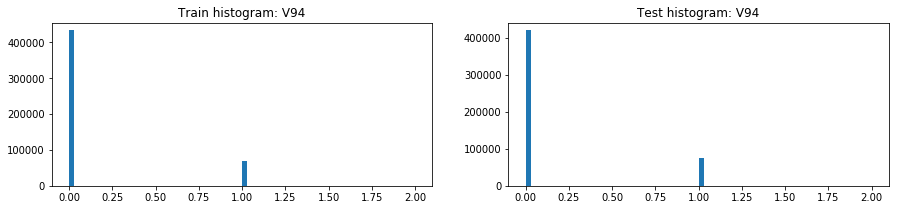

V94          Train      ...         Test public   Test private
0           count  501376.000000      ...        94022.000000  400589.000000
1            mean       0.137007      ...            0.117802       0.160893
2             std       0.343878      ...            0.322375       0.367528
3             min       0.000000      ...            0.000000       0.000000
4             25%       0.000000      ...            0.000000       0.000000
5             50%       0.000000      ...            0.000000       0.000000
6             75%       0.000000      ...            0.000000       0.000000
7             max       2.000000      ...            1.000000       2.000000
8   unique values       4.000000      ...            3.000000       4.000000
9            NaNs   89164.000000      ...         7317.000000    4764.000000
10     NaNs share       0.151000      ...            0.072200       0.011800

[11 rows x 7 columns]

V94  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 432688      ...              8366         419096
1 -999.0                  89164      ...              4276          12081
2    1.0                  68684      ...              8021          75500
3    2.0                      4      ...                 0             14

[4 rows x 5 columns]

V94  Count in train      ...        Sum target (desc)  Count in test
0    0.0          432688      ...                     8366         419096
1    1.0           68684      ...                     8021          75500
2 -999.0           89164      ...                     4276          12081
3    2.0               4      ...                        0             14

[4 rows x 5 columns]

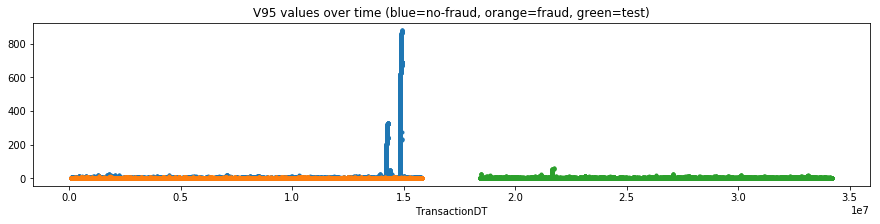

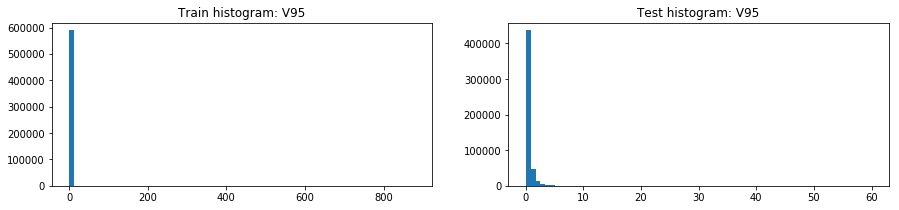

V95          Train      ...          Test public   Test private
0           count  590226.000000      ...        101339.000000  405353.000000
1            mean       1.038019      ...             0.270952       0.221881
2             std      21.034304      ...             1.210804       0.745671
3             min       0.000000      ...             0.000000       0.000000
4             25%       0.000000      ...             0.000000       0.000000
5             50%       0.000000      ...             0.000000       0.000000
6             75%       0.000000      ...             0.000000       0.000000
7             max     880.000000      ...            60.000000      27.000000
8   unique values     882.000000      ...            61.000000      28.000000
9            NaNs     314.000000      ...             0.000000       0.000000
10     NaNs share       0.000500      ...             0.000000       0.000000

[11 rows x 7 columns]

V95  Count in train (desc)      ...        Sum target  Count in test
0    0.0                 510542      ...             14585       436511.0
1    1.0                  52008      ...              3315        46915.0
2    2.0                  14804      ...              1332        13276.0
3    3.0                   5758      ...               647         4986.0
4    4.0                   2646      ...               332         2330.0
5    5.0                   1281      ...               174         1116.0
6    6.0                    684      ...                97          578.0
7    7.0                    411      ...                67          322.0
8 -999.0                    314      ...                17            NaN
9    8.0                    239      ...                44          196.0

[10 rows x 5 columns]

V95  Count in train      ...        Sum target (desc)  Count in test
0  0.0          510542      ...                    14585         436511
1  1.0           52008      ...                     3315          46915
2  2.0           14804      ...                     1332          13276
3  3.0            5758      ...                      647           4986
4  4.0            2646      ...                      332           2330
5  5.0            1281      ...                      174           1116
6  6.0             684      ...                       97            578
7  7.0             411      ...                       67            322
8  8.0             239      ...                       44            196
9  9.0             167      ...                       32            119

[10 rows x 5 columns]

In [4]:
for col in list(tr.columns.values[:COLS_TO_SHOW]):
    proc(col)